<a href="https://colab.research.google.com/github/lidia-notebook/JCDS/blob/master/PortoTheLia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
import numpy as np
import IPython.display as display
from matplotlib import pyplot as plt
import io
import base64

In [157]:
!pip -q install gdown
import gdown
import pandas as pd

In [158]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [159]:
!pip install gdown
import gdown

file_id = "1sN4CqWBxMk3bw3zYOyNfxbB2dXJAXr1o"
url = f"https://drive.google.com/uc?id={file_id}"
out_path = "Maju_Jaya_Digital_Technology.xlsx"

gdown.download(url, out_path, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1sN4CqWBxMk3bw3zYOyNfxbB2dXJAXr1o
To: /content/Maju_Jaya_Digital_Technology.xlsx
100%|██████████| 459k/459k [00:00<00:00, 3.68MB/s]


'Maju_Jaya_Digital_Technology.xlsx'

In [160]:
df = pd.read_excel(out_path)
df.head()

,no_bon,id_pelanggan,tanggal_bon,kota,id_produk,jumlah_terjual,diskon,rating,Komplain
0,BON00454,PEL00875,2022-01-01,Denpasar,PRD00012,22,15,5,no
1,BON00529,PEL00637,2022-01-01,Semarang,PRD00030,15,5,3,no
2,BON00661,PEL00163,2022-01-01,Makassar,PRD00040,11,15,4,no
3,BON01213,PEL00340,2022-01-01,Surabaya,PRD00002,21,0,3,no
4,BON01501,PEL01063,2022-01-01,Malang,PRD00029,19,10,2,no


# **BACKGROUND**

Sebuah toko elektronik Maju Jaya Digital, menjalankan bisnis mereka selama 3 tahun terakhir (2022 hingga sekarang, 2025). Seperti bisnis pada umumnya, bisnis rawan pada 5 tahun pertama. Oleh karena itu, mereka meng-hire data analyst untuk membantu memahami customer mereka

**tujuan:**  yaitu agar dapat memahami customer agar berguna mengenai strategi bisnis kedepannya

Karena kunci dari berjalannya sebuah bisnis adalah memahami market

# **DATA UNDERSTANDING & PREP**

Beberapa features yang perlu diketahui yaitu;
* **no_bon** : merupakan nomor bon
* **id_pelanggan** : id dari pelanggan
* **tanggal_bon** : tanggal kapan bon dicetak
* **kota** : kota asal customer
* **id_produk** : merupakan id dari produk yang dijual
* **jumlah_terjual** : merupakan kuantitas dari jumlah produk yang terjual
* **diskon** : persentase diskon
* **rating** : kepuasaan dari pelanggan
* **komplain** : komplain dari pelanggan
* **nama_pelanggan** : merupakan nama dari customer
* **gender** : jenis kelamin pelanggan
* **tanggal_lahir** : tanggal lahir dari pelanggan
* **jenis_barang:** merupakan tipe produk
* **merek_barang** : merek dari produk/barang yang dijual
* **harga_satuan** : harga dari sebuah barang per satuan
* **modal**: merupakan modal dari barang per satuan

In [161]:
df = pd.read_excel('Maju_Jaya_Digital_Technology.xlsx')
df

,no_bon,id_pelanggan,tanggal_bon,kota,id_produk,jumlah_terjual,diskon,rating,Komplain
0,BON00454,PEL00875,2022-01-01,Denpasar,PRD00012,22,15,5,no
1,BON00529,PEL00637,2022-01-01,Semarang,PRD00030,15,5,3,no
2,BON00661,PEL00163,2022-01-01,Makassar,PRD00040,11,15,4,no
3,BON01213,PEL00340,2022-01-01,Surabaya,PRD00002,21,0,3,no
4,BON01501,PEL01063,2022-01-01,Malang,PRD00029,19,10,2,no
...,...,...,...,...,...,...,...,...,...
8735,BON01382,PEL00976,2025-06-28,Makassar,PRD00056,17,10,5,no
8736,BON04902,PEL00519,2025-06-28,Balikpapan,PRD00030,16,5,5,no
8737,BON05241,PEL00438,2025-06-28,Makassar,PRD00051,25,10,3,no
8738,BON08082,PEL00826,2025-06-28,Denpasar,PRD00026,19,0,5,no


In [162]:
df_pelanggan = pd.read_excel('Maju_Jaya_Digital_Technology.xlsx', sheet_name="Tabel_Pelanggan")
df_pelanggan

,id_pelanggan,nama_pelanggan,gender,tanggal_lahir
0,PEL00001,Joko TFQ,L,2005-05-08
1,PEL00002,Budi GOH,L,1978-03-20
2,PEL00003,Sari FUM,P,1991-05-28
3,PEL00004,Dewi ETW,P,1968-02-04
4,PEL00005,Agus IHL,L,1973-03-13
...,...,...,...,...
1995,PEL01996,Sari MSX,P,1976-10-20
1996,PEL01997,Budi ANP,L,2001-02-07
1997,PEL01998,Dedi FQP,L,1992-12-11
1998,PEL01999,Joko QTM,L,1968-01-02


In [163]:
df_produk = pd.read_excel('Maju_Jaya_Digital_Technology.xlsx', sheet_name="Tabel_Produk")
df_produk

,id_produk,jenis_barang,merek_barang,harga_satuan,modal
0,PRD00001,Mouse,Logitech,125000,107423
1,PRD00002,Mouse,Razer,125000,87603
2,PRD00003,Mouse,SteelSeries,450000,358724
3,PRD00004,Mouse,Corsair,425000,267954
4,PRD00005,Mouse,Microsoft,225000,178221
...,...,...,...,...,...
69,PRD00070,PC Rakitan,MJ016,13000000,8799189
70,PRD00071,PC Rakitan,MJ017,25000000,19070970
71,PRD00072,PC Rakitan,MJ018,15000000,13120022
72,PRD00073,PC Rakitan,MJ019,24000000,18575188


#### Dikarenakan terdapat beberapa sheet sebagaimana ditunjukkan di atas (`df_pelanggan`, `df_produk`, dan `df`) makan akan dilakukan join agar menjadi satu kesatuan.

In [164]:
df_merge = pd.merge(df, df_pelanggan, left_on='id_pelanggan', right_on='id_pelanggan', how='left')
df_merge

,no_bon,id_pelanggan,tanggal_bon,kota,id_produk,jumlah_terjual,diskon,rating,Komplain,nama_pelanggan,gender,tanggal_lahir
0,BON00454,PEL00875,2022-01-01,Denpasar,PRD00012,22,15,5,no,Budi JLF,L,1982-11-08
1,BON00529,PEL00637,2022-01-01,Semarang,PRD00030,15,5,3,no,Rudi YWB,L,1966-12-28
2,BON00661,PEL00163,2022-01-01,Makassar,PRD00040,11,15,4,no,Dewi EFC,P,1999-05-25
3,BON01213,PEL00340,2022-01-01,Surabaya,PRD00002,21,0,3,no,Tina GWG,P,2002-04-19
4,BON01501,PEL01063,2022-01-01,Malang,PRD00029,19,10,2,no,Lia WYF,P,1980-05-25
...,...,...,...,...,...,...,...,...,...,...,...,...
8735,BON01382,PEL00976,2025-06-28,Makassar,PRD00056,17,10,5,no,Tina ESZ,P,1987-12-03
8736,BON04902,PEL00519,2025-06-28,Balikpapan,PRD00030,16,5,5,no,Joko DZQ,L,1982-11-13
8737,BON05241,PEL00438,2025-06-28,Makassar,PRD00051,25,10,3,no,Dewi VWH,P,2005-10-16
8738,BON08082,PEL00826,2025-06-28,Denpasar,PRD00026,19,0,5,no,Joko NQV,L,1985-10-25


In [165]:
df_merge = pd.merge(df_merge, df_produk, left_on='id_produk', right_on='id_produk', how='left')
df_merge

,no_bon,id_pelanggan,tanggal_bon,kota,id_produk,jumlah_terjual,diskon,rating,Komplain,nama_pelanggan,gender,tanggal_lahir,jenis_barang,merek_barang,harga_satuan,modal
0,BON00454,PEL00875,2022-01-01,Denpasar,PRD00012,22,15,5,no,Budi JLF,L,1982-11-08,Monitor,MSI,1800000.0,1596299.0
1,BON00529,PEL00637,2022-01-01,Semarang,PRD00030,15,5,3,no,Rudi YWB,L,1966-12-28,Printer,Samsung,2700000.0,1800182.0
2,BON00661,PEL00163,2022-01-01,Makassar,PRD00040,11,15,4,no,Dewi EFC,P,1999-05-25,Speaker,Harman Kardon,500000.0,359780.0
3,BON01213,PEL00340,2022-01-01,Surabaya,PRD00002,21,0,3,no,Tina GWG,P,2002-04-19,Mouse,Razer,125000.0,87603.0
4,BON01501,PEL01063,2022-01-01,Malang,PRD00029,19,10,2,no,Lia WYF,P,1980-05-25,Printer,Brother,900000.0,607976.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8735,BON01382,PEL00976,2025-06-28,Makassar,PRD00056,17,10,5,no,Tina ESZ,P,1987-12-03,PC Rakitan,MJ002,11000000.0,8515886.0
8736,BON04902,PEL00519,2025-06-28,Balikpapan,PRD00030,16,5,5,no,Joko DZQ,L,1982-11-13,Printer,Samsung,2700000.0,1800182.0
8737,BON05241,PEL00438,2025-06-28,Makassar,PRD00051,25,10,3,no,Dewi VWH,P,2005-10-16,Laptop,Samsung,9500000.0,7390128.0
8738,BON08082,PEL00826,2025-06-28,Denpasar,PRD00026,19,0,5,no,Joko NQV,L,1985-10-25,Printer,Canon,1800000.0,1375032.0


## Duplicates

Setelah melakukan join, maka mulai dilakukan pengecekan duplicate.

In [166]:
df_merge.duplicated().sum()

np.int64(2)

In [167]:
all_duplicated_rows = df_merge[df_merge.duplicated(keep=False)]
all_duplicated_rows

,no_bon,id_pelanggan,tanggal_bon,kota,id_produk,jumlah_terjual,diskon,rating,Komplain,nama_pelanggan,gender,tanggal_lahir,jenis_barang,merek_barang,harga_satuan,modal
7573,BON06267,PEL00646,2025-01-05,Surabaya,PRD00030,27,0,3,no,Lia CTY,P,1965-12-21,Printer,Samsung,2700000.0,1800182.0
7579,BON06267,PEL00646,2025-01-05,Surabaya,PRD00030,27,0,3,no,Lia CTY,P,1965-12-21,Printer,Samsung,2700000.0,1800182.0
8273,BON06304,PEL00846,2025-04-24,Makassar,PRD00005,28,0,5,no,Rina LUO,P,1978-01-09,Mouse,Microsoft,225000.0,178221.0
8277,BON06304,PEL00846,2025-04-24,Makassar,PRD00005,28,0,5,no,Rina LUO,P,1978-01-09,Mouse,Microsoft,225000.0,178221.0


In [168]:
df_merge.drop_duplicates(keep=False, inplace=True)

In [169]:
df_merge.duplicated().sum()

np.int64(0)

In [170]:
df_merge.head()

,no_bon,id_pelanggan,tanggal_bon,kota,id_produk,jumlah_terjual,diskon,rating,Komplain,nama_pelanggan,gender,tanggal_lahir,jenis_barang,merek_barang,harga_satuan,modal
0,BON00454,PEL00875,2022-01-01,Denpasar,PRD00012,22,15,5,no,Budi JLF,L,1982-11-08,Monitor,MSI,1800000.0,1596299.0
1,BON00529,PEL00637,2022-01-01,Semarang,PRD00030,15,5,3,no,Rudi YWB,L,1966-12-28,Printer,Samsung,2700000.0,1800182.0
2,BON00661,PEL00163,2022-01-01,Makassar,PRD00040,11,15,4,no,Dewi EFC,P,1999-05-25,Speaker,Harman Kardon,500000.0,359780.0
3,BON01213,PEL00340,2022-01-01,Surabaya,PRD00002,21,0,3,no,Tina GWG,P,2002-04-19,Mouse,Razer,125000.0,87603.0
4,BON01501,PEL01063,2022-01-01,Malang,PRD00029,19,10,2,no,Lia WYF,P,1980-05-25,Printer,Brother,900000.0,607976.0


In [171]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8736 entries, 0 to 8739
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   no_bon          8555 non-null   object        
 1   id_pelanggan    8559 non-null   object        
 2   tanggal_bon     8727 non-null   datetime64[ns]
 3   kota            8553 non-null   object        
 4   id_produk       8561 non-null   object        
 5   jumlah_terjual  8736 non-null   int64         
 6   diskon          8736 non-null   int64         
 7   rating          8736 non-null   int64         
 8   Komplain        8736 non-null   object        
 9   nama_pelanggan  8559 non-null   object        
 10  gender          8559 non-null   object        
 11  tanggal_lahir   8559 non-null   datetime64[ns]
 12  jenis_barang    8561 non-null   object        
 13  merek_barang    8561 non-null   object        
 14  harga_satuan    8561 non-null   float64       
 15  modal    

### Missing Values

In [172]:
df_merge.isnull().sum()

,0
no_bon,181
id_pelanggan,177
tanggal_bon,9
kota,183
id_produk,175
jumlah_terjual,0
diskon,0
rating,0
Komplain,0
nama_pelanggan,177


In [173]:
pct_isnull = (df_merge.isnull().sum() / len(df) * 100).sort_values(ascending=False)
pct_isnull = pct_isnull[pct_isnull > 0]
pct_isnull.round(2)

,0
kota,2.09
no_bon,2.07
id_pelanggan,2.03
nama_pelanggan,2.03
gender,2.03
tanggal_lahir,2.03
jenis_barang,2.00
id_produk,2.00
harga_satuan,2.00
merek_barang,2.00


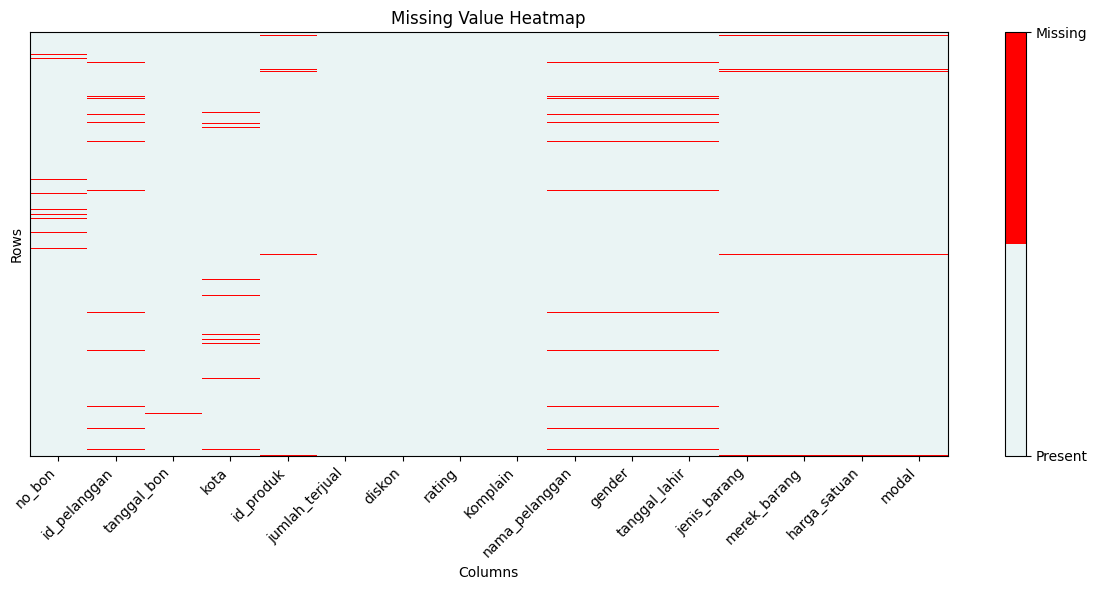

In [174]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

cmap = ListedColormap(["#EAF4F4", "#FF0000"])

M = df_merge.isna().astype(int).values

plt.figure(figsize=(12,6))
im = plt.imshow(M, aspect="auto", vmin=0, vmax=1, cmap=cmap, interpolation="nearest")
plt.title("Missing Value Heatmap")
plt.xlabel("Columns"); plt.ylabel("Rows")
plt.xticks(range(len(df_merge.columns)), df_merge.columns, rotation=45, ha="right")
plt.yticks([])

cbar = plt.colorbar(im, ticks=[0,1])
cbar.ax.set_yticklabels(["Present","Missing"])

plt.tight_layout()
plt.show()


Setelah melihat missing value dari heatmap diatas, kita ingin mengecek outliernya.

In [175]:
num_cols = df_merge.select_dtypes(include="number").columns.tolist()


iqr_stats = (
    df_merge[num_cols]
      .quantile([0.25, 0.75])
      .T.rename(columns={0.25: "Q1", 0.75: "Q3"})
)
iqr_stats["IQR"]   = iqr_stats["Q3"] - iqr_stats["Q1"]
iqr_stats["lower"] = iqr_stats["Q1"] - 1.5 * iqr_stats["IQR"]
iqr_stats["upper"] = iqr_stats["Q3"] + 1.5 * iqr_stats["IQR"]

In [176]:
out_mask = (
    df_merge[num_cols].lt(iqr_stats["lower"], axis=1) |
    df_merge[num_cols].gt(iqr_stats["upper"], axis=1)
)
out_summary = (
    out_mask.sum()
      .rename("outlier_count")
      .to_frame()
      .assign(**{"outlier_%": lambda d: (d["outlier_count"] / len(df_merge) * 100).round(2)})
      .sort_values("outlier_count", ascending=False)
)

out_summary

,outlier_count,outlier_%
harga_satuan,1657,18.97
modal,1532,17.54
jumlah_terjual,492,5.63
rating,0,0.00
diskon,0,0.00


Dan diketahuilah ada outliers, paling besar di column `harga_satuan_num,` kemudian `modal`, dan terakhir di `jumlah_terjual`. Agar lebih jelas, maka kita menggunakan boxplot untuk melihat persebaran outliernya

/tmp/ipython-input-1263907628.py:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


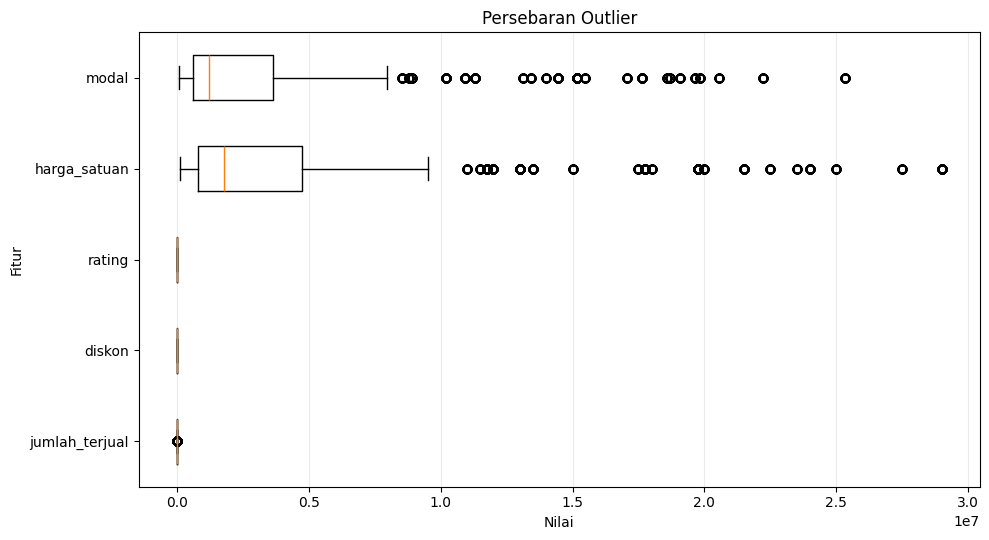

In [177]:
num_cols = df_merge.select_dtypes(include="number").columns.tolist()
X = df_merge[num_cols].apply(pd.to_numeric, errors="coerce")

data = [X[c].dropna().values for c in num_cols]
labels = num_cols

plt.figure(figsize=(10, 0.7*len(labels) + 2))
plt.boxplot(
    data,
    labels=labels,
    vert=False,
    showfliers=True,
    whis=1.5
)
plt.title("Persebaran Outlier")
plt.xlabel("Nilai")
plt.ylabel("Fitur")
plt.grid(axis="x", alpha=0.25)
plt.tight_layout()
plt.show()


### handle the missing value (imputasi)

Menangani missing value dilakukan dengan imputasi. walaupun persentase missing value pada dataframe ini berkisar di 2% saja.

### **no_bon**

`no_bon` berada di paling pertama dikarenakan `no_bon` tidak berurutan dan sifatnya acak. Jadi missing value akan diisi dengan 'Unknown'

In [178]:
df_merge['no_bon'] = (
    df_merge['no_bon']
      .replace(r'^\s*$', np.nan, regex=True)
      .fillna('Unknown')
      .astype('string')
)

In [179]:
print("Jumlah 'Unknown' di no_bon:", (df_merge['no_bon'] == 'Unknown').sum())
print("Missing di no_bon setelah fill:", df_merge['no_bon'].isna().sum())

Jumlah 'Unknown' di no_bon: 181
Missing di no_bon setelah fill: 0


### **id_pelanggan**

diimpute menggunakan `nama_pelanggan`,

In [180]:
for col in ['id_pelanggan', 'nama_pelanggan']:
    df_merge[col] = (
        df_merge[col]
          .replace(r'^\s*$', np.nan, regex=True)
          .astype('string')
    )

df_merge['__nama_key'] = (
    df_merge['nama_pelanggan']
      .str.lower()
      .str.strip()
)

In [181]:
name_to_id = (
    df_merge.dropna(subset=['__nama_key', 'id_pelanggan'])
            .groupby('__nama_key')['id_pelanggan']
            .agg(lambda s: s.mode().iat[0])
)

In [182]:
mask_missing_id = df_merge['id_pelanggan'].isna()
df_merge.loc[mask_missing_id, 'id_pelanggan'] = (
    df_merge.loc[mask_missing_id, '__nama_key'].map(name_to_id)
)

In [183]:
still_missing = df_merge['id_pelanggan'].isna().sum()

df_merge['id_pelanggan'] = df_merge['id_pelanggan'].fillna('Unknown').astype('string')

df_merge.drop(columns='__nama_key', inplace=True)

filled_from_name = mask_missing_id.sum() - still_missing
unknown_count    = (df_merge['id_pelanggan'] == 'Unknown').sum()

print(f"Terisi dari nama_pelanggan: {filled_from_name}")
print(f"Diisi 'Unknown' (tidak ada referensi nama/id): {unknown_count}")

Terisi dari nama_pelanggan: 0
Diisi 'Unknown' (tidak ada referensi nama/id): 177


### **nama_pelanggan**

fokus pada `id_pelanggan` terlebih dahulu

In [323]:
for col in ['id_pelanggan', 'nama_pelanggan']:
    df_merge[col] = (
        df_merge[col]
          .replace(r'^\s*$', np.nan, regex=True)
          .astype('string')
    )

mask_valid_id = df_merge['id_pelanggan'].notna() & (df_merge['id_pelanggan'].str.lower() != 'unknown')
map_df = df_merge.loc[mask_valid_id & df_merge['nama_pelanggan'].notna(), ['id_pelanggan','nama_pelanggan']]

id_to_name = (
    map_df.groupby('id_pelanggan')['nama_pelanggan']
          .agg(lambda s: s.mode().iat[0])
)

mask_missing_name = df_merge['nama_pelanggan'].isna()
df_merge.loc[mask_missing_name, 'nama_pelanggan'] = (
    df_merge.loc[mask_missing_name, 'id_pelanggan'].map(id_to_name)
)


In [324]:

df_merge['nama_pelanggan'] = df_merge['nama_pelanggan'].fillna('unknown').astype('string')

filled_from_id = (df_merge.loc[mask_missing_name, 'nama_pelanggan'] != 'unknown').sum()
unknown_count  = (df_merge['nama_pelanggan'] == 'unknown').sum()

print(f"Terisi dari id_pelanggan: {filled_from_id}")
print(f"Diisi 'unknown': {unknown_count}")

Terisi dari id_pelanggan: 0
Diisi 'unknown': 177


### **gender**

id_pelanggan, kalau tidak ada baru fallback

In [326]:
for col in ['gender', 'id_pelanggan', 'nama_pelanggan']:
    df_merge[col] = (
        df_merge[col]
          .replace(r'^\s*$', np.nan, regex=True)
          .astype('string')
    )

df_merge['__nama_key'] = df_merge['nama_pelanggan'].str.lower().str.strip()

valid_gender = df_merge['gender'].notna()

valid_id   = df_merge['id_pelanggan'].notna() & (df_merge['id_pelanggan'].str.lower() != 'unknown')
valid_name = df_merge['__nama_key'].notna()   & (df_merge['__nama_key'] != 'unknown')

In [327]:
id_to_gender = (
    df_merge.loc[valid_gender & valid_id, ['id_pelanggan','gender']]
            .groupby('id_pelanggan')['gender']
            .agg(lambda s: s.mode().iat[0]))

In [328]:
name_to_gender = (
    df_merge.loc[valid_gender & valid_name, ['__nama_key','gender']]
            .groupby('__nama_key')['gender']
            .agg(lambda s: s.mode().iat[0])
)

In [ ]:
missing0 = df_merge['gender'].isna().sum()

mask_missing = df_merge['gender'].isna()
df_merge.loc[mask_missing, 'gender'] = df_merge.loc[mask_missing, 'id_pelanggan'].map(id_to_gender)
missing1 = df_merge['gender'].isna().sum()
filled_from_id = missing0 - missing1

In [ ]:
mask_missing = df_merge['gender'].isna()
df_merge.loc[mask_missing, 'gender'] = df_merge.loc[mask_missing, '__nama_key'].map(name_to_gender)
missing2 = df_merge['gender'].isna().sum()
filled_from_name = missing1 - missing2

df_merge['gender'] = df_merge['gender'].fillna('Unknown').astype('string')
unknown_count = (df_merge['gender'] == 'Unknown').sum()

In [ ]:
df_merge.drop(columns='__nama_key', inplace=True)

print(f"Terisi dari id_pelanggan : {filled_from_id}")
print(f"Terisi dari nama_pelanggan: {filled_from_name}")
print(f"Diisi 'Unknown'          : {unknown_count}")

### **kota**

`id_pelanggan`

In [186]:
for col in ['kota', 'id_pelanggan']:
    df_merge[col] = (
        df_merge[col]
          .replace(r'^\s*$', np.nan, regex=True)
          .astype('string')
    )

Terisi dari id_pelanggan: 181
Diisi 'unknown'         : 2


In [186]:
valid_id   = df_merge['id_pelanggan'].notna() & (df_merge['id_pelanggan'].str.lower() != 'unknown')
valid_kota = df_merge['kota'].notna() & (df_merge['kota'].str.lower() != 'unknown')

id_to_city = (
    df_merge.loc[valid_id & valid_kota, ['id_pelanggan','kota']]
            .groupby('id_pelanggan')['kota']
            .agg(lambda s: s.mode().iat[0])

In [ ]:
missing0 = df_merge['kota'].isna().sum()
mask_missing = df_merge['kota'].isna()
df_merge.loc[mask_missing, 'kota'] = df_merge.loc[mask_missing, 'id_pelanggan'].map(id_to_city)
missing1 = df_merge['kota'].isna().sum()
filled_from_id = missing0 - missing1

In [ ]:
df_merge['kota'] = df_merge['kota'].fillna('unknown').astype('string')
df_merge['kota'] = df_merge['kota'].str.strip().where(df_merge['kota'].str.lower() != 'unknown', 'unknown')

unknown_count = (df_merge['kota'] == 'unknown').sum()

print(f"Terisi dari id_pelanggan: {filled_from_id}")
print(f"Diisi 'unknown'         : {unknown_count}")

### **tanggal_lahir**

`id_pelanggan`

In [384]:
for col in ['id_pelanggan', 'nama_pelanggan']:
    df_merge[col] = (
        df_merge[col]
          .replace(r'^\s*$', np.nan, regex=True)
          .astype('string')
    )

df_merge['tanggal_lahir'] = pd.to_datetime(df_merge['tanggal_lahir'], errors='coerce')

valid_id  = df_merge['id_pelanggan'].notna() & (df_merge['id_pelanggan'].str.lower() != 'unknown')
valid_dob = df_merge['tanggal_lahir'].notna()

In [385]:
id_dob_counts = (
    df_merge.loc[valid_id & valid_dob]
            .groupby('id_pelanggan')['tanggal_lahir']
            .nunique())

conflict_ids = set(id_dob_counts[id_dob_counts > 1].index)
unique_ids    = set(id_dob_counts[id_dob_counts == 1].index)

id_to_dob = (
    df_merge.loc[valid_id & valid_dob]
            .groupby('id_pelanggan')['tanggal_lahir']
            .agg(lambda s: s.mode().iat[0]))
id_to_dob_unique = id_to_dob[id_to_dob.index.isin(unique_ids)]

df_merge['__nama_key'] = df_merge['nama_pelanggan'].str.lower().str.strip()
valid_name = df_merge['__nama_key'].notna() & (df_merge['__nama_key'] != 'unknown')

name_dob_counts = (
    df_merge.loc[valid_name & valid_dob]
            .groupby('__nama_key')['tanggal_lahir']
            .nunique())
unique_names = set(name_dob_counts[name_dob_counts == 1].index)

In [386]:
name_to_dob = (
    df_merge.loc[valid_name & valid_dob]
            .groupby('__nama_key')['tanggal_lahir']
            .agg(lambda s: s.mode().iat[0])
)
name_to_dob_unique = name_to_dob[name_to_dob.index.isin(unique_names)]

missing0 = df_merge['tanggal_lahir'].isna().sum()

mask_missing = df_merge['tanggal_lahir'].isna()
df_merge.loc[mask_missing, 'tanggal_lahir'] = (
    df_merge.loc[mask_missing, 'id_pelanggan'].map(id_to_dob_unique)
)
missing1 = df_merge['tanggal_lahir'].isna().sum()
filled_from_id = missing0 - missing1

mask_missing = df_merge['tanggal_lahir'].isna()
df_merge.loc[mask_missing, 'tanggal_lahir'] = (
    df_merge.loc[mask_missing, '__nama_key'].map(name_to_dob_unique)
)
missing2 = df_merge['tanggal_lahir'].isna().sum()
filled_from_name = missing1 - missing2

In [387]:
df_merge['tanggal_lahir'] = df_merge['tanggal_lahir'].dt.strftime('%Y-%m-%d')
df_merge['tanggal_lahir'] = df_merge['tanggal_lahir'].fillna('Unknown').astype('string')

df_merge['dob_conflict'] = df_merge['id_pelanggan'].isin(conflict_ids)

unknown_count = (df_merge['tanggal_lahir'] == 'Unknown').sum()
print(f"Terisi dari id_pelanggan (unik): {filled_from_id}")
print(f"Terisi dari nama_pelanggan (unik): {filled_from_name}")
print(f"Diisi 'Unknown'                 : {unknown_count}")
print(f"Jumlah id_pelanggan dengan >1 DOB (konflik): {len(conflict_ids)}")

df_merge.drop(columns='__nama_key', inplace=True)

Terisi dari id_pelanggan (unik): 0
Terisi dari nama_pelanggan (unik): 0
Diisi 'Unknown'                 : 177
Jumlah id_pelanggan dengan >1 DOB (konflik): 0


## **id_produk**

In [389]:
for col in ['id_produk', 'jenis_barang', 'merek_barang']:
    df_merge[col] = (
        df_merge[col]
          .replace(r'^\s*$', np.nan, regex=True)
          .astype('string'))

df_merge['__jenis_key'] = df_merge['jenis_barang'].str.lower().str.strip()
df_merge['__merek_key'] = df_merge['merek_barang'].str.lower().str.strip()
df_merge['__jenis_key'] = df_merge['__jenis_key'].where(df_merge['__jenis_key'] != 'unknown', np.nan)
df_merge['__merek_key'] = df_merge['__merek_key'].where(df_merge['__merek_key'] != 'unknown', np.nan)

valid_id = df_merge['id_produk'].notna() & (df_merge['id_produk'].str.lower() != 'unknown')
valid_pair = df_merge['__jenis_key'].notna() & df_merge['__merek_key'].notna()



In [390]:
grp_pair = (df_merge.loc[valid_id & valid_pair]
                    .groupby(['__jenis_key','__merek_key'])['id_produk'])
pair_counts = grp_pair.nunique()
pair_unique_idx = pair_counts[pair_counts == 1].index
pair_to_id = grp_pair.agg(lambda s: s.mode().iat[0]).loc[pair_unique_idx].to_dict()

grp_brand = (df_merge.loc[valid_id & df_merge['__merek_key'].notna()]
                     .groupby('__merek_key')['id_produk'])
brand_counts = grp_brand.nunique()
brand_unique_idx = brand_counts[brand_counts == 1].index
brand_to_id = grp_brand.agg(lambda s: s.mode().iat[0]).loc[brand_unique_idx].to_dict()

In [391]:
grp_type = (df_merge.loc[valid_id & df_merge['__jenis_key'].notna()]
                    .groupby('__jenis_key')['id_produk'])
type_counts = grp_type.nunique()
type_unique_idx = type_counts[type_counts == 1].index
type_to_id = grp_type.agg(lambda s: s.mode().iat[0]).loc[type_unique_idx].to_dict()

missing0 = df_merge['id_produk'].isna().sum()
mask_missing = df_merge['id_produk'].isna() & df_merge['__merek_key'].notna()
df_merge.loc[mask_missing, 'id_produk'] = df_merge.loc[mask_missing, '__merek_key'].map(brand_to_id)
missing2 = df_merge['id_produk'].isna().sum()
filled_from_brand = missing1 - missing2

mask_missing = df_merge['id_produk'].isna() & df_merge['__jenis_key'].notna()
df_merge.loc[mask_missing, 'id_produk'] = df_merge.loc[mask_missing, '__jenis_key'].map(type_to_id)
missing3 = df_merge['id_produk'].isna().sum()
filled_from_type = missing2 - missing3

df_merge['id_produk'] = df_merge['id_produk'].fillna('Unknown').astype('string')

unknown_count = (df_merge['id_produk'] == 'Unknown').sum()

pair_conflicts  = int((pair_counts > 1).sum())
brand_conflicts = int((brand_counts > 1).sum())
type_conflicts  = int((type_counts > 1).sum())

## **harga_satuan**

In [189]:
if 'harga_Satuan' in df_merge.columns and 'harga_satuan' not in df_merge.columns:
    df_merge.rename(columns={'harga_Satuan': 'harga_satuan'}, inplace=True)

for col in ['id_produk','jenis_barang','merek_barang','harga_satuan']:
    if col in df_merge.columns:
        df_merge[col] = df_merge[col].replace(r'^\s*$', np.nan, regex=True).astype('string')

df_merge['harga_satuan_num'] = pd.to_numeric(df_merge.get('harga_satuan', np.nan), errors='coerce')

df_merge['__jenis_key'] = df_merge['jenis_barang'].str.lower().str.strip()
df_merge['__merek_key'] = df_merge['merek_barang'].str.lower().str.strip()
df_merge['__jenis_key'] = df_merge['__jenis_key'].where(df_merge['__jenis_key'] != 'unknown', np.nan)
df_merge['__merek_key'] = df_merge['__merek_key'].where(df_merge['__merek_key'] != 'unknown', np.nan)

valid_price = df_merge['harga_satuan_num'].notna()
valid_id    = df_merge['id_produk'].notna() & (df_merge['id_produk'].str.lower() != 'unknown')
valid_pair  = df_merge['__jenis_key'].notna() & df_merge['__merek_key'].notna()

id_to_price = (
    df_merge.loc[valid_id & valid_price]
            .groupby('id_produk')['harga_satuan_num'].median()
)

pair_to_price = (
    df_merge.loc[valid_pair & valid_price]
            .groupby(['__jenis_key','__merek_key'])['harga_satuan_num'].median()
            .to_dict()
)


brand_to_price = (
    df_merge.loc[df_merge['__merek_key'].notna() & valid_price]
            .groupby('__merek_key')['harga_satuan_num'].median()
)


type_to_price = (
    df_merge.loc[df_merge['__jenis_key'].notna() & valid_price]
            .groupby('__jenis_key')['harga_satuan_num'].median()
)

Imput dari id_produk            : 0
Imput dari (jenis, merek)       : 0
Imput dari merek                : 0
Imput dari jenis                : 0
Sisa 'Unknown' di harga_satuan  : 175


In [ ]:
missing0 = df_merge['harga_satuan_num'].isna().sum()

mask = df_merge['harga_satuan_num'].isna() & valid_id
df_merge.loc[mask, 'harga_satuan_num'] = df_merge.loc[mask, 'id_produk'].map(id_to_price)
missing1 = df_merge['harga_satuan_num'].isna().sum()
filled_from_id = missing0 - missing1

mask = df_merge['harga_satuan_num'].isna() & valid_pair
filled_pair = df_merge.loc[mask, ['__jenis_key','__merek_key']].apply(
    lambda r: pair_to_price.get((r['__jenis_key'], r['__merek_key'])),
    axis=1
)
df_merge.loc[mask, 'harga_satuan_num'] = filled_pair.values
missing2 = df_merge['harga_satuan_num'].isna().sum()
filled_from_pair = missing1 - missing2

mask = df_merge['harga_satuan_num'].isna() & df_merge['__merek_key'].notna()
df_merge.loc[mask, 'harga_satuan_num'] = df_merge.loc[mask, '__merek_key'].map(brand_to_price)
missing3 = df_merge['harga_satuan_num'].isna().sum()
filled_from_brand = missing2 - missing3

mask = df_merge['harga_satuan_num'].isna() & df_merge['__jenis_key'].notna()
df_merge.loc[mask, 'harga_satuan_num'] = df_merge.loc[mask, '__jenis_key'].map(type_to_price)
missing4 = df_merge['harga_satuan_num'].isna().sum()
filled_from_type = missing3 - missing4

df_merge['harga_satuan'] = df_merge['harga_satuan_num'].map(
    lambda x: f"{x:.2f}" if pd.notna(x) else "Unknown"
).astype('string')

unknown_count = (df_merge['harga_satuan'] == 'Unknown').sum()

In [ ]:
print(f"Imput dari id_produk            : {filled_from_id}")
print(f"Imput dari (jenis, merek)       : {filled_from_pair}")
print(f"Imput dari merek                : {filled_from_brand}")
print(f"Imput dari jenis                : {filled_from_type}")
print(f"Sisa 'Unknown' di harga_satuan  : {unknown_count}")

df_merge.drop(columns=['__jenis_key','__merek_key'], inplace=True)

## **modal**

In [190]:
from IPython.display import display


df_src = df_merge.copy()

if 'modal_num' not in df_src.columns:
    df_src['modal_num'] = pd.to_numeric(df_src.get('modal', np.nan), errors='coerce')
else:
    df_src['modal_num'] = pd.to_numeric(df_src['modal_num'], errors='coerce')

if 'harga_satuan_num' not in df_src.columns:
    df_src['harga_satuan_num'] = pd.to_numeric(df_src.get('harga_satuan', np.nan), errors='coerce')
else:
    df_src['harga_satuan_num'] = pd.to_numeric(df_src['harga_satuan_num'], errors='coerce')

n_total = len(df_src)

def _safe(name, default):
    try:
        return globals()[name]
    except KeyError:
        return default

missing0  = _safe('missing0',  df_src['modal_num'].isna().sum())
missing1  = _safe('missing1',  missing0)
missing2  = _safe('missing2',  missing1)
missing3  = _safe('missing3',  missing2)
missing4  = _safe('missing4',  missing3)
missing5  = _safe('missing5',  missing4)
missing6  = _safe('missing6',  missing5)
missing7  = _safe('missing7',  missing6)
missing8  = _safe('missing8',  missing7)
missing9  = _safe('missing9',  missing8)
missing10 = _safe('missing10', df_src['modal_num'].isna().sum())

                            RINGKASAN IMPUTASI MODAL                            
Total baris                 : 8,736
Missing awal (modal_num)    : 175 (2.00%)


,Langkah,Terisi,% dari missing awal
0,a) id_produk → median,0,0.00%
1,b) id_produk → ratio × harga,0,0.00%
2,"c) (jenis,merek) → median",0,0.00%
3,"d) (jenis,merek) → ratio × harga",0,0.00%
4,e) merek → median,175,100.00%
5,f) merek → ratio × harga,0,0.00%
6,g) jenis → median,0,0.00%
7,h) jenis → ratio × harga,0,0.00%
8,i) global ratio × harga,0,0.00%
9,j) global median,0,0.00%


--------------------------------------------------------------------------------
Sisa missing (modal_num)    : 0 (0.00%)
Kasus modal > harga_satuan  : 0 (0.00%)
--------------------------------------------------------------------------------
Statistik modal_num setelah imputasi:
 count       mean       std     min      p25    median       p75        max
8561.0 3870103.57 5759216.6 87603.0 605976.0 1227395.0 3623315.0 25312998.0


In [ ]:
filled_id_median    = missing0 - missing1
filled_id_ratio     = missing1 - missing2
filled_pair_median  = missing2 - missing3
filled_pair_ratio   = missing3 - missing4
filled_brand_median = missing4 - missing5
filled_brand_ratio  = missing5 - missing6
filled_type_median  = missing6 - missing7
filled_type_ratio   = missing7 - missing8
filled_glob_ratio   = missing8 - missing9
filled_glob_median  = missing9 - missing10

report_rows = [
    ("a) id_produk → median",            filled_id_median),
    ("b) id_produk → ratio × harga",     filled_id_ratio),
    ("c) (jenis,merek) → median",        filled_pair_median),
    ("d) (jenis,merek) → ratio × harga", filled_pair_ratio),
    ("e) merek → median",                filled_brand_median),
    ("f) merek → ratio × harga",         filled_brand_ratio),
    ("g) jenis → median",                filled_type_median),
    ("h) jenis → ratio × harga",         filled_type_ratio),
    ("i) global ratio × harga",          filled_glob_ratio),
    ("j) global median",                 filled_glob_median),
]
report_df = pd.DataFrame(report_rows, columns=["Langkah","Terisi"])
report_df["% dari missing awal"] = (
    report_df["Terisi"] / (missing0 if missing0 else 1) * 100
).round(2)

print("="*80)
print("RINGKASAN IMPUTASI MODAL".center(80))
print("="*80)
print(f"Total baris                 : {n_total:,}")
print(f"Missing awal (modal_num)    : {missing0:,} ({(missing0/n_total):.2%})")
display(report_df.style.format({"Terisi": "{:,.0f}", "% dari missing awal": "{:.2f}%"}))

print("-"*80)
print(f"Sisa missing (modal_num)    : {missing10:,} ({(missing10/n_total):.2%})")

suspicious = int(
    (df_src['modal_num'].notna() & df_src['harga_satuan_num'].notna() &
     (df_src['modal_num'] > df_src['harga_satuan_num'])).sum()
)
print(f"Kasus modal > harga_satuan  : {suspicious:,} ({(suspicious/n_total):.2%})")

desc = df_src['modal_num'].describe(percentiles=[.25,.5,.75]).rename({
    'count':'count','mean':'mean','std':'std',
    'min':'min','25%':'p25','50%':'median','75%':'p75','max':'max'
})
print("-"*80)
print("Statistik modal_num setelah imputasi:")
print(desc.to_frame().T.round(2).to_string(index=False))
print("="*80)

### **jenis_barang**

In [191]:
for col in ['jenis_barang','merek_barang','id_produk']:
    if col in df_merge.columns:
        df_merge[col] = (
            df_merge[col]
              .replace(r'^\s*$', np.nan, regex=True)
              .astype('string')
        )

df_merge['__merek_key'] = df_merge['merek_barang'].str.lower().str.strip()
df_merge['__merek_key'] = df_merge['__merek_key'].where(df_merge['__merek_key'] != 'unknown', np.nan)


valid_jenis = df_merge['jenis_barang'].notna() & (df_merge['jenis_barang'].str.lower() != 'unknown')
valid_id    = df_merge['id_produk'].notna() & (df_merge['id_produk'].str.lower() != 'unknown')
valid_merek = df_merge['__merek_key'].notna()


id_jenis_nunique = (
    df_merge.loc[valid_id & valid_jenis]
            .groupby('id_produk')['jenis_barang']
            .nunique()
)
id_conflict   = set(id_jenis_nunique[id_jenis_nunique > 1].index)
id_unique_set = set(id_jenis_nunique[id_jenis_nunique == 1].index)


id_to_jenis_all = (
    df_merge.loc[valid_id & valid_jenis]
            .groupby('id_produk')['jenis_barang']
            .agg(lambda s: s.mode().iat[0])
)
id_to_jenis_unique = id_to_jenis_all[id_to_jenis_all.index.isin(id_unique_set)]


                        RINGKASAN IMPUTASI JENIS_BARANG                         
Total baris                     : 8,736
Missing awal (jenis_barang)     : 175 (2.00%)
Terisi dari id_produk (unik)    : 0 (0.00% dari missing awal)
Terisi dari merek (unik)        : 0 (0.00% dari missing awal)
Sisa 'Unknown'                  : 175 (2.00%)
--------------------------------------------------------------------------------
ID dengan >1 jenis (konflik)    : 0
Merek dengan >1 jenis (konflik) : 17


In [ ]:
brand_jenis_nunique = (
    df_merge.loc[valid_merek & valid_jenis]
            .groupby('__merek_key')['jenis_barang']
            .nunique()
)
brand_conflict   = set(brand_jenis_nunique[brand_jenis_nunique > 1].index)
brand_unique_set = set(brand_jenis_nunique[brand_jenis_nunique == 1].index)

brand_to_jenis_all = (
    df_merge.loc[valid_merek & valid_jenis]
            .groupby('__merek_key')['jenis_barang']
            .agg(lambda s: s.mode().iat[0])
)
brand_to_jenis_unique = brand_to_jenis_all[brand_to_jenis_all.index.isin(brand_unique_set)]

missing0 = df_merge['jenis_barang'].isna().sum()

mask = df_merge['jenis_barang'].isna() & valid_id & df_merge['id_produk'].isin(id_unique_set)
df_merge.loc[mask, 'jenis_barang'] = df_merge.loc[mask, 'id_produk'].map(id_to_jenis_unique)
missing1 = df_merge['jenis_barang'].isna().sum()
filled_from_id = missing0 - missing1

mask = df_merge['jenis_barang'].isna() & valid_merek & df_merge['__merek_key'].isin(brand_unique_set)
df_merge.loc[mask, 'jenis_barang'] = df_merge.loc[mask, '__merek_key'].map(brand_to_jenis_unique)
missing2 = df_merge['jenis_barang'].isna().sum()
filled_from_brand = missing1 - missing2

df_merge['jenis_barang'] = (
    df_merge['jenis_barang']
      .fillna('Unknown')
      .astype('string')
)

unknown_count = (df_merge['jenis_barang'] == 'Unknown').sum()

df_merge['jenis_conflict_by_id']    = df_merge['id_produk'].isin(id_conflict)
df_merge['jenis_conflict_by_brand'] = df_merge['__merek_key'].isin(brand_conflict)


In [191]:
n_total = len(df_merge)
print("="*80)
print("RINGKASAN IMPUTASI JENIS_BARANG".center(80))
print("="*80)
print(f"Total baris                     : {n_total:,}")
print(f"Missing awal (jenis_barang)     : {missing0:,} ({(missing0/n_total):.2%})")
print(f"Terisi dari id_produk (unik)    : {filled_from_id:,} ({(filled_from_id/(missing0 or 1)):.2%} dari missing awal)")
print(f"Terisi dari merek (unik)        : {filled_from_brand:,} ({(filled_from_brand/(missing0 or 1)):.2%} dari missing awal)")
print(f"Sisa 'Unknown'                  : {unknown_count:,} ({(unknown_count/n_total):.2%})")
print("-"*80)
print(f"ID dengan >1 jenis (konflik)    : {len(id_conflict):,}")
print(f"Merek dengan >1 jenis (konflik) : {len(brand_conflict):,}")
print("="*80)


df_merge.drop(columns=['__merek_key'], inplace=True)


### **tanggal_bon**

In [192]:
for col in ['no_bon','id_pelanggan','id_produk','kota']:
    if col in df_merge.columns:
        df_merge[col] = df_merge[col].replace(r'^\s*$', np.nan, regex=True).astype('string')

df_merge['tanggal_bon'] = pd.to_datetime(df_merge['tanggal_bon'], errors='coerce')

valid_bon   = df_merge['no_bon'].notna() & (df_merge['no_bon'].str.lower() != 'unknown')
valid_id    = df_merge['id_pelanggan'].notna() & (df_merge['id_pelanggan'].str.lower() != 'unknown')
valid_prod  = df_merge['id_produk'].notna() & (df_merge['id_produk'].str.lower() != 'unknown')
valid_date  = df_merge['tanggal_bon'].notna()

nb_nuniq = (df_merge.loc[valid_bon & valid_date]
                    .groupby('no_bon')['tanggal_bon']
                    .nunique())
bon_conflict = set(nb_nuniq[nb_nuniq > 1].index)
bon_unique   = set(nb_nuniq[nb_nuniq == 1].index)

bon_to_date_all = (df_merge.loc[valid_bon & valid_date]
                           .groupby('no_bon')['tanggal_bon']
                           .agg(lambda s: s.mode().iat[0]))
bon_to_date_unique = bon_to_date_all[bon_to_date_all.index.isin(bon_unique)]

id_to_date_median   = (df_merge.loc[valid_id & valid_date]
                               .groupby('id_pelanggan')['tanggal_bon'].median())
prod_to_date_median = (df_merge.loc[valid_prod & valid_date]
                               .groupby('id_produk')['tanggal_bon'].median())

global_median_date = df_merge.loc[valid_date, 'tanggal_bon'].median() if valid_date.any() else pd.NaT

missing0 = df_merge['tanggal_bon'].isna().sum()
df_merge['tanggal_bon_source'] = np.where(df_merge['tanggal_bon'].notna(), 'original', 'missing')

mask = df_merge['tanggal_bon'].isna() & df_merge['no_bon'].isin(bon_unique)
df_merge.loc[mask, 'tanggal_bon'] = df_merge.loc[mask, 'no_bon'].map(bon_to_date_unique)
df_merge.loc[mask & df_merge['tanggal_bon'].notna(), 'tanggal_bon_source'] = 'no_bon'
missing1 = df_merge['tanggal_bon'].isna().sum()
filled_from_bon = missing0 - missing1

mask = df_merge['tanggal_bon'].isna() & valid_id
df_merge.loc[mask, 'tanggal_bon'] = df_merge.loc[mask, 'id_pelanggan'].map(id_to_date_median)
df_merge.loc[mask & df_merge['tanggal_bon'].notna(), 'tanggal_bon_source'] = 'id_pelanggan_median'
missing2 = df_merge['tanggal_bon'].isna().sum()
filled_from_id = missing1 - missing2

mask = df_merge['tanggal_bon'].isna() & valid_prod
df_merge.loc[mask, 'tanggal_bon'] = df_merge.loc[mask, 'id_produk'].map(prod_to_date_median)
df_merge.loc[mask & df_merge['tanggal_bon'].notna(), 'tanggal_bon_source'] = 'id_produk_median'
missing3 = df_merge['tanggal_bon'].isna().sum()
filled_from_prod = missing2 - missing3

mask = df_merge['tanggal_bon'].isna() & pd.notna(global_median_date)
df_merge.loc[mask, 'tanggal_bon'] = global_median_date
df_merge.loc[mask & df_merge['tanggal_bon'].notna(), 'tanggal_bon_source'] = 'global_median'
missing4 = df_merge['tanggal_bon'].isna().sum()
filled_from_global = missing3 - missing4

df_merge['tanggal_bon_str'] = df_merge['tanggal_bon'].dt.strftime('%Y-%m-%d %H:%M:%S').astype('string')
df_merge['tanggal_bon_str'] = df_merge['tanggal_bon_str'].fillna('Unknown')
df_merge['bon_conflict']    = df_merge['no_bon'].isin(bon_conflict)

n_total = len(df_merge)
unknown_left = df_merge['tanggal_bon'].isna().sum()

print("="*80)
print("RINGKASAN IMPUTASI TANGGAL_BON".center(80))
print("="*80)
print(f"Total baris                        : {n_total:,}")
print(f"Missing awal (tanggal_bon)         : {missing0:,} ({(missing0/n_total):.2%})")
print(f"Terisi dari no_bon (unik)          : {filled_from_bon:,} ({(filled_from_bon/(missing0 or 1)):.2%} dari missing awal)")
print(f"Terisi dari median id_pelanggan    : {filled_from_id:,} ({(filled_from_id/(missing0 or 1)):.2%})")
print(f"Terisi dari median id_produk       : {filled_from_prod:,} ({(filled_from_prod/(missing0 or 1)):.2%})")
print(f"Terisi dari median global          : {filled_from_global:,} ({(filled_from_global/(missing0 or 1)):.2%})")
print("-"*80)
print(f"Sisa NaN tanggal_bon               : {unknown_left:,} ({(unknown_left/n_total):.2%})")
print(f"no_bon dengan >1 tanggal (konflik) : {len(bon_conflict):,}")
print("="*80)


                         RINGKASAN IMPUTASI TANGGAL_BON                         
Total baris                        : 8,736
Missing awal (tanggal_bon)         : 9 (0.10%)
Terisi dari no_bon (unik)          : 0 (0.00% dari missing awal)
Terisi dari median id_pelanggan    : 9 (100.00%)
Terisi dari median id_produk       : 0 (0.00%)
Terisi dari median global          : 0 (0.00%)
--------------------------------------------------------------------------------
Sisa NaN tanggal_bon               : 0 (0.00%)
no_bon dengan >1 tanggal (konflik) : 0


# **POST-DATA CLEANING**

In [193]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8736 entries, 0 to 8739
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   no_bon                   8736 non-null   string        
 1   id_pelanggan             8736 non-null   string        
 2   tanggal_bon              8736 non-null   datetime64[ns]
 3   kota                     8736 non-null   string        
 4   id_produk                8736 non-null   string        
 5   jumlah_terjual           8736 non-null   int64         
 6   diskon                   8736 non-null   int64         
 7   rating                   8736 non-null   int64         
 8   Komplain                 8736 non-null   object        
 9   nama_pelanggan           8736 non-null   string        
 10  gender                   8736 non-null   string        
 11  tanggal_lahir            8736 non-null   string        
 12  jenis_barang             8736 non-null 

In [194]:
df_merge.isna().sum()

,0
no_bon,0
id_pelanggan,0
tanggal_bon,0
kota,0
id_produk,0
jumlah_terjual,0
diskon,0
rating,0
Komplain,0
nama_pelanggan,0


In [195]:
def miss_str(s: pd.Series) -> pd.Series:
    s = s.astype("string")
    return s.isna() | s.str.strip().eq('') | s.str.lower().eq('unknown')

brand_miss = miss_str(df_merge['merek_barang'])


if 'modal_num' in df_merge.columns:
    modal_miss = df_merge['modal_num'].isna()
    if 'modal' in df_merge.columns:
        modal_miss = modal_miss | df_merge['modal'].astype('string').str.lower().eq('unknown')
else:
    modal_miss = miss_str(df_merge['modal'])

print("merek_barang missing :", int(brand_miss.sum()))
print("modal missing       :", int(modal_miss.sum()))
print("Overlap (dua-duanya):", int((brand_miss & modal_miss).sum()))
print(pd.crosstab(brand_miss, modal_miss, rownames=['merek_missing'], colnames=['modal_missing']))


merek_barang missing : 175
modal missing       : 175
Overlap (dua-duanya): 175
modal_missing  False  True 
merek_missing              
False           8561      0
True               0    175


In [196]:
def miss_str(s: pd.Series) -> pd.Series:
    s = s.astype("string")
    return s.isna() | s.str.strip().eq('') | s.str.lower().eq('unknown')

cols_to_check = ['merek_barang', 'modal', 'modal_num']

cols_view = [
    'no_bon','id_pelanggan','nama_pelanggan','id_produk',
    'jenis_barang','merek_barang','harga_satuan','modal',
    'harga_satuan_num','modal_num','kota','tanggal_bon'
]
cols_view = [c for c in cols_view if c in df_merge.columns]

for col in cols_to_check:
    if col not in df_merge.columns:
        continue

    if col.endswith('_num') or pd.api.types.is_numeric_dtype(df_merge[col]):
        mask = df_merge[col].isna()
    else:
        mask = miss_str(df_merge[col])

    n = int(mask.sum())
    print(f"\n=== {col}: missing {n} rows ===")
    if n > 0:
        display(
            df_merge.loc[mask, cols_view]
                    .sort_values(by=[c for c in ['tanggal_bon','no_bon'] if c in df_merge.columns])
                    .head(50)
        )
        out = f"missing_rows_{col}.csv"
        df_merge.loc[mask, cols_view].to_csv(out, index=False)
        print(f"→ Disimpan semua baris missing ke: {out}")



=== merek_barang: missing 175 rows ===


,no_bon,id_pelanggan,nama_pelanggan,id_produk,jenis_barang,merek_barang,harga_satuan,modal,harga_satuan_num,kota,tanggal_bon
44,BON02377,PEL01348,Tina PFK,Unknown,Unknown,<NA>,Unknown,NaN,<NA>,Semarang,2022-01-07
68,BON04834,PEL01723,Joko ZZG,Unknown,Unknown,<NA>,Unknown,NaN,<NA>,Denpasar,2022-01-10
72,BON00316,PEL01657,Tina RPD,Unknown,Unknown,<NA>,Unknown,NaN,<NA>,Makassar,2022-01-11
88,BON04979,PEL00650,Dewi VRS,Unknown,Unknown,<NA>,Unknown,NaN,<NA>,Semarang,2022-01-12
188,BON05356,PEL00574,Tina XVD,Unknown,Unknown,<NA>,Unknown,NaN,<NA>,Surabaya,2022-01-25
283,BON05982,PEL01375,Rina ATE,Unknown,Unknown,<NA>,Unknown,NaN,<NA>,Malang,2022-02-08
308,BON08127,PEL01663,Rina UOD,Unknown,Unknown,<NA>,Unknown,NaN,<NA>,Surabaya,2022-02-13
369,BON01828,PEL01298,Lia KAK,Unknown,Unknown,<NA>,Unknown,NaN,<NA>,Malang,2022-02-20
372,BON03906,PEL01631,Sari LAY,Unknown,Unknown,<NA>,Unknown,NaN,<NA>,Balikpapan,2022-02-20
395,BON06195,PEL00434,Rudi YWH,Unknown,Unknown,<NA>,Unknown,NaN,<NA>,Makassar,2022-02-23


→ Disimpan semua baris missing ke: missing_rows_merek_barang.csv

=== modal: missing 175 rows ===


,no_bon,id_pelanggan,nama_pelanggan,id_produk,jenis_barang,merek_barang,harga_satuan,modal,harga_satuan_num,kota,tanggal_bon
44,BON02377,PEL01348,Tina PFK,Unknown,Unknown,<NA>,Unknown,NaN,<NA>,Semarang,2022-01-07
68,BON04834,PEL01723,Joko ZZG,Unknown,Unknown,<NA>,Unknown,NaN,<NA>,Denpasar,2022-01-10
72,BON00316,PEL01657,Tina RPD,Unknown,Unknown,<NA>,Unknown,NaN,<NA>,Makassar,2022-01-11
88,BON04979,PEL00650,Dewi VRS,Unknown,Unknown,<NA>,Unknown,NaN,<NA>,Semarang,2022-01-12
188,BON05356,PEL00574,Tina XVD,Unknown,Unknown,<NA>,Unknown,NaN,<NA>,Surabaya,2022-01-25
283,BON05982,PEL01375,Rina ATE,Unknown,Unknown,<NA>,Unknown,NaN,<NA>,Malang,2022-02-08
308,BON08127,PEL01663,Rina UOD,Unknown,Unknown,<NA>,Unknown,NaN,<NA>,Surabaya,2022-02-13
369,BON01828,PEL01298,Lia KAK,Unknown,Unknown,<NA>,Unknown,NaN,<NA>,Malang,2022-02-20
372,BON03906,PEL01631,Sari LAY,Unknown,Unknown,<NA>,Unknown,NaN,<NA>,Balikpapan,2022-02-20
395,BON06195,PEL00434,Rudi YWH,Unknown,Unknown,<NA>,Unknown,NaN,<NA>,Makassar,2022-02-23


→ Disimpan semua baris missing ke: missing_rows_modal.csv


Drop semua jika id_produk , jeis_barang, dll unknown

In [197]:
if 'mereka_barang' in df_merge.columns and 'merek_barang' not in df_merge.columns:
    df_merge = df_merge.rename(columns={'mereka_barang':'merek_barang'})
if 'harga_Satuan' in df_merge.columns and 'harga_satuan' not in df_merge.columns:
    df_merge = df_merge.rename(columns={'harga_Satuan':'harga_satuan'})

def miss_str(s: pd.Series) -> pd.Series:
    s = s.astype("string")
    return s.isna() | s.str.strip().eq('') | s.str.lower().eq('unknown')

string_cols  = ['id_produk', 'jenis_barang', 'merek_barang', 'harga_satuan']
numeric_cols = ['harga_satuan_num']

present_string = [c for c in string_cols  if c in df_merge.columns]
present_numeric= [c for c in numeric_cols if c in df_merge.columns]

Rows to drop (ALL fields missing): 175 / 8,736 (2.00%)
→ Disimpan ke: rows_dropped_all_unknown_block.csv
New shape: (8561, 23)


In [ ]:
masks = []
for c in present_string:
    masks.append(miss_str(df_merge[c]))
for c in present_numeric:
    masks.append(df_merge[c].isna())

mask_drop_all = pd.Series(True, index=df_merge.index)
for m in masks:
    mask_drop_all &= m

In [ ]:
n_total = len(df_merge)
n_drop  = int(mask_drop_all.sum())
print(f"Rows to drop (ALL fields missing): {n_drop:,} / {n_total:,} ({n_drop/n_total:.2%})")

df_merge.loc[mask_drop_all].to_csv('rows_dropped_all_unknown_block.csv', index=False)
print("→ Disimpan ke: rows_dropped_all_unknown_block.csv")


df_merge = df_merge.loc[~mask_drop_all].copy()
print("New shape:", df_merge.shape)

Lalu kita check apakah rows tersebut berhasil di drop atau tidak

In [198]:
BAD_TOKENS = {"unknown", "na", "n/a", "none", "null", "-"}

def miss_str(s: pd.Series) -> pd.Series:
    s = s.astype("string")
    return (
        s.isna()
        | s.str.strip().eq("")
        | s.str.lower().isin(BAD_TOKENS)
    )

brand_col = 'merek_barang' if 'merek_barang' in df_merge.columns else \
            'mereka_barang' if 'mereka_barang' in df_merge.columns else None

required = ['id_produk','jenis_barang',brand_col,'harga_satuan','harga_satuan_num']
required = [c for c in required if c]

mask_all_missing = (
    miss_str(df_merge['id_produk'])
    & miss_str(df_merge['jenis_barang'])
    & miss_str(df_merge[brand_col])
    & miss_str(df_merge['harga_satuan'])
    & df_merge['harga_satuan_num'].isna()
)

n_total = len(df_merge)
n_bad   = int(mask_all_missing.sum())
print(f"Rows yang memenuhi 'SEMUA missing': {n_bad:,} / {n_total:,} ({n_bad/n_total:.2%})")

if n_bad == 0:
    print(" Drop berhasil: tidak ada baris yang masih memenuhi kriteria ALL missing.")
else:
    print(" Masih ada baris yg memenuhi kriteria. Contoh baris (maks 20):")
    cols_view = [c for c in [
        'no_bon','id_pelanggan','nama_pelanggan','id_produk',
        'jenis_barang', brand_col, 'harga_satuan','harga_satuan_num',
        'modal','kota','tanggal_bon'
    ] if c and c in df_merge.columns]
    display(df_merge.loc[mask_all_missing, cols_view].head(20))

Rows yang memenuhi 'SEMUA missing': 0 / 8,561 (0.00%)
✅ Drop berhasil: tidak ada baris yang masih memenuhi kriteria ALL missing.


In [199]:
df_merge.isna()

,no_bon,id_pelanggan,tanggal_bon,kota,id_produk,jumlah_terjual,diskon,rating,Komplain,nama_pelanggan,...,merek_barang,harga_satuan,modal,dob_conflict,harga_satuan_num,jenis_conflict_by_id,jenis_conflict_by_brand,tanggal_bon_source,tanggal_bon_str,bon_conflict
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8735,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8736,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8737,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8738,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [200]:
df_merge.columns.tolist()


['no_bon',
 'id_pelanggan',
 'tanggal_bon',
 'kota',
 'id_produk',
 'jumlah_terjual',
 'diskon',
 'rating',
 'Komplain',
 'nama_pelanggan',
 'gender',
 'tanggal_lahir',
 'jenis_barang',
 'merek_barang',
 'harga_satuan',
 'modal',
 'dob_conflict',
 'harga_satuan_num',
 'jenis_conflict_by_id',
 'jenis_conflict_by_brand',
 'tanggal_bon_source',
 'tanggal_bon_str',
 'bon_conflict']

Kita ubah `df_merge` menjadi `df_clean `dan melakukan drop beberapa columns

In [201]:
cols_to_drop = [
    'dob_conflict',
    'harga_satuan_num',
    'jenis_conflict_by_id',
    'jenis_conflict_by_brand',
    'tanggal_bon_source',
    'tanggal_bon_str',
    'bon_conflict',
]

Dropped columns     : ['dob_conflict', 'harga_satuan_num', 'jenis_conflict_by_id', 'jenis_conflict_by_brand', 'tanggal_bon_source', 'tanggal_bon_str', 'bon_conflict']
Not found (skipped) : []
dfclean shape      : (8561, 16)


In [ ]:
present = [c for c in cols_to_drop if c in df_merge.columns]
missing = [c for c in cols_to_drop if c not in df_merge.columns]

dfclean = df_merge.drop(columns=present, errors='ignore').copy()

print("Dropped columns     :", present)
print("Not found (skipped) :", missing)
print("dfclean shape      :", dfclean.shape)


In [202]:
dfclean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8561 entries, 0 to 8739
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   no_bon          8561 non-null   string        
 1   id_pelanggan    8561 non-null   string        
 2   tanggal_bon     8561 non-null   datetime64[ns]
 3   kota            8561 non-null   string        
 4   id_produk       8561 non-null   string        
 5   jumlah_terjual  8561 non-null   int64         
 6   diskon          8561 non-null   int64         
 7   rating          8561 non-null   int64         
 8   Komplain        8561 non-null   object        
 9   nama_pelanggan  8561 non-null   string        
 10  gender          8561 non-null   string        
 11  tanggal_lahir   8561 non-null   string        
 12  jenis_barang    8561 non-null   string        
 13  merek_barang    8561 non-null   string        
 14  harga_satuan    8561 non-null   string        
 15  modal    

# **FEATURE ENGINEERING**

### Total Penjualan (total_Penjualan)

In [203]:
harga_num = pd.to_numeric(dfclean['harga_satuan'], errors='coerce')

dfclean['total_penjualan'] = (
    dfclean['jumlah_terjual'].astype(float)
    * harga_num
    * (1 - dfclean['diskon'].astype(float) / 100.0)
)

print("NaN di total_penjualan:", dfclean['total_penjualan'].isna().sum())
dfclean[['jumlah_terjual','harga_satuan','diskon','total_penjualan']].head()


NaN di total_penjualan: 0


,jumlah_terjual,harga_satuan,diskon,total_penjualan
0,22,1800000.00,15,33660000.0
1,15,2700000.00,5,38475000.0
2,11,500000.00,15,4675000.0
3,21,125000.00,0,2625000.0
4,19,900000.00,10,15390000.0


In [204]:
dfclean.head()

,no_bon,id_pelanggan,tanggal_bon,kota,id_produk,jumlah_terjual,diskon,rating,Komplain,nama_pelanggan,gender,tanggal_lahir,jenis_barang,merek_barang,harga_satuan,modal,total_penjualan
0,BON00454,PEL00875,2022-01-01,Denpasar,PRD00012,22,15,5,no,Budi JLF,L,1982-11-08,Monitor,MSI,1800000.00,1596299.0,33660000.0
1,BON00529,PEL00637,2022-01-01,Semarang,PRD00030,15,5,3,no,Rudi YWB,L,1966-12-28,Printer,Samsung,2700000.00,1800182.0,38475000.0
2,BON00661,PEL00163,2022-01-01,Makassar,PRD00040,11,15,4,no,Dewi EFC,P,1999-05-25,Speaker,Harman Kardon,500000.00,359780.0,4675000.0
3,BON01213,PEL00340,2022-01-01,Surabaya,PRD00002,21,0,3,no,Tina GWG,P,2002-04-19,Mouse,Razer,125000.00,87603.0,2625000.0
4,BON01501,PEL01063,2022-01-01,Malang,PRD00029,19,10,2,no,Lia WYF,P,1980-05-25,Printer,Brother,900000.00,607976.0,15390000.0


### Keuntungan bersih (profit)

In [205]:
harga_num = pd.to_numeric(dfclean['harga_satuan'], errors='coerce')
modal_num = pd.to_numeric(dfclean['modal'], errors='coerce')
qty_num   = pd.to_numeric(dfclean['jumlah_terjual'], errors='coerce')


In [ ]:
dfclean['profit'] = (harga_num - modal_num) * qty_num

In [206]:
dfclean.head()

,no_bon,id_pelanggan,tanggal_bon,kota,id_produk,jumlah_terjual,diskon,rating,Komplain,nama_pelanggan,gender,tanggal_lahir,jenis_barang,merek_barang,harga_satuan,modal,total_penjualan,profit
0,BON00454,PEL00875,2022-01-01,Denpasar,PRD00012,22,15,5,no,Budi JLF,L,1982-11-08,Monitor,MSI,1800000.00,1596299.0,33660000.0,4481422.0
1,BON00529,PEL00637,2022-01-01,Semarang,PRD00030,15,5,3,no,Rudi YWB,L,1966-12-28,Printer,Samsung,2700000.00,1800182.0,38475000.0,13497270.0
2,BON00661,PEL00163,2022-01-01,Makassar,PRD00040,11,15,4,no,Dewi EFC,P,1999-05-25,Speaker,Harman Kardon,500000.00,359780.0,4675000.0,1542420.0
3,BON01213,PEL00340,2022-01-01,Surabaya,PRD00002,21,0,3,no,Tina GWG,P,2002-04-19,Mouse,Razer,125000.00,87603.0,2625000.0,785337.0
4,BON01501,PEL01063,2022-01-01,Malang,PRD00029,19,10,2,no,Lia WYF,P,1980-05-25,Printer,Brother,900000.00,607976.0,15390000.0,5548456.0


### Kategori Diskon

In [207]:
dfclean['diskon'].describe()

,diskon
count,8561.000000
mean,8.699918
std,6.991568
min,0.000000
25%,5.000000
50%,10.000000
75%,15.000000
max,25.000000


In [208]:
# pastikan kolom diskon numeric dulu
d = pd.to_numeric(dfclean['diskon'], errors='coerce')

# siapkan kolom kategori default 'Unknown'
kategori = pd.Series('Unknown', index=dfclean.index, dtype='string')

kategori.loc[d.eq(0)] = 'Tidak Ada'
kategori.loc[d.gt(0) & d.le(5)]  = 'Rendah'
kategori.loc[d.gt(5) & d.le(15)] = 'Sedang'
kategori.loc[d.gt(15)]           = 'Tinggi'

# simpan ke dfclean (optional: jadikan ordered category)
dfclean['kategori_diskon'] = pd.Categorical(
    kategori,
    categories=['Tidak Ada','Rendah','Sedang','Tinggi','Unknown'],
    ordered=True
)



In [209]:
dfclean.head()

,no_bon,id_pelanggan,tanggal_bon,kota,id_produk,jumlah_terjual,diskon,rating,Komplain,nama_pelanggan,gender,tanggal_lahir,jenis_barang,merek_barang,harga_satuan,modal,total_penjualan,profit,kategori_diskon
0,BON00454,PEL00875,2022-01-01,Denpasar,PRD00012,22,15,5,no,Budi JLF,L,1982-11-08,Monitor,MSI,1800000.00,1596299.0,33660000.0,4481422.0,Sedang
1,BON00529,PEL00637,2022-01-01,Semarang,PRD00030,15,5,3,no,Rudi YWB,L,1966-12-28,Printer,Samsung,2700000.00,1800182.0,38475000.0,13497270.0,Rendah
2,BON00661,PEL00163,2022-01-01,Makassar,PRD00040,11,15,4,no,Dewi EFC,P,1999-05-25,Speaker,Harman Kardon,500000.00,359780.0,4675000.0,1542420.0,Sedang
3,BON01213,PEL00340,2022-01-01,Surabaya,PRD00002,21,0,3,no,Tina GWG,P,2002-04-19,Mouse,Razer,125000.00,87603.0,2625000.0,785337.0,Tidak Ada
4,BON01501,PEL01063,2022-01-01,Malang,PRD00029,19,10,2,no,Lia WYF,P,1980-05-25,Printer,Brother,900000.00,607976.0,15390000.0,5548456.0,Sedang


### Umur

In [210]:
tb = pd.to_datetime(dfclean['tanggal_bon'],   errors='coerce')
tl = pd.to_datetime(dfclean['tanggal_lahir'], errors='coerce')

NA pada umur_pelanggan: 177


,tanggal_lahir,tanggal_bon,umur_pelanggan
0,1982-11-08,2022-01-01,39
1,1966-12-28,2022-01-01,55
2,1999-05-25,2022-01-01,22
3,2002-04-19,2022-01-01,19
4,1980-05-25,2022-01-01,41


In [ ]:
diff_years = tb.dt.year - tl.dt.year

has_had_birthday = (
    (tb.dt.month > tl.dt.month) |
    ((tb.dt.month == tl.dt.month) & (tb.dt.day >= tl.dt.day))
)

In [ ]:
umur = diff_years - (~has_had_birthday).astype('int')

umur = umur.where(tl.notna() & tb.notna(), pd.NA)
umur = umur.where(umur >= 0, pd.NA)

dfclean['umur_pelanggan'] = umur.astype('Int64')

print("NA pada umur_pelanggan:", dfclean['umur_pelanggan'].isna().sum())
dfclean[['tanggal_lahir','tanggal_bon','umur_pelanggan']].head()

In [211]:
dfclean.head()

,no_bon,id_pelanggan,tanggal_bon,kota,id_produk,jumlah_terjual,diskon,rating,Komplain,nama_pelanggan,gender,tanggal_lahir,jenis_barang,merek_barang,harga_satuan,modal,total_penjualan,profit,kategori_diskon,umur_pelanggan
0,BON00454,PEL00875,2022-01-01,Denpasar,PRD00012,22,15,5,no,Budi JLF,L,1982-11-08,Monitor,MSI,1800000.00,1596299.0,33660000.0,4481422.0,Sedang,39
1,BON00529,PEL00637,2022-01-01,Semarang,PRD00030,15,5,3,no,Rudi YWB,L,1966-12-28,Printer,Samsung,2700000.00,1800182.0,38475000.0,13497270.0,Rendah,55
2,BON00661,PEL00163,2022-01-01,Makassar,PRD00040,11,15,4,no,Dewi EFC,P,1999-05-25,Speaker,Harman Kardon,500000.00,359780.0,4675000.0,1542420.0,Sedang,22
3,BON01213,PEL00340,2022-01-01,Surabaya,PRD00002,21,0,3,no,Tina GWG,P,2002-04-19,Mouse,Razer,125000.00,87603.0,2625000.0,785337.0,Tidak Ada,19
4,BON01501,PEL01063,2022-01-01,Malang,PRD00029,19,10,2,no,Lia WYF,P,1980-05-25,Printer,Brother,900000.00,607976.0,15390000.0,5548456.0,Sedang,41


In [212]:
if 'umur_pelanggan' in dfclean.columns and 'umur' not in dfclean.columns:
    dfclean.rename(columns={'umur_pelanggan': 'umur'}, inplace=True)

if 'umur' in dfclean.columns:
    try:
        dfclean['umur'] = dfclean['umur'].astype('Int64')
    except Exception:
        pass

if {'tanggal_lahir', 'umur'}.issubset(dfclean.columns):
    cols = dfclean.columns.tolist()
    cols.remove('umur')
    insert_at = cols.index('tanggal_lahir') + 1
    cols.insert(insert_at, 'umur')
    dfclean = dfclean[cols]

if 'umur' in dfclean.columns:
    print("Posisi 'umur' sekarang setelah 'tanggal_lahir'? ->",
          dfclean.columns.get_loc('umur') == dfclean.columns.get_loc('tanggal_lahir') + 1)


Posisi 'umur' sekarang setelah 'tanggal_lahir'? -> True


In [213]:
dfclean.head()

,no_bon,id_pelanggan,tanggal_bon,kota,id_produk,jumlah_terjual,diskon,rating,Komplain,nama_pelanggan,gender,tanggal_lahir,umur,jenis_barang,merek_barang,harga_satuan,modal,total_penjualan,profit,kategori_diskon
0,BON00454,PEL00875,2022-01-01,Denpasar,PRD00012,22,15,5,no,Budi JLF,L,1982-11-08,39,Monitor,MSI,1800000.00,1596299.0,33660000.0,4481422.0,Sedang
1,BON00529,PEL00637,2022-01-01,Semarang,PRD00030,15,5,3,no,Rudi YWB,L,1966-12-28,55,Printer,Samsung,2700000.00,1800182.0,38475000.0,13497270.0,Rendah
2,BON00661,PEL00163,2022-01-01,Makassar,PRD00040,11,15,4,no,Dewi EFC,P,1999-05-25,22,Speaker,Harman Kardon,500000.00,359780.0,4675000.0,1542420.0,Sedang
3,BON01213,PEL00340,2022-01-01,Surabaya,PRD00002,21,0,3,no,Tina GWG,P,2002-04-19,19,Mouse,Razer,125000.00,87603.0,2625000.0,785337.0,Tidak Ada
4,BON01501,PEL01063,2022-01-01,Malang,PRD00029,19,10,2,no,Lia WYF,P,1980-05-25,41,Printer,Brother,900000.00,607976.0,15390000.0,5548456.0,Sedang


### Binning Umur (age_bin)

In [214]:
if 'umur' not in dfclean.columns:
    tb = pd.to_datetime(dfclean['tanggal_bon'], errors='coerce')
    tl = pd.to_datetime(dfclean['tanggal_lahir'], errors='coerce')
    diff = tb.dt.year - tl.dt.year
    had_bday = (tb.dt.month > tl.dt.month) | ((tb.dt.month == tl.dt.month) & (tb.dt.day >= tl.dt.day))
    age = diff - (~had_bday).astype(int)
    dfclean['umur'] = age.where(tl.notna() & tb.notna() & (age >= 0), pd.NA).astype('Int64')

edges  = [0, 18, 25, 35, 45, 55, 65, np.inf]
labels = ['<18','18–24','25–34','35–44','45–54','55–64','65+']

Kategori age_bin: ['<18', '18–24', '25–34', '35–44', '45–54', '55–64', '65+']


In [214]:
dfclean['age_bin'] = pd.cut(
    dfclean['umur'].astype('float'),
    bins=edges, labels=labels,
    right=False, include_lowest=True
)
dfclean['age_bin'] = dfclean['age_bin'].cat.set_categories(labels, ordered=True)

cols = dfclean.columns.tolist()
if 'age_bin' in cols and 'umur' in cols:
    cols.remove('age_bin')
    cols.insert(cols.index('umur') + 1, 'age_bin')
    dfclean = dfclean[cols]

print("Kategori age_bin:", list(dfclean['age_bin'].cat.categories))

### Quartil (quartil_bin)

In [215]:
umur = pd.to_numeric(dfclean['umur'], errors='coerce')

labels = ['Q1','Q2','Q3','Q4']

try:
    dfclean['quartil_bin'] = pd.qcut(umur, q=4, labels=labels, duplicates='drop')
    if dfclean['quartil_bin'].cat.categories.size < 4:
        raise ValueError("qcut produced <4 bins due to duplicate edges")
except Exception:
    non_null = umur.dropna()
    r = non_null.rank(method='first')
    q_idx = np.ceil(r / (len(non_null)) * 4).astype(int)
    q_idx = q_idx.clip(1, 4)
    quartil_series = pd.Series(index=dfclean.index, dtype='Int64')
    quartil_series.loc[non_null.index] = q_idx

    map_label = {1:'Q1', 2:'Q2', 3:'Q3', 4:'Q4'}
    dfclean['quartil_bin'] = quartil_series.map(map_label)
    dfclean['quartil_bin'] = pd.Categorical(
        dfclean['quartil_bin'], categories=labels, ordered=True
    )

cols = dfclean.columns.tolist()
if 'quartil_bin' in cols:
    cols.remove('quartil_bin')
    anchor = 'age_bin' if 'age_bin' in cols else 'umur'
    if anchor in cols:
        cols.insert(cols.index(anchor) + 1, 'quartil_bin')
    else:
        cols.append('quartil_bin')
    dfclean = dfclean[cols]

print("Kategori quartil_bin:", list(dfclean['quartil_bin'].cat.categories))


Kategori quartil_bin: ['Q1', 'Q2', 'Q3', 'Q4']


### Year bin (year_bin)

In [216]:
tb = pd.to_datetime(dfclean['tanggal_bon'], errors='coerce')

allowed_years = ['2022','2023','2024','2025']
year_str = tb.dt.year.astype('Int64').astype('string')  # bisa NaN
year_str = year_str.where(year_str.isin(allowed_years), pd.NA)

Kategori year_bin: ['2022', '2023', '2024', '2025']


In [ ]:
dfclean['year_bin'] = pd.Categorical(year_str, categories=allowed_years, ordered=True)

cols = dfclean.columns.tolist()
if 'year_bin' in cols and 'tanggal_bon' in cols:
    cols.remove('year_bin')
    cols.insert(cols.index('tanggal_bon') + 1, 'year_bin')
    dfclean = dfclean[cols]

print("Kategori year_bin:", list(dfclean['year_bin'].cat.categories))

# **DATA ANALYSIS**

## **A. Analisis Dasar Bisnis & Pelanggan**

**Tujuan** adalah untuk mendapatkan gambaran menyeluruh tentang kesehatan bisnis dan profil pelanggan

### **[Analisis Pertumbuhan Pelanggan & Pendapatan]**

### Total Pelanggan Tiap Tahun (2022-2025)

In [217]:
years = [2022, 2023, 2024, 2025]

tb = pd.to_datetime(dfclean['tanggal_bon'], errors='coerce')
yr = tb.dt.year

id_str = dfclean['id_pelanggan'].astype('string')
valid_id = id_str.notna() & id_str.str.strip().ne('') & id_str.str.lower().ne('unknown')

,total_pelanggan
tahun,
2022,1431
2023,1372
2024,1358
2025,873


In [ ]:
mask = yr.isin(years) & valid_id

customers_per_year = (
    dfclean.loc[mask]
           .groupby(yr[mask])['id_pelanggan']
           .nunique()
           .reindex(years, fill_value=0)
           .rename('total_pelanggan')
           .to_frame()
           .astype('int64')
)
customers_per_year.index.name = 'tahun'
customers_per_year

### Pendapatan tahunan dan trennya

In [218]:
tb    = pd.to_datetime(dfclean['tanggal_bon'], errors='coerce')
year  = tb.dt.year

price = pd.to_numeric(dfclean['harga_satuan'], errors='coerce')
cost  = pd.to_numeric(dfclean.get('modal', np.nan), errors='coerce')
qty   = pd.to_numeric(dfclean['jumlah_terjual'], errors='coerce')
disc  = pd.to_numeric(dfclean['diskon'], errors='coerce').fillna(0)

rev_line = (
    dfclean['Total_penjualan']
    if 'Total_penjualan' in dfclean.columns
    else price * qty * (1 - disc/100.0)
)

years_target = [2022, 2023, 2024, 2025]
mask_year = year.isin(years_target)

dfx = dfclean.loc[mask_year].copy()
dfx['__year'] = year[mask_year]
dfx['__rev']  = pd.to_numeric(rev_line[mask_year], errors='coerce')

annual_revenue = (
    dfx.groupby('__year', as_index=True)['__rev']
       .sum(min_count=1)
       .reindex(years_target, fill_value=0)
       .rename('revenue')
       .to_frame()
       .astype({'revenue':'float'})
)
annual_revenue.index.name = 'tahun'

Pendapatan tahunan (2022–2025):


,revenue
tahun,
2022,6.820031e+10
2023,2.000507e+11
2024,4.093141e+11
2025,1.793421e+11



Top-2 jenis_barang per tahun (berdasarkan revenue):


,__year,jenis_barang,revenue,rank
3,2022,Printer,27886785000.0,1
1,2022,Monitor,18803452500.0,2
6,2023,Laptop,147402125000.0,1
9,2023,Printer,23734395000.0,2
14,2024,PC Rakitan,274892650000.0,1
11,2024,Laptop,99063862500.0,2
20,2025,PC Rakitan,118799550000.0,1
17,2025,Laptop,44574725000.0,2


In [ ]:
jenis_valid = (
    dfx['jenis_barang'].astype('string').notna()
    & dfx['jenis_barang'].astype('string').str.strip().ne('')
    & dfx['jenis_barang'].astype('string').str.lower().ne('unknown')
)

tmp = (
    dfx.loc[jenis_valid]
       .groupby(['__year','jenis_barang'], as_index=False)['__rev']
       .sum()
       .rename(columns={'__rev':'revenue'})
)

tmp = tmp.sort_values(['__year','revenue'], ascending=[True, False])
top2_jenis_per_tahun = (
    tmp.groupby('__year', as_index=False)
       .head(2)
       .assign(rank=lambda x: x.groupby('__year')['revenue']
                               .rank(method='first', ascending=False).astype(int))
       .sort_values(['__year','rank'])
)

print("Pendapatan tahunan (2022–2025):")
display(annual_revenue)

print("\nTop-2 jenis_barang per tahun (berdasarkan revenue):")
display(top2_jenis_per_tahun)

### **[Analisis Demografi & Geografi Pelanggan:]**

### Proporsi jenis kelamin pelanggan secara keseluruhan

In [219]:
g = dfclean['gender'].astype('string').str.strip().str.lower()

to_L = {'l','laki-laki','male','pria','m'}
to_P = {'p','perempuan','female','wanita','f'}

g_lp = g.map(lambda x: 'L' if x in to_L else ('P' if x in to_P else pd.NA))

counts = (
    g_lp.dropna()
        .value_counts()
        .reindex(['L','P'], fill_value=0)
        .rename_axis('gender')
        .reset_index(name='count')
)
total_lp = counts['count'].sum()
counts['percent'] = (counts['count'] / (total_lp if total_lp else 1) * 100).round(2)

ignored = int(g_lp.isna().sum())
print(f"Baris non-L/P yang diabaikan: {ignored}")

counts


Baris non-L/P yang diabaikan: 177


,gender,count,percent
0,L,4073,48.58
1,P,4311,51.42


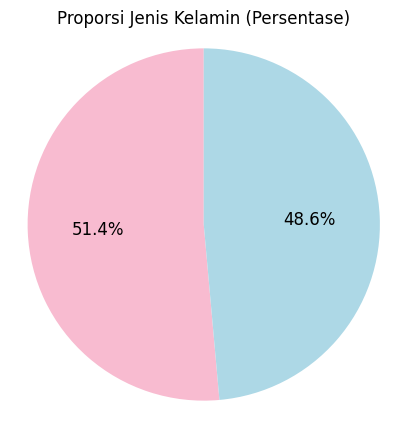

In [220]:
g = dfclean['gender'].astype('string').str.strip().str.lower()
to_L = {'l','laki-laki','male','pria','m'}
to_P = {'p','perempuan','female','wanita','f'}
g_lp = g.map(lambda x: 'L' if x in to_L else ('P' if x in to_P else pd.NA))

counts = g_lp.dropna().value_counts().reindex(['P','L'], fill_value=0)
total = counts.sum()
perc = (counts / total * 100) if total else pd.Series([0,0], index=['P','L'])

fig, ax = plt.subplots(figsize=(5,5))
colors = ['#F8BBD0',
          '#ADD8E6']

wedges, texts, autotexts = ax.pie(
    perc.values,
    labels=None,
    autopct=lambda p: f'{p:.1f}%',
    startangle=90,
    colors=colors,
    textprops={'fontsize': 12}
)
ax.axis('equal')  # pie circle

plt.title('Proporsi Jenis Kelamin (Persentase)', fontsize=12)
plt.show()


### Persebaran demografi usia (`age_bin`) dan jumlah gender per `age_bin`

In [221]:
if pd.api.types.is_categorical_dtype(dfclean['age_bin']):
    age_order = list(dfclean['age_bin'].cat.categories)
else:
    age_order = ['0–17','18–24','25–34','35–44','45–54','55–64','65+']

age_counts = (
    dfclean['age_bin']
      .value_counts(dropna=False)
      .reindex(age_order, fill_value=0)
      .rename('count')
      .to_frame()
)

missing_age = int(dfclean['age_bin'].isna().sum())
print("Missing age_bin (NA):", missing_age)

g = dfclean['gender'].astype('string').str.strip().str.lower()
to_L = {'l','laki-laki','male','pria','m'}
to_P = {'p','perempuan','female','wanita','f'}
g_lp = g.map(lambda x: 'L' if x in to_L else ('P' if x in to_P else np.nan))

gender_age_counts = (
    pd.crosstab(dfclean['age_bin'], g_lp)
      .reindex(index=age_order, fill_value=0)
)

for col in ['L','P']:
    if col not in gender_age_counts.columns:
        gender_age_counts[col] = 0
gender_age_counts = gender_age_counts[['L','P']]

print("\nRAW COUNT - Distribusi age_bin:")
display(age_counts)

print("\nRAW COUNT - Gender per age_bin (L/P):")
display(gender_age_counts)


Missing age_bin (NA): 177

RAW COUNT - Distribusi age_bin:


/tmp/ipython-input-1567487605.py:6: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(dfclean['age_bin']):


,count
age_bin,
<18,134
18–24,1347
25–34,1986
35–44,2117
45–54,2058
55–64,742
65+,0



RAW COUNT - Gender per age_bin (L/P):


gender,L,P
age_bin,,
<18,73,61
18–24,654,693
25–34,984,1002
35–44,1000,1117
45–54,986,1072
55–64,376,366
65+,0,0


In [222]:
for c in ['L','P']:
    if c not in gender_age_counts.columns:
        gender_age_counts[c] = 0

den = gender_age_counts[['L','P']].sum(axis=1).replace(0, np.nan)
gender_pct_in_bin = (
    gender_age_counts[['L','P']].div(den, axis=0).mul(100).round(2)
)

gender_pct_in_bin


gender,L,P
age_bin,,
<18,54.48,45.52
18–24,48.55,51.45
25–34,49.55,50.45
35–44,47.24,52.76
45–54,47.91,52.09
55–64,50.67,49.33
65+,NaN,NaN


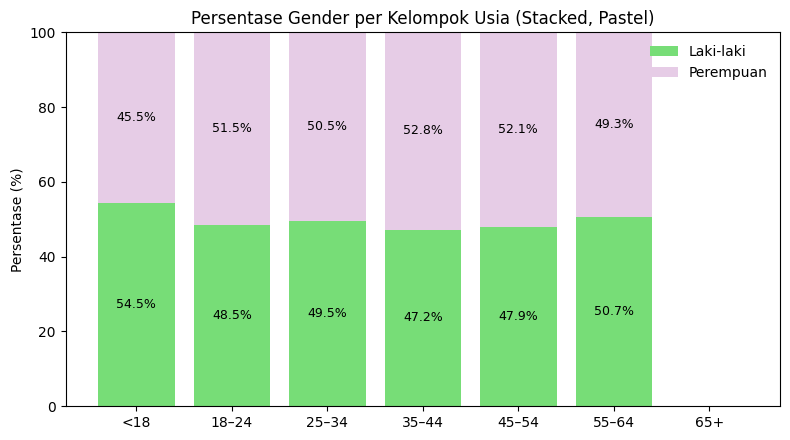

In [223]:
try:
    df_pct = gender_pct_in_bin[['L','P']].copy()
except NameError:
    try:
        den = gender_age_counts[['L','P']].sum(axis=1).replace(0, np.nan)
        df_pct = gender_age_counts[['L','P']].div(den, axis=0).mul(100)
    except NameError:
        g = dfclean['gender'].astype('string').str.strip().str.lower()
        to_L = {'l','laki-laki','male','pria','m'}
        to_P = {'p','perempuan','female','wanita','f'}
        g_lp = g.map(lambda x: 'L' if x in to_L else ('P' if x in to_P else np.nan))
        mask = dfclean['age_bin'].notna() & g_lp.notna()
        ct = pd.crosstab(dfclean.loc[mask,'age_bin'], g_lp.loc[mask])
        for c in ['L','P']:
            if c not in ct.columns: ct[c] = 0
        den = ct.sum(axis=1).replace(0, np.nan)
        df_pct = ct[['L','P']].div(den, axis=0).mul(100)

df_pct = df_pct.fillna(0)

labels = df_pct.index.astype(str).tolist()
x = np.arange(len(labels))
L_vals = df_pct['L'].values
P_vals = df_pct['P'].values

fig, ax = plt.subplots(figsize=(8,4.5))

color_L = '#77DD77'
color_P = '#E6CCE6'

bars_L = ax.bar(x, L_vals, label='Laki-laki', color=color_L)
bars_P = ax.bar(x, P_vals, bottom=L_vals, label='Perempuan', color=color_P)

ax.set_ylabel('Persentase (%)')
ax.set_title('Persentase Gender per Kelompok Usia (Stacked, Pastel)')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylim(0, 100)
ax.legend(frameon=False)

for i, (l, p) in enumerate(zip(L_vals, P_vals)):
    if l > 0:
        ax.annotate(f'{l:.1f}%', xy=(i, l/2),
                    ha='center', va='center', fontsize=9, color='black')
    if p > 0:
        ax.annotate(f'{p:.1f}%', xy=(i, l + p/2),
                    ha='center', va='center', fontsize=9, color='black')

fig.tight_layout()
plt.show()


### Persebaran Domisili Pelanggan

In [224]:
BAD_TOKENS = {"unknown","na","n/a","none","null","-",""}
kota_raw = dfclean['kota'].astype('string').str.strip()
kota_norm = kota_raw.mask(kota_raw.str.lower().isin(BAD_TOKENS), 'Unknown')

id_str = dfclean['id_pelanggan'].astype('string').str.strip()
valid_id = id_str.notna() & id_str.ne('') & id_str.str.lower().ne('unknown')

customers_by_city = (
    dfclean.loc[valid_id]
           .assign(kota=kota_norm[valid_id])
           .groupby('kota', dropna=False)['id_pelanggan']
           .nunique()
           .sort_values(ascending=False)
           .rename('total_pelanggan')
           .reset_index()
)

customers_by_city.head(20)


,kota,total_pelanggan
0,Semarang,1033
1,Makassar,1008
2,Denpasar,1004
3,Balikpapan,984
4,Surabaya,978
5,Malang,977


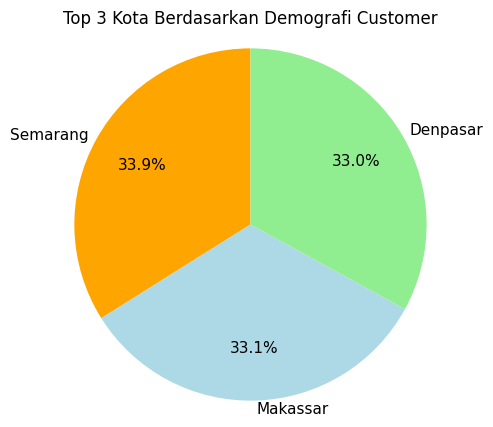

In [225]:
top3 = customers_by_city.head(3)

if top3.empty:
    print("Tidak ada data pelanggan valid untuk ditampilkan.")
else:
    colors = ['#FFA500', '#ADD8E6', '#90EE90'][:len(top3)]

    fig, ax = plt.subplots(figsize=(5,5))
    ax.pie(
        top3['total_pelanggan'].values,
        labels=top3['kota'].astype(str).tolist(),
        autopct=lambda p: f'{p:.1f}%',
        startangle=90,
        colors=colors,
        pctdistance=0.7,
        labeldistance=1.05,
        textprops={'fontsize': 11}
    )
    ax.axis('equal')
    plt.title('Top 3 Kota Berdasarkan Demografi Customer', fontsize=12)
    plt.show()



### Persebaran Transaksi Terbanyak Berdasarkan `Kota`

In [226]:
transactions_by_city = (
    pd.DataFrame({'kota': kota_norm})
      .value_counts()
      .rename('rows')
      .reset_index()
      .sort_values('rows', ascending=False)
)
transactions_by_city.head(20)


,kota,rows
0,Semarang,1474
1,Makassar,1462
2,Denpasar,1437
3,Balikpapan,1435
4,Malang,1408
5,Surabaya,1343
6,Unknown,2


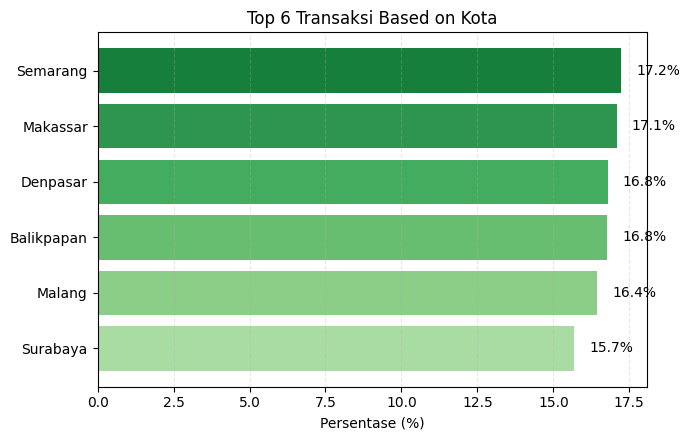

In [227]:
top6 = transactions_by_city.head(6).copy()

total_all = transactions_by_city['rows'].sum()
top6['percent'] = (top6['rows'] / (total_all if total_all else 1) * 100).round(2)

colors = plt.cm.Greens(np.linspace(0.8, 0.35, len(top6)))

fig, ax = plt.subplots(figsize=(7,4.5))
ax.barh(top6['kota'].astype(str), top6['percent'], color=colors)
ax.invert_yaxis()

ax.set_xlabel('Persentase (%)')
ax.set_title('Top 6 Transaksi Based on Kota')
ax.grid(axis='x', linestyle='--', alpha=0.3)

for i, (val) in enumerate(top6['percent'].values):
    ax.text(val + 0.5, i, f'{val:.1f}%', va='center', fontsize=10)

fig.tight_layout()
plt.show()


### **[Analisis Kualitas & Kesehatan Bisnis]**

### Persentase Komplain Toko

In [228]:
import re

norm = {col: re.sub(r'[^a-z]', '', str(col).lower()) for col in dfclean.columns}
targets = {'komplain','komplaintoko','complaint','iscomplain','complainflag'}
comp_col = next((col for col, key in norm.items() if key in targets), None)
if comp_col is None:
    raise KeyError(f"Tidak menemukan kolom komplain. Kolom tersedia: {list(dfclean.columns)}")

print("Kolom komplain terdeteksi:", comp_col)

s = dfclean[comp_col].astype('string').str.strip().str.lower()
yes_tokens = {'yes','y','ya','1','true'}
no_tokens  = {'no','n','tidak','0','false'}
mapped = s.map(lambda x: 'yes' if x in yes_tokens else ('no' if x in no_tokens else pd.NA))

yr = pd.to_datetime(dfclean['tanggal_bon'], errors='coerce').dt.year
years = [2022, 2023, 2024, 2025]
mask = yr.isin(years) & mapped.notna()

ct = (pd.crosstab(yr[mask], mapped[mask])
        .reindex(index=years, fill_value=0)
        .reindex(columns=['yes','no'], fill_value=0))
ct.index.name = 'tahun'
ct.columns = ['complain_yes','complain_no']

den = ct.sum(axis=1).replace(0, np.nan)
pct = (ct.div(den, axis=0) * 100).round(2)
pct.columns = ['pct_yes','pct_no']

complaint_yearly = ct.join(pct)

complaint_yearly


Kolom komplain terdeteksi: Komplain


,complain_yes,complain_no,pct_yes,pct_no
tahun,,,,
2022,551,2000,21.60,78.40
2023,471,1949,19.46,80.54
2024,478,1942,19.75,80.25
2025,246,924,21.03,78.97


In [229]:
df_pct = (complaint_yearly[['pct_yes','pct_no']]
          .reindex([2022, 2023, 2024, 2025])
          .fillna(0))

x = np.arange(len(df_pct))
w = 0.6

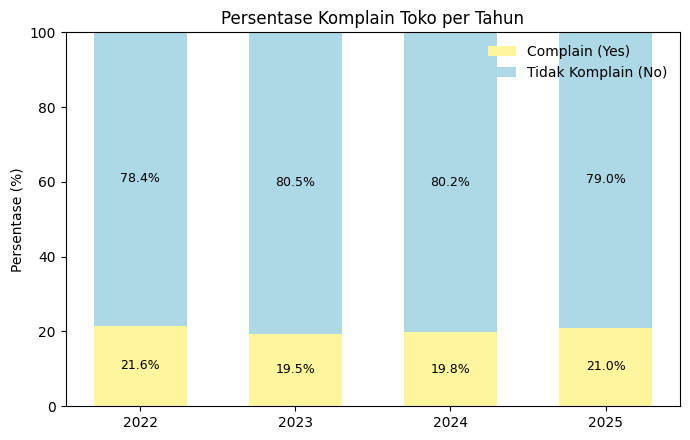

In [230]:
fig, ax = plt.subplots(figsize=(7,4.5))

color_yes = '#FFF59D'
color_no  = '#ADD8E6'

bars_yes = ax.bar(x, df_pct['pct_yes'].values, w, label='Complain (Yes)', color=color_yes)
bars_no  = ax.bar(x, df_pct['pct_no'].values, w, bottom=df_pct['pct_yes'].values,
                  label='Tidak Komplain (No)', color=color_no)

ax.set_ylim(0, 100)
ax.set_xticks(x)
ax.set_xticklabels(df_pct.index.astype(str))
ax.set_ylabel('Persentase (%)')
ax.set_title('Persentase Komplain Toko per Tahun')
ax.legend(frameon=False)

for i, (y, n) in enumerate(zip(df_pct['pct_yes'].values, df_pct['pct_no'].values)):
    if y > 0:
        ax.text(i, y/2, f'{y:.1f}%', ha='center', va='center', fontsize=9, color='black')
    if n > 0:
        ax.text(i, y + n/2, f'{n:.1f}%', ha='center', va='center', fontsize=9, color='black')

fig.tight_layout()
plt.show()



 ## Proporsi Rating(1-5) setiap tahunnya

In [231]:
yr = pd.to_datetime(dfclean['tanggal_bon'], errors='coerce').dt.year
r  = pd.to_numeric(dfclean['rating'], errors='coerce')

years = [2022, 2023, 2024, 2025]
mask = yr.isin(years) & r.between(1, 5, inclusive="both")


ratings_per_year_count = (
    pd.crosstab(yr[mask], r[mask])
      .reindex(index=years, fill_value=0)
      .reindex(columns=[1,2,3,4,5], fill_value=0)
      .astype('int64')
)
ratings_per_year_count.index.name = 'tahun'
ratings_per_year_count.columns.name = 'rating'


ratings_per_year_count

rating,1,2,3,4,5
tahun,,,,,
2022,551,483,519,505,493
2023,471,485,477,480,507
2024,478,456,495,519,472
2025,246,241,218,222,243


In [232]:
row_tot = ratings_per_year_count.sum(axis=1).replace(0, np.nan)
ratings_per_year_pct = (ratings_per_year_count.div(row_tot, axis=0) * 100).round(2)

ratings_per_year_pct

rating,1,2,3,4,5
tahun,,,,,
2022,21.60,18.93,20.34,19.80,19.33
2023,19.46,20.04,19.71,19.83,20.95
2024,19.75,18.84,20.45,21.45,19.50
2025,21.03,20.60,18.63,18.97,20.77


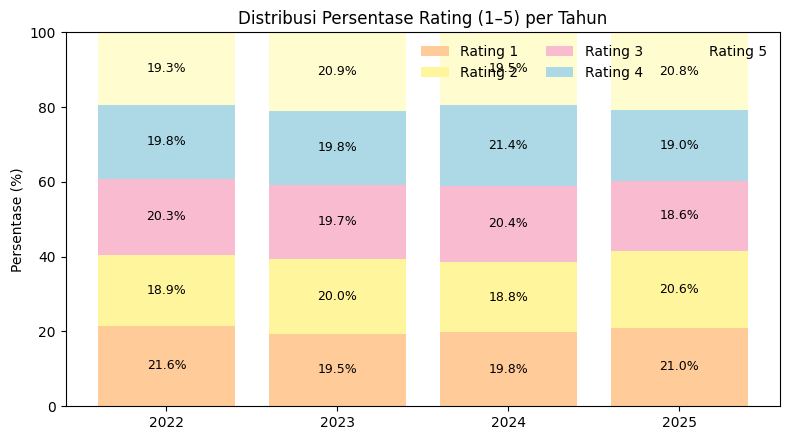

In [404]:

try:
    df_pct = ratings_per_year_pct.copy()
except NameError:
    yr = pd.to_datetime(dfclean['tanggal_bon'], errors='coerce').dt.year
    r  = pd.to_numeric(dfclean['rating'], errors='coerce')
    years = [2022, 2023, 2024, 2025]
    mask = yr.isin(years) & r.between(1,5, inclusive="both")
    cnt = (pd.crosstab(yr[mask], r[mask])
             .reindex(index=years, fill_value=0)
             .reindex(columns=[1,2,3,4,5], fill_value=0))
    row_tot = cnt.sum(axis=1).replace(0, np.nan)
    df_pct = (cnt.div(row_tot, axis=0) * 100).round(2)

cols = [1,2,3,4,5]
df_pct = df_pct.reindex(columns=cols, fill_value=0).fillna(0)


colors = ['#FFCC99',
          '#FFF59D',
          '#F8BBD0',
          '#ADD8E6',
          '#FFFDD0']

x = np.arange(len(df_pct.index))
fig, ax = plt.subplots(figsize=(8,4.5))

bottom = np.zeros(len(df_pct))
for i, c in enumerate(cols):
    vals = df_pct[c].values
    bars = ax.bar(x, vals, bottom=bottom, label=f'Rating {c}', color=colors[i])
    for j, h in enumerate(vals):
        if h >= 5:
            ax.text(j, bottom[j] + h/2, f'{h:.1f}%',
                    ha='center', va='center', fontsize=9)
    bottom += vals

ax.set_ylim(0, 100)
ax.set_xticks(x)
ax.set_xticklabels(df_pct.index.astype(str))
ax.set_ylabel('Persentase (%)')
ax.set_title('Distribusi Persentase Rating (1–5) per Tahun')
ax.legend(ncol=3, frameon=False)
fig.tight_layout()
plt.show()


### Jumlah Total Merek Barang yang Dijual



In [234]:
BAD_TOKENS = {"unknown","na","n/a","none","null","-",""}
s = dfclean['merek_barang'].astype('string').str.strip()

valid = s.notna() & s.ne('') & ~s.str.lower().isin(BAD_TOKENS)
total_merek = s[valid].str.casefold().nunique()

print("Total merek (valid):", total_merek)




Total merek (valid): 54


In [235]:
try:
    top10_brands = counts_by_brand.sort_values('rows', ascending=False).head(10)
except NameError:
    BAD_TOKENS = {"unknown","na","n/a","none","null","-",""}
    s = dfclean['merek_barang'].astype('string').str.strip()
    valid = s.notna() & s.ne('') & ~s.str.lower().isin(BAD_TOKENS)
    brand_norm = s[valid].str.title()
    counts_by_brand = (
        brand_norm.value_counts()
                  .rename_axis('merek_barang')
                  .reset_index(name='rows')
                  .sort_values('rows', ascending=False)
    )
    top10_brands = counts_by_brand.head(10)

print("Top 10 Brand Based on Transaction:")
top10_brands

Top 10 Brand Based on Transaction:


,merek_barang,rows
0,Samsung,634
1,Hp,492
2,Brother,353
3,Xerox,349
4,Canon,339
5,Ricoh,336
6,Epson,333
7,Panasonic,318
8,Kyocera,313
9,Lexmark,297


## **B. Analisis Kinerja Produk & Keuangan**

Tujuan dari segmen ini adalah untuk mengidenitifkasi produk, merek, dan kategori yang paling menguntungkan serta mengukur kinerjanya

### Analisis Profitibilitas

* Produk (berdasarkan id_produk, jenis_barang, dan merek_barang) dengan profit  tertinggi secara keseluruhan

disini, kita memastikan apakah kolomnya sudah numerik atau belum.

In [236]:
price = pd.to_numeric(dfclean['harga_satuan'], errors='coerce')
cost  = pd.to_numeric(dfclean['modal'], errors='coerce')
qty   = pd.to_numeric(dfclean['jumlah_terjual'], errors='coerce')
disc  = pd.to_numeric(dfclean.get('diskon', 0), errors='coerce').fillna(0)

In [237]:
BAD_TOKENS = {"unknown","na","n/a","none","null","-",""}
id_prod = dfclean['id_produk'].astype('string').str.strip()
jenis   = dfclean['jenis_barang'].astype('string').str.strip()
merek   = dfclean['merek_barang'].astype('string').str.strip()

valid_prod = (
    id_prod.notna() & id_prod.ne('') & ~id_prod.str.lower().isin(BAD_TOKENS) &
    jenis.notna()   & jenis.ne('')   & ~jenis.str.lower().isin(BAD_TOKENS) &
    merek.notna()   & merek.ne('')   & ~merek.str.lower().isin(BAD_TOKENS)
)

In [238]:
dfp = dfclean.loc[valid_prod].copy()
dfp['harga_num']  = price[valid_prod]
dfp['qty_num']    = qty[valid_prod]
dfp['profit_num'] = pd.to_numeric(dfp['profit'], errors='coerce')

dfp['rev_line'] = dfp['harga_num'] * dfp['qty_num'] * (1 - disc[valid_prod]/100)

In [239]:
agg = (
    dfp.groupby(['id_produk','jenis_barang','merek_barang'], dropna=False)
       .agg(total_profit=('profit_num','sum'),
            total_revenue=('rev_line','sum'),
            total_qty=('qty_num','sum'))
       .reset_index()
)

agg['margin_pct'] = (agg['total_profit'] / agg['total_revenue']).replace([np.inf,-np.inf], np.nan)

In [243]:
top3 = agg.sort_values('total_profit', ascending=False).head(3).copy()
top3['margin_pct'] = (top3['margin_pct'] * 100).round(2)

top3

,id_produk,jenis_barang,merek_barang,total_profit,total_revenue,total_qty,margin_pct
47,PRD00048,Laptop,Lenovo,13555378276.0,45562262500.0,2564,29.75
48,PRD00049,Laptop,Dell,11363972060.0,31495875000.0,3010,36.08
73,PRD00074,PC Rakitan,MJ020,10573035315.0,25810750000.0,1307,40.96


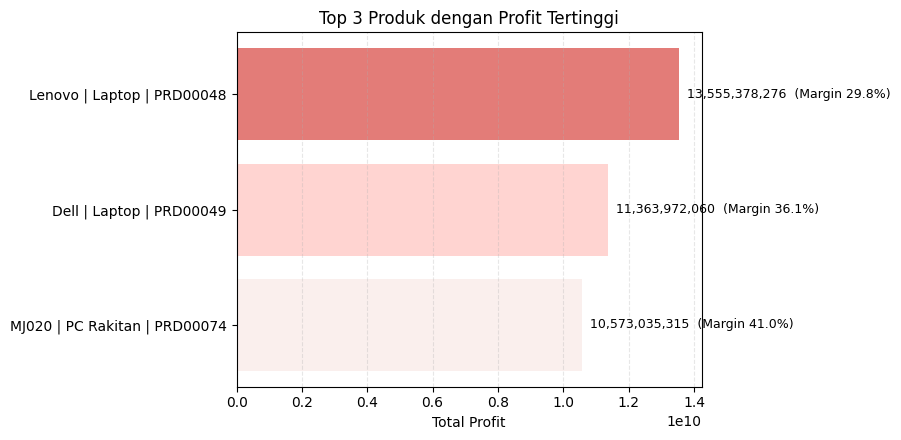

In [249]:
try:
    top3_plot = top3.copy()
except NameError:
    price = pd.to_numeric(dfclean['harga_satuan'], errors='coerce')
    cost  = pd.to_numeric(dfclean['modal'], errors='coerce')
    qty   = pd.to_numeric(dfclean['jumlah_terjual'], errors='coerce')
    disc  = pd.to_numeric(dfclean.get('diskon', 0), errors='coerce').fillna(0)

    if 'profit' not in dfclean.columns:
        dfclean['profit'] = (price - cost) * qty

    BAD_TOKENS = {"unknown","na","n/a","none","null","-",""}
    id_prod = dfclean['id_produk'].astype('string').str.strip()
    jenis   = dfclean['jenis_barang'].astype('string').str.strip()
    merek   = dfclean['merek_barang'].astype('string').str.strip()
    valid_prod = (
        id_prod.notna() & id_prod.ne('') & ~id_prod.str.lower().isin(BAD_TOKENS) &
        jenis.notna()   & jenis.ne('')   & ~jenis.str.lower().isin(BAD_TOKENS) &
        merek.notna()   & merek.ne('')   & ~merek.str.lower().isin(BAD_TOKENS)
    )
    dfx = dfclean.loc[valid_prod].copy()
    dfx['profit_num'] = pd.to_numeric(dfx['profit'], errors='coerce')
    dfx['rev_line']   = pd.to_numeric(dfclean['harga_satuan'], errors='coerce')[valid_prod] \
                        * pd.to_numeric(dfclean['jumlah_terjual'], errors='coerce')[valid_prod] \
                        * (1 - disc[valid_prod]/100)

    agg = (dfx.groupby(['id_produk','jenis_barang','merek_barang'], dropna=False)
              .agg(total_profit=('profit_num','sum'),
                   total_revenue=('rev_line','sum'),
                   total_qty=('jumlah_terjual','sum'))
              .reset_index())
    agg['margin_pct'] = (agg['total_profit'] / agg['total_revenue']).replace([np.inf,-np.inf], np.nan)
    top3_plot = agg.sort_values('total_profit', ascending=False).head(3).copy()
    top3_plot['margin_pct'] = (top3_plot['margin_pct'] * 100).round(2)


labels = (top3_plot['merek_barang'].astype(str) + " | "
          + top3_plot['jenis_barang'].astype(str) + " | "
          + top3_plot['id_produk'].astype(str)).tolist()

profits = top3_plot['total_profit'].values

hex_colors = ['#E37C78', '#FFD4D1', '#FAEFED', '#82BAC4']
colors = hex_colors[:len(profits)]

fig, ax = plt.subplots(figsize=(9, 4.5))
bars = ax.barh(labels, profits, color=colors)

ax.invert_yaxis()

ax.set_xlabel('Total Profit')
ax.set_title('Top 3 Produk dengan Profit Tertinggi')

ax.grid(axis='x', linestyle='--', alpha=0.3)
for i, (rect, profit, margin) in enumerate(zip(bars, profits, top3_plot.get('margin_pct', pd.Series([np.nan]*len(profits))))):
    ax.text(profit, rect.get_y() + rect.get_height()/2,
            f"  {profit:,.0f}" + (f"  (Margin {margin:.1f}%)" if pd.notna(margin) else ""),
            va='center', ha='left', fontsize=9)

fig.tight_layout()
plt.show()


### Analisis Penjualan & Diskon

**Produk (berdasarkan `id_produk`, `jenis_barang`, dan `merek_barang`) dengan penjualan terbanyak**

In [245]:
BAD_TOKENS = {"unknown","na","n/a","none","null","-",""}
idp   = dfclean['id_produk'].astype('string').str.strip()
jenis = dfclean['jenis_barang'].astype('string').str.strip()
merek = dfclean['merek_barang'].astype('string').str.strip()

In [246]:
valid_prod = (
    idp.notna() & idp.ne('') & ~idp.str.lower().isin(BAD_TOKENS) &
    jenis.notna() & jenis.ne('') & ~jenis.str.lower().isin(BAD_TOKENS) &
    merek.notna() & merek.ne('') & ~merek.str.lower().isin(BAD_TOKENS)
)

dfx = dfclean.loc[valid_prod].copy()

In [247]:
dfx['qty_num']   = pd.to_numeric(dfx['jumlah_terjual'], errors='coerce')
dfx['price_num'] = pd.to_numeric(dfx['harga_satuan'], errors='coerce')
dfx['disc_num']  = pd.to_numeric(dfx.get('diskon', 0), errors='coerce').fillna(0)
dfx['rev_line']  = dfx['qty_num'] * dfx['price_num'] * (1 - dfx['disc_num']/100)


setelah itu melakukan agregrasi per produk (`id_produk` x `jenis_barang` x `merek_barang`)

In [248]:
grp_cols = ['id_produk','jenis_barang','merek_barang']
agg = (dfx.groupby(grp_cols, dropna=False)
          .agg(total_qty=('qty_num','sum'),
               total_revenue=('rev_line','sum'),
               transaksi=('no_bon','nunique') if 'no_bon' in dfx.columns else ('qty_num','count'))
          .reset_index())

In [250]:
total_qty_all = agg['total_qty'].sum()
agg['qty_share_pct'] = (agg['total_qty'] / (total_qty_all if total_qty_all else 1) * 100).round(2)

agg['avg_price_realized'] = (agg['total_revenue'] / agg['total_qty']).replace([np.inf, -np.inf], np.nan).round(2)

In [251]:
top3_qty = agg.sort_values('total_qty', ascending=False).head(3).reset_index(drop=True)

print("TOP 3 Produk dengan Penjualan (unit) Terbanyak:")
top3_qty

TOP 3 Produk dengan Penjualan (unit) Terbanyak:


,id_produk,jenis_barang,merek_barang,total_qty,total_revenue,transaksi,qty_share_pct,avg_price_realized
0,PRD00028,Printer,HP,4782,11899020000.0,201,2.42,2488293.6
1,PRD00015,Monitor,ViewSonic,4552,7968870000.0,193,2.30,1750630.49
2,PRD00006,Monitor,LG,4508,7549555000.0,177,2.28,1674701.64


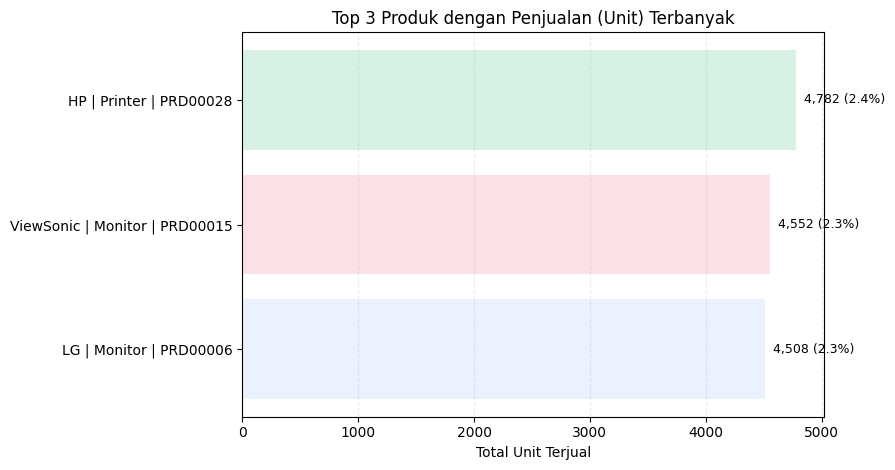

In [322]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


if 'top3_qty' not in globals():
    raise NameError("Variabel 'top3_qty' belum ada. Jalankan analisis penjualan terbanyak dulu.")

top3_plot = top3_qty.copy()


labels = (top3_plot['merek_barang'].astype(str) + " | "
          + top3_plot['jenis_barang'].astype(str) + " | "
          + top3_plot['id_produk'].astype(str)).tolist()
vals = top3_plot['total_qty'].values


pastel_colors = ['#D7F2E3',
                 '#FBE1E4',
                 '#EAF2FF',
                 '#FFF5D9']
colors = pastel_colors[:len(vals)]

fig, ax = plt.subplots(figsize=(9, 4.8))
bars = ax.barh(labels, vals, color=colors)


ax.invert_yaxis()
ax.set_xlabel('Total Unit Terjual')
ax.set_title('Top 3 Produk dengan Penjualan (Unit) Terbanyak')
ax.grid(axis='x', linestyle='--', alpha=0.25)

has_share = 'qty_share_pct' in top3_plot.columns
for rect, qty, *rest in zip(bars, vals, *([top3_plot['qty_share_pct'].values] if has_share else [])):
    y = rect.get_y() + rect.get_height()/2
    if has_share:
        share = rest[0]
        ax.text(qty, y, f"  {qty:,.0f} ({share:.1f}%)", va='center', ha='left', fontsize=9)
    else:
        ax.text(qty, y, f"  {qty:,.0f}", va='center', ha='left', fontsize=9)

fig.tight_layout()
plt.show()



**3 produk yang paling sering dan paling jarang diberi diskon**

In [254]:
BAD_TOKENS = {"unknown","na","n/a","none","null","-",""}
idp   = dfclean['id_produk'].astype('string').str.strip()
jenis = dfclean['jenis_barang'].astype('string').str.strip()
merek = dfclean['merek_barang'].astype('string').str.strip()

In [256]:
valid_prod = (
    idp.notna() & idp.ne('') & ~idp.str.lower().isin(BAD_TOKENS) &
    jenis.notna() & jenis.ne('') & ~jenis.str.lower().isin(BAD_TOKENS) &
    merek.notna() & merek.ne('') & ~merek.str.lower().isin(BAD_TOKENS)
)

dfx = dfclean.loc[valid_prod, ['id_produk','jenis_barang','merek_barang','diskon']].copy()

In [258]:
dfx['diskon_num'] = pd.to_numeric(dfx['diskon'], errors='coerce').fillna(0)
dfx['disc_given'] = (dfx['diskon_num'] > 0).astype(int)

grp_cols = ['id_produk','jenis_barang','merek_barang']

agg = (dfx.groupby(grp_cols, dropna=False)
          .agg(total_tx=('disc_given','size'),
               disc_tx =('disc_given','sum'))
          .reset_index())
agg['disc_rate'] = agg['disc_tx'] / agg['total_tx']

In [259]:
avg_given = (dfx.loc[dfx['disc_given'] == 1]
               .groupby(grp_cols)['diskon_num']
               .mean()
               .rename('avg_discount_given_pct')
               .reset_index())
agg = agg.merge(avg_given, on=grp_cols, how='left')

In [260]:
def pick_with_min_tx(df, sort_cols, ascending, min_tx=10):
    pool = df[df['total_tx'] >= min_tx]
    if len(pool) < 3:
        pool = df[df['total_tx'] >= 5]
    if len(pool) < 3:
        pool = df
    return (pool.sort_values(sort_cols, ascending=ascending)
                .head(3)
                .reset_index(drop=True))

In [261]:
top3_most_discounted = pick_with_min_tx(
    agg,
    sort_cols=['disc_rate','disc_tx','total_tx'],
    ascending=[False, False, False]
)

top3_least_discounted = pick_with_min_tx(
    agg,
    sort_cols=['disc_rate','total_tx'],
    ascending=[True, False]
)

In [262]:
for df in (top3_most_discounted, top3_least_discounted):
    df['disc_rate_pct'] = (df['disc_rate'] * 100).round(2)
    df['avg_discount_given_pct'] = df['avg_discount_given_pct'].round(2)

# Hasil:
print("TOP 3 Produk PALING SERING diberi diskon (berdasarkan proporsi transaksi didiskon):")
display(top3_most_discounted[['id_produk','jenis_barang','merek_barang',
                              'total_tx','disc_tx','disc_rate_pct','avg_discount_given_pct']])

print("\nTOP 3 Produk PALING JARANG diberi diskon:")
display(top3_least_discounted[['id_produk','jenis_barang','merek_barang',
                               'total_tx','disc_tx','disc_rate_pct','avg_discount_given_pct']])

TOP 3 Produk PALING SERING diberi diskon (berdasarkan proporsi transaksi didiskon):


,id_produk,jenis_barang,merek_barang,total_tx,disc_tx,disc_rate_pct,avg_discount_given_pct
0,PRD00056,PC Rakitan,MJ002,57,50,87.72,11.50
1,PRD00043,Speaker,Simbadda,54,46,85.19,11.63
2,PRD00045,Laptop,Acer,105,89,84.76,10.79



TOP 3 Produk PALING JARANG diberi diskon:


,id_produk,jenis_barang,merek_barang,total_tx,disc_tx,disc_rate_pct,avg_discount_given_pct
0,PRD00066,PC Rakitan,MJ012,47,32,68.09,13.28
1,PRD00050,Laptop,MSI,101,69,68.32,11.30
2,PRD00074,PC Rakitan,MJ020,62,43,69.35,11.40


**Kategori diskon rendah menghasilkan profit yang lebih tinggi**

Pertama kita membuat agregrat per kategori diskon (margin%, profit/unit, dst)

In [267]:
price = pd.to_numeric(dfclean['harga_satuan'], errors='coerce')
cost  = pd.to_numeric(dfclean['modal'], errors='coerce')
qty   = pd.to_numeric(dfclean['jumlah_terjual'], errors='coerce')
disc  = pd.to_numeric(dfclean.get('diskon', 0), errors='coerce').fillna(0)


In [268]:
if 'profit' not in dfclean.columns:
    dfclean['profit'] = (price - cost) * qty

if 'Total_penjualan' not in dfclean.columns:
    dfclean['Total_penjualan'] = price * qty * (1 - disc/100.0)

In [ ]:
if 'kategori_diskon' not in dfclean.columns:
    d = pd.to_numeric(dfclean['diskon'], errors='coerce')
    conds   = [d.eq(0), (d>0)&(d<=5), (d>5)&(d<=15), d>15]
    labels  = ['Tidak Ada','Rendah','Sedang','Tinggi']
    dfclean['kategori_diskon'] = pd.Series(np.select(conds, labels, default=np.nan), dtype='string')

valid_cats = ['Tidak Ada','Rendah','Sedang','Tinggi']
mask_cat   = dfclean['kategori_diskon'].isin(valid_cats)

In [270]:
agg_cat = (
    dfclean.loc[mask_cat]
           .groupby('kategori_diskon', as_index=True)
           .agg(
               revenue=('Total_penjualan','sum'),
               profit =('profit','sum'),
               orders =('no_bon','nunique') if 'no_bon' in dfclean.columns else ('profit','count'),
               qty    =('jumlah_terjual','sum')
           )
           .reindex(valid_cats))

/tmp/ipython-input-833040927.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('kategori_diskon', as_index=True)


In [271]:
agg_cat['margin_pct']       = agg_cat['profit'] / agg_cat['revenue']
agg_cat['profit_per_order'] = agg_cat['profit'] / agg_cat['orders'].replace(0, np.nan)
agg_cat['profit_per_unit']  = agg_cat['profit'] / agg_cat['qty'].replace(0, np.nan)

In [272]:
agg_cat_view = agg_cat.assign(
    margin_pct       =(agg_cat['margin_pct']*100).round(2),
    profit_per_order = agg_cat['profit_per_order'].round(2),
    profit_per_unit  = agg_cat['profit_per_unit'].round(2))

agg_cat_view

,revenue,profit,orders,qty,margin_pct,profit_per_order,profit_per_unit
kategori_diskon,,,,,,,
Tidak Ada,203222550000.0,44594964590.0,1977,40625,21.94,22556886.49,1097722.21
Rendah,180895817500.0,41757582772.0,1912,38900,23.08,21839739.94,1073459.71
Sedang,358065242500.0,87819703411.0,3912,79862,24.53,22448799.44,1099643.18
Tinggi,114723600000.0,31853950827.0,578,38339,27.77,55110641.57,830849.81


Lalu, masuk ke tabel within-product, guna membandingkan margin "rendah" vs "Sedang/Tinggi" pada produk yang samaa

In [275]:
BAD_TOKENS = {"unknown","na","n/a","none","null","-",""}

def ok_text(s: pd.Series) -> pd.Series:
    s = s.astype('string').str.strip()
    return s.notna() & s.ne('') & ~s.str.casefold().isin(BAD_TOKENS)

valid_cats = ['Tidak Ada','Rendah','Sedang','Tinggi']
mask_cat   = dfclean['kategori_diskon'].isin(valid_cats)

valid_prod = ok_text(dfclean['id_produk']) & ok_text(dfclean['jenis_barang']) & ok_text(dfclean['merek_barang'])
prod_cols  = ['id_produk','jenis_barang','merek_barang']

dfp = dfclean.loc[mask_cat & valid_prod, prod_cols + ['kategori_diskon','profit','Total_penjualan']].copy()


In [276]:
g = (
    dfp.groupby(prod_cols + ['kategori_diskon'], dropna=False)
       .agg(profit=('profit','sum'), revenue=('Total_penjualan','sum'))
       .reset_index())

g['margin_pct'] = g['profit'] / g['revenue']

pv = (
    g.pivot_table(index=prod_cols, columns='kategori_diskon', values='margin_pct', aggfunc='mean')
     .reindex(columns=valid_cats))

/tmp/ipython-input-3973688191.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dfp.groupby(prod_cols + ['kategori_diskon'], dropna=False)
/tmp/ipython-input-3973688191.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  g.pivot_table(index=prod_cols, columns='kategori_diskon', values='margin_pct', aggfunc='mean')


In [277]:
pv['diff_R_vs_Sedang'] = pv['Rendah'] - pv['Sedang']
pv['diff_R_vs_Tinggi'] = pv['Rendah'] - pv['Tinggi']

paired_S = pv['diff_R_vs_Sedang'].dropna()
paired_T = pv['diff_R_vs_Tinggi'].dropna()


In [278]:
summary_within = pd.DataFrame({
    'pair_R_vs_Sedang_products'    : [len(paired_S)],
    'median_diff_R_vs_Sedang_pctpt': [(paired_S.median()*100).round(2) if len(paired_S)>0 else np.nan],
    'share_R_higher_than_Sedang'   : [ (paired_S > 0).mean().round(2) if len(paired_S)>0 else np.nan ],
    'pair_R_vs_Tinggi_products'    : [len(paired_T)],
    'median_diff_R_vs_Tinggi_pctpt': [(paired_T.median()*100).round(2) if len(paired_T)>0 else np.nan],
    'share_R_higher_than_Tinggi'   : [ (paired_T > 0).mean().round(2) if len(paired_T)>0 else np.nan ],
})

summary_within

,pair_R_vs_Sedang_products,median_diff_R_vs_Sedang_pctpt,share_R_higher_than_Sedang,pair_R_vs_Tinggi_products,median_diff_R_vs_Tinggi_pctpt,share_R_higher_than_Tinggi
0,27972,-2.07,0.0,27972,-6.37,0.0


In [407]:
def _get_margin_pct(cat):
    try:
        v = agg_cat.loc[cat, 'margin_pct']
        return float(v*100) if pd.notna(v) else np.nan
    except Exception:
        return np.nan

cats = ['Tidak Ada','Rendah','Sedang','Tinggi']
margins = {c: _get_margin_pct(c) for c in cats}

def _fmt(x):
    return 'NA' if pd.isna(x) else f"{x:.2f}"

print("=== RINGKASAN (Agregat per Kategori Diskon) ===")
for c in cats:
    print(f"- Margin {c:10s}: {_fmt(margins[c])}%")

for other in ['Sedang','Tinggi','Tidak Ada']:
    if not np.isnan(margins['Rendah']) and not np.isnan(margins[other]):
        diff = margins['Rendah'] - margins[other]
        arah = "lebih tinggi" if diff >= 0 else "lebih rendah"
        print(f"  · 'Rendah' {arah} {abs(diff):.2f} pp dibanding '{other}' (agregat).")

if 'profit_per_unit' in agg_cat_view.columns:
    print("\nCatatan: profit_per_unit & profit_per_order tersedia di 'agg_cat_view' jika ingin dikutip.")


SyntaxError: incomplete input (ipython-input-3179008966.py, line 24)

In [280]:
def _safe(df, col):
    try:
        return df.loc[0, col]
    except Exception:
        return np.nan

n_rs   = _safe(summary_within, 'pair_R_vs_Sedang_products')
med_rs = _safe(summary_within, 'median_diff_R_vs_Sedang_pctpt')
shr_rs = _safe(summary_within, 'share_R_higher_than_Sedang')
n_rt   = _safe(summary_within, 'pair_R_vs_Tinggi_products')
med_rt = _safe(summary_within, 'median_diff_R_vs_Tinggi_pctpt')
shr_rt = _safe(summary_within, 'share_R_higher_than_Tinggi')

In [281]:
print("\n=== RINGKASAN (Within-Product: bandingkan pada produk yang sama) ===")
if pd.notna(n_rs):
    print(f"- vs SEDANG : Produk dibandingkan = {int(n_rs)} | "
          f"Median keunggulan 'Rendah' = {_fmt(med_rs)} pp | "
          f"'Rendah' menang di {_fmt(shr_rs*100 if pd.notna(shr_rs) else np.nan)}% produk")
if pd.notna(n_rt):
    print(f"- vs TINGGI : Produk dibandingkan = {int(n_rt)} | "
          f"Median keunggulan 'Rendah' = {_fmt(med_rt)} pp | "
          f"'Rendah' menang di {_fmt(shr_rt*100 if pd.notna(shr_rt) else np.nan)}% produk")



=== RINGKASAN (Within-Product: bandingkan pada produk yang sama) ===
- vs SEDANG : Produk dibandingkan = 27972 | Median keunggulan 'Rendah' = -2.07 pp | 'Rendah' menang di 0.00% produk
- vs TINGGI : Produk dibandingkan = 27972 | Median keunggulan 'Rendah' = -6.37 pp | 'Rendah' menang di 0.00% produk


In [282]:
kond_agregat = (not np.isnan(margins['Rendah'])
                and not np.isnan(margins['Sedang'])
                and not np.isnan(margins['Tinggi']))
kond_within  = pd.notna(med_rs) or pd.notna(med_rt)

In [283]:
print("\n=== takeawyas ===")
if kond_agregat:
    better_vs_med = margins['Rendah'] > margins['Sedang']
    better_vs_high= margins['Rendah'] > margins['Tinggi']
    if better_vs_med and better_vs_high:
        print("- Secara agregat, kategori diskon 'Rendah' menunjukkan margin% yang lebih tinggi dibanding 'Sedang' dan 'Tinggi'.")
    else:
        print("- Secara agregat, keunggulan 'Rendah' tidak konsisten terhadap semua kategori lain.")
else:
    print("- Data agregat margin% tidak lengkap untuk semua kategori.")

if kond_within:
    note = []
    if pd.notna(med_rs):
        arah = "lebih tinggi" if med_rs >= 0 else "lebih rendah"
        note.append(f"vs Sedang: median {arah} {abs(med_rs):.2f} pp (n={int(n_rs)})")
    if pd.notna(med_rt):
        arah = "lebih tinggi" if med_rt >= 0 else "lebih rendah"
        note.append(f"vs Tinggi: median {arah} {abs(med_rt):.2f} pp (n={int(n_rt)})")
    print(f"- Pada pembandingan produk yang sama, 'Rendah' {('; ').join(note)}.")
else:
    print("- Tidak ada cukup pasangan produk untuk evaluasi within-product.")


=== takeawyas ===
- Secara agregat, keunggulan 'Rendah' tidak konsisten terhadap semua kategori lain.
- Pada pembandingan produk yang sama, 'Rendah' vs Sedang: median lebih rendah 2.07 pp (n=27972); vs Tinggi: median lebih rendah 6.37 pp (n=27972).


In [284]:
raw_palette = ['BDE0FE', 'FFC8DD', 'FFACC', 'D8F7F2', 'CDB4DB']

def normalize_hex(c):
    c = str(c).strip().lstrip('#')
    if len(c) == 3:
        c = ''.join(ch*2 for ch in c)
    elif len(c) == 5:
        c = '0' + c
    return '#' + c[:6]

PALETTE = [normalize_hex(c) for c in raw_palette]

In [298]:
def ensure_tables():
    global agg_cat, agg_cat_view, summary_within
    have_agg = 'agg_cat' in globals() and 'agg_cat_view' in globals()
    have_within = 'summary_within' in globals()
    if have_agg and have_within:
        return

    BAD = {"unknown","na","n/a","none","null","-",""}
    def ok_text(s: pd.Series) -> pd.Series:
        s = s.astype('string').str.strip()
        return s.notna() & s.ne('') & ~s.str.casefold().isin(BAD)

In [307]:
    price = pd.to_numeric(dfclean['harga_satuan'], errors='coerce')
    cost  = pd.to_numeric(dfclean['modal'], errors='coerce')
    qty   = pd.to_numeric(dfclean['jumlah_terjual'], errors='coerce')
    disc  = pd.to_numeric(dfclean.get('diskon', 0), errors='coerce').fillna(0)

    if 'profit' not in dfclean.columns:
        dfclean['profit'] = (price - cost) * qty
    if 'Total_penjualan' not in dfclean.columns:
        dfclean['Total_penjualan'] = price * qty * (1 - disc/100.0)

    if 'kategori_diskon' not in dfclean.columns:
        d = pd.to_numeric(dfclean['diskon'], errors='coerce')
        conds = [d.eq(0), (d>0)&(d<=5), (d>5)&(d<=15), d>15]
        labels = ['Tidak Ada','Rendah','Sedang','Tinggi']
        dfclean['kategori_diskon'] = pd.Series(np.select(conds, labels, default=np.nan), dtype='string')
cats = ['Tidak Ada','Rendah','Sedang','Tinggi']
    mask_cat = dfclean['kategori_diskon'].isin(cats)
    _agg = (dfclean.loc[mask_cat]
            .groupby('kategori_diskon', as_index=True)
            .agg(
                revenue=('Total_penjualan','sum'),
                profit =('profit','sum'),
                orders =('no_bon','nunique') if 'no_bon' in dfclean.columns else ('profit','count'),
                qty    =('jumlah_terjual','sum')
            ).reindex(cats))
    _agg['margin_pct']       = _agg['profit'] / _agg['revenue']
    _agg['profit_per_order'] = _agg['profit'] / _agg['orders'].replace(0, np.nan)
    _agg['profit_per_unit']  = _agg['profit'] / _agg['qty'].replace(0, np.nan)
    _agg_view = _agg.assign(
        margin_pct       = (_agg['margin_pct']*100).round(2),
        profit_per_order = _agg['profit_per_order'].round(2),
        profit_per_unit  = _agg['profit_per_unit'].round(2),
    )
    agg_cat, agg_cat_view = _agg, _agg_view

/tmp/ipython-input-1594117562.py:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('kategori_diskon', as_index=True)


In [308]:
prod_cols = ['id_produk','jenis_barang','merek_barang']
valid_prod = ok_text(dfclean['id_produk']) & ok_text(dfclean['jenis_barang']) & ok_text(dfclean['merek_barang'])
dfp = dfclean.loc[mask_cat & valid_prod, prod_cols + ['kategori_diskon','profit','Total_penjualan']].copy()
g = (dfp.groupby(prod_cols + ['kategori_diskon'], dropna=False)
           .agg(profit=('profit','sum'), revenue=('Total_penjualan','sum'))
           .reset_index())
g['margin_pct'] = g['profit'] / g['revenue']

/tmp/ipython-input-2236462581.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  g = (dfp.groupby(prod_cols + ['kategori_diskon'], dropna=False)


In [316]:
summary_within = pd.DataFrame({
        'pair_R_vs_Sedang_products'    : [len(paired_S)],
        'median_diff_R_vs_Sedang_pctpt': [(paired_S.median()*100).round(2) if len(paired_S)>0 else np.nan],
        'share_R_higher_than_Sedang'   : [ (paired_S > 0).mean().round(2) if len(paired_S)>0 else np.nan ],
        'pair_R_vs_Tinggi_products'    : [len(paired_T)],
        'median_diff_R_vs_Tinggi_pctpt': [(paired_T.median()*100).round(2) if len(paired_T)>0 else np.nan],
        'share_R_higher_than_Tinggi'   : [ (paired_T > 0).mean().round(2) if len(paired_T)>0 else np.nan ],
    })

ensure_tables()


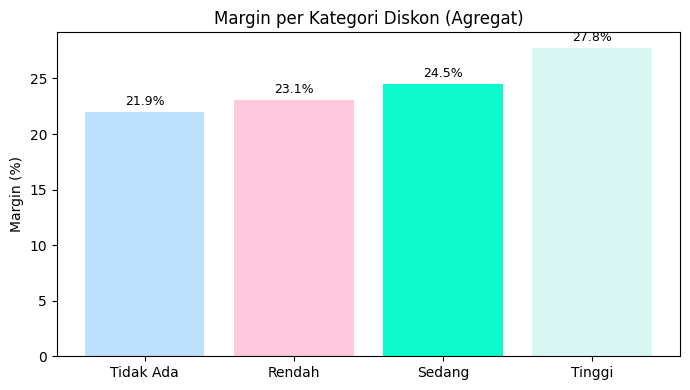

In [320]:
cats = ['Tidak Ada','Rendah','Sedang','Tinggi']
y = (agg_cat.loc[cats, 'margin_pct'] * 100).astype(float)

fig, ax = plt.subplots(figsize=(7,4))
bars = ax.bar(cats, y.values, color=PALETTE[:len(cats)])
ax.set_ylabel('Margin (%)')
ax.set_title('Margin per Kategori Diskon (Agregat)')

for rect, val in zip(bars, y.values):
    ax.annotate(f'{val:.1f}%',
                xy=(rect.get_x() + rect.get_width()/2, val),
                xytext=(0, 3),
                textcoords="offset points",
                ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.show()


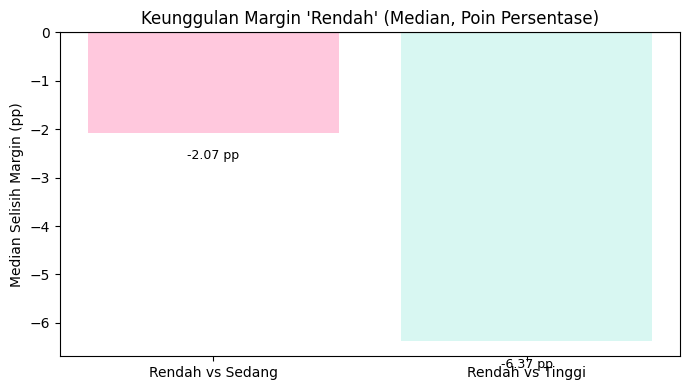

In [321]:
med_rs = float(summary_within.loc[0, 'median_diff_R_vs_Sedang_pctpt']) if pd.notna(summary_within.loc[0, 'median_diff_R_vs_Sedang_pctpt']) else 0.0
med_rt = float(summary_within.loc[0, 'median_diff_R_vs_Tinggi_pctpt']) if pd.notna(summary_within.loc[0, 'median_diff_R_vs_Tinggi_pctpt']) else 0.0

labels = ['Rendah vs Sedang', 'Rendah vs Tinggi']
vals = [med_rs, med_rt]
colors = [PALETTE[1], PALETTE[3]]

fig, ax = plt.subplots(figsize=(7,4))
bars = ax.bar(labels, vals, color=colors)
ax.axhline(0, linewidth=1, color='#888', alpha=0.5)
ax.set_ylabel('Median Selisih Margin (pp)')
ax.set_title("Keunggulan Margin 'Rendah' (Median, Poin Persentase)")

for rect, val in zip(bars, vals):
    ax.annotate(f'{val:.2f} pp',
                xy=(rect.get_x() + rect.get_width()/2, val),
                xytext=(0, 3 if val>=0 else -12),
                textcoords="offset points",
                ha='center', va='bottom' if val>=0 else 'top', fontsize=9)
plt.tight_layout()
plt.show()

### Analisis Tren Waktu

**Tren profit per kuartal setiap tahunnya, baik secara keseluruhan maupun berdasarkan jenis produk**

In [335]:
try:
    df_top = top3_per_yq.copy()
except NameError:
    BAD = {"unknown","na","n/a","none","null","-",""}
    jenis = dfclean['jenis_barang'].astype('string').str.strip()
    jenis_valid = jenis.notna() & jenis.ne('') & ~jenis.str.casefold().isin(BAD)

    if 'year_bin' not in dfclean.columns:
        tb = pd.to_datetime(dfclean['tanggal_bon'], errors='coerce')
        y = tb.dt.year.astype('Int64').astype('string')
        allowed = ['2022','2023','2024','2025']
        dfclean['year_bin'] = pd.Categorical(y.where(y.isin(allowed)),
                                             categories=allowed, ordered=True)
    if 'quartil_bin' not in dfclean.columns:
        raise RuntimeError("Kolom 'quartil_bin' belum ada. Jalankan pembuatan quartil dulu.")

    mask_ok = jenis_valid & dfclean['year_bin'].notna() & dfclean['quartil_bin'].notna()

    dfx = dfclean.loc[mask_ok, ['year_bin','quartil_bin','jenis_barang']].copy()
    idx = dfx.index

    qty   = pd.to_numeric(dfclean['jumlah_terjual'], errors='coerce').reindex(idx).fillna(0)
    price = pd.to_numeric(dfclean.get('harga_satuan', np.nan), errors='coerce').reindex(idx).fillna(0)
    disc  = pd.to_numeric(dfclean.get('diskon', 0), errors='coerce').reindex(idx).fillna(0)

    dfx['qty_num']  = qty
    dfx['rev_line'] = price * qty * (1 - disc/100)

    agg = (dfx.groupby(['year_bin','quartil_bin','jenis_barang'], observed=True, as_index=False)
             .agg(total_qty=('qty_num','sum'),
                  total_revenue=('rev_line','sum')))
    agg = agg.sort_values(['year_bin','quartil_bin','total_qty','total_revenue','jenis_barang'],
                          ascending=[True, True, False, False, True])
    agg['rank'] = agg.groupby(['year_bin','quartil_bin']).cumcount() + 1
    df_top = agg.loc[agg['rank'] <= 3].reset_index(drop=True)

years_order   = ['2022','2023','2024','2025']
quartil_order = ['Q1','Q2','Q3','Q4']

for y in years_order:
    for q in quartil_order:
        sub = df_top[(df_top['year_bin'] == y) & (df_top['quartil_bin'] == q)].sort_values('rank')
        if sub.empty:
            continue
        print(f"\n Tahun {y} — {q}")
        for i, r in enumerate(sub.itertuples(index=False), start=1):
            print(f"   {i}. {r.jenis_barang}: {int(r.total_qty):,} unit")




▶ Tahun 2022 — Q1
   1. Keyboard: 4,469 unit
   2. Printer: 3,874 unit
   3. Monitor: 3,858 unit

▶ Tahun 2022 — Q2
   1. Keyboard: 3,673 unit
   2. Printer: 3,597 unit
   3. Monitor: 3,433 unit

▶ Tahun 2022 — Q3
   1. Printer: 4,066 unit
   2. Speaker: 3,646 unit
   3. Keyboard: 3,222 unit

▶ Tahun 2022 — Q4
   1. Printer: 3,052 unit
   2. Keyboard: 2,900 unit
   3. Monitor: 2,516 unit

▶ Tahun 2023 — Q1
   1. Laptop: 3,845 unit
   2. Monitor: 3,755 unit
   3. Printer: 3,259 unit

▶ Tahun 2023 — Q2
   1. Laptop: 3,362 unit
   2. Monitor: 3,109 unit
   3. Keyboard: 3,101 unit

▶ Tahun 2023 — Q3
   1. Printer: 3,217 unit
   2. Keyboard: 3,207 unit
   3. Monitor: 2,725 unit

▶ Tahun 2023 — Q4
   1. Monitor: 3,085 unit
   2. Laptop: 2,987 unit
   3. Printer: 2,941 unit

▶ Tahun 2024 — Q1
   1. PC Rakitan: 4,036 unit
   2. Keyboard: 2,605 unit
   3. Monitor: 2,138 unit

▶ Tahun 2024 — Q2
   1. PC Rakitan: 3,845 unit
   2. Keyboard: 2,302 unit
   3. Monitor: 2,134 unit

▶ Tahun 2024 — Q3


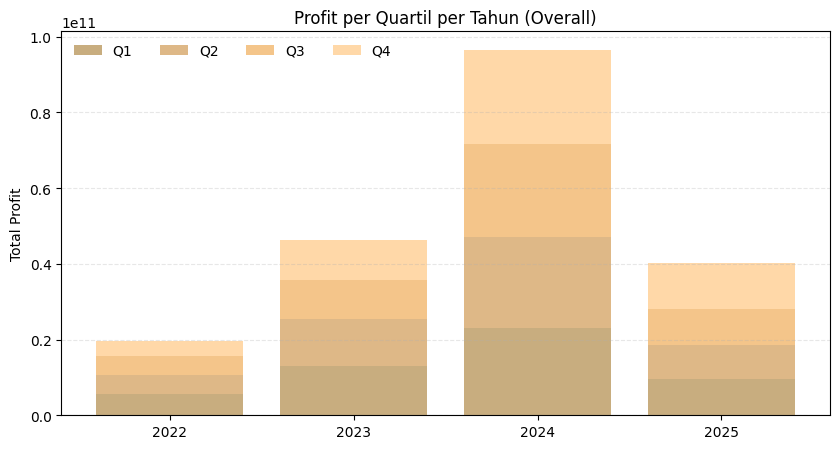

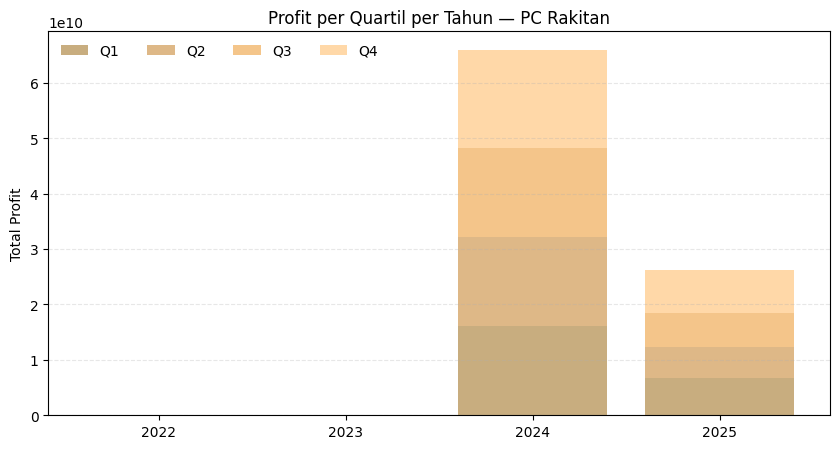

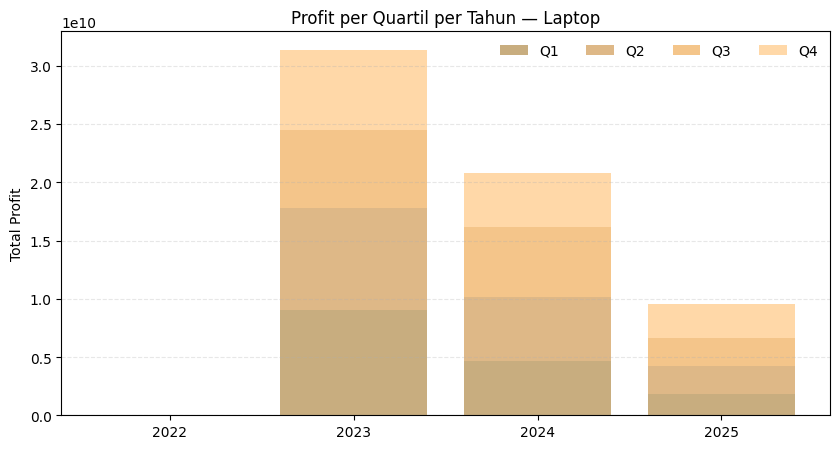

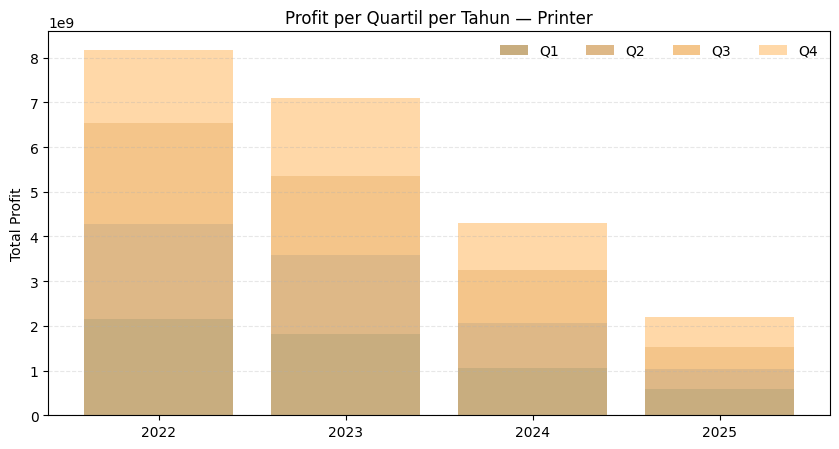

In [330]:
Q_COLORS = {
    'Q1': '#C8AD7F',
    'Q2': '#DEB887',
    'Q3': '#F4C58A',
    'Q4': '#FFD8A8',
}

def plot_stacked_quartiles(df, title):
    """df: index=year (str), columns=['Q1','Q2','Q3','Q4'] with profit values"""
    quartiles = ['Q1','Q2','Q3','Q4']
    df_plot = df.reindex(columns=quartiles).fillna(0)

    x = np.arange(len(df_plot.index))
    fig, ax = plt.subplots(figsize=(8.5, 4.6))
    bottom = np.zeros(len(df_plot))

    for q in quartiles:
        vals = df_plot[q].values
        ax.bar(x, vals, bottom=bottom, label=q, color=Q_COLORS[q])
        bottom += vals

    ax.set_xticks(x)
    ax.set_xticklabels(df_plot.index.astype(str))
    ax.set_ylabel('Total Profit')
    ax.set_title(title)
    ax.axhline(0, color='#999', linewidth=0.8, alpha=0.6)
    ax.grid(axis='y', linestyle='--', alpha=0.3)
    ax.legend(frameon=False, ncol=4)
    fig.tight_layout()
    plt.show()

if 'overall_trend' not in globals():
    raise NameError("Variabel 'overall_trend' belum ada. Jalankan blok analisis tren terlebih dahulu.")
plot_stacked_quartiles(overall_trend, 'Profit per Quartil per Tahun (Overall)')

if 'trend_dict' not in globals():
    raise NameError("Variabel 'trend_dict' belum ada. Jalankan blok analisis tren (top 3 jenis) terlebih dahulu.")

for jenis, tbl in trend_dict.items():
    plot_stacked_quartiles(tbl, f'Profit per Quartil per Tahun — {jenis}')


**Analisis Barang dengan Volume Jual Terbanyak per Quartil per Tahunnya**

In [363]:
try:
    df_top = top3_per_yq.copy()
except NameError:
    BAD = {"unknown","na","n/a","none","null","-",""}
    jenis = dfclean['jenis_barang'].astype('string').str.strip()
    jenis_valid = jenis.notna() & jenis.ne('') & ~jenis.str.casefold().isin(BAD)

    if 'year_bin' not in dfclean.columns:
        tb = pd.to_datetime(dfclean['tanggal_bon'], errors='coerce')
        y = tb.dt.year.astype('Int64').astype('string')
        allowed = ['2022','2023','2024','2025']
        dfclean['year_bin'] = pd.Categorical(y.where(y.isin(allowed)),
                                             categories=allowed, ordered=True)
    if 'quartil_bin' not in dfclean.columns:
        raise RuntimeError("Kolom 'quartil_bin' belum ada. Jalankan pembuatan quartil dulu.")

    mask_ok = jenis_valid & dfclean['year_bin'].notna() & dfclean['quartil_bin'].notna()

    dfx = dfclean.loc[mask_ok, ['year_bin','quartil_bin','jenis_barang']].copy()
    idx = dfx.index
    qty   = pd.to_numeric(dfclean['jumlah_terjual'], errors='coerce').reindex(idx).fillna(0)
    price = pd.to_numeric(dfclean.get('harga_satuan', np.nan), errors='coerce').reindex(idx).fillna(0)
    disc  = pd.to_numeric(dfclean.get('diskon', 0), errors='coerce').reindex(idx).fillna(0)

    dfx['qty_num']  = qty
    dfx['rev_line'] = price * qty * (1 - disc/100)

    agg = (dfx.groupby(['year_bin','quartil_bin','jenis_barang'], observed=True, as_index=False)
             .agg(total_qty=('qty_num','sum'),
                  total_revenue=('rev_line','sum')))
    agg = agg.sort_values(['year_bin','quartil_bin','total_qty','total_revenue','jenis_barang'],
                          ascending=[True, True, False, False, True])
    agg['rank'] = agg.groupby(['year_bin','quartil_bin']).cumcount() + 1
    df_top = agg.loc[agg['rank'] <= 3].reset_index(drop=True)

In [365]:
years_order   = ['2022','2023','2024','2025']
quartil_order = ['Q1','Q2','Q3','Q4']

for y in years_order:
    for q in quartil_order:
        sub = df_top[(df_top['year_bin'] == y) & (df_top['quartil_bin'] == q)].sort_values('rank')
        if sub.empty:
            continue
        print(f"\n Tahun {y} — {q}")
        for i, r in enumerate(sub.itertuples(index=False), start=1):
            print(f"   {i}. {r.jenis_barang}: {int(r.total_qty):,} unit")



 Tahun 2022 — Q1
   1. Keyboard: 4,469 unit
   2. Printer: 3,874 unit
   3. Monitor: 3,858 unit

 Tahun 2022 — Q2
   1. Keyboard: 3,673 unit
   2. Printer: 3,597 unit
   3. Monitor: 3,433 unit

 Tahun 2022 — Q3
   1. Printer: 4,066 unit
   2. Speaker: 3,646 unit
   3. Keyboard: 3,222 unit

 Tahun 2022 — Q4
   1. Printer: 3,052 unit
   2. Keyboard: 2,900 unit
   3. Monitor: 2,516 unit

 Tahun 2023 — Q1
   1. Laptop: 3,845 unit
   2. Monitor: 3,755 unit
   3. Printer: 3,259 unit

 Tahun 2023 — Q2
   1. Laptop: 3,362 unit
   2. Monitor: 3,109 unit
   3. Keyboard: 3,101 unit

 Tahun 2023 — Q3
   1. Printer: 3,217 unit
   2. Keyboard: 3,207 unit
   3. Monitor: 2,725 unit

 Tahun 2023 — Q4
   1. Monitor: 3,085 unit
   2. Laptop: 2,987 unit
   3. Printer: 2,941 unit

 Tahun 2024 — Q1
   1. PC Rakitan: 4,036 unit
   2. Keyboard: 2,605 unit
   3. Monitor: 2,138 unit

 Tahun 2024 — Q2
   1. PC Rakitan: 3,845 unit
   2. Keyboard: 2,302 unit
   3. Monitor: 2,134 unit

 Tahun 2024 — Q3
   1. PC Ra

## **C. Analisis Kepuasan Pelanggan**

Tujuan dari segmen ini untuk memahami hubungan antara kualitas produk,komplain, dan diskon terhadap kepuasan pelanggan

### Analisis Komplain & Rating Produk

**Merek dan jenis barang yang paling sering mendapatkan komplain**

In [372]:
import re

norm = {col: re.sub(r'[^a-z]', '', str(col).lower()) for col in dfclean.columns}
candidates = {'komplain','komplaintoko','complaint','iscomplain','complainflag'}
comp_col = next((col for col, key in norm.items() if key in candidates), None)
if comp_col is None:
    raise KeyError(f"Tidak menemukan kolom komplain. Kandidat: {list(dfclean.columns)}")

s = dfclean[comp_col].astype('string').str.strip().str.lower()
YES = {'yes','y','ya','1','true'}
NO  = {'no','n','tidak','0','false'}
df_tmp = dfclean.copy()
df_tmp['complain_flag'] = s.map(lambda x: 1 if x in YES else (0 if x in NO else np.nan))

In [374]:
jenis_df = df_tmp.loc[jenis_ok, ['jenis_barang','complain_flag']].copy()
jenis_df['jenis_barang'] = jenis_df['jenis_barang'].str.title()

jenis_agg = (jenis_df
    .groupby('jenis_barang', as_index=False)['complain_flag']
    .agg(complaints=lambda x: int(np.nansum(x)),
         total=lambda x: int(x.notna().sum()))
)
jenis_agg['rate'] = (jenis_agg['complaints'] / jenis_agg['total']).replace([np.inf,-np.inf], np.nan)
top3_jenis_complaint = jenis_agg.sort_values(['complaints','rate'], ascending=[False, False]).head(3)
print("Top 3 jenis barang paling sering dikomplain:")
display(top3_jenis_complaint)


Top 3 jenis barang paling sering dikomplain:


,jenis_barang,complaints,total,rate
2,Monitor,371,1735,0.213833
5,Printer,336,1694,0.198347
0,Keyboard,335,1674,0.200119


### Analisis Komplain & Rating Berdasarkan Pelanggan

berdasarkan age_bin yang paling mengajukan komplain atau memberikan rating rendah (<3)

In [394]:
df = dfclean.copy()

if "age_bin" not in df.columns:
    raise KeyError("Kolom 'age_bin' belum ada. Buat dulu age_bin sebelum menjalankan ini.")

COMP_CANDS = [
    "komplain","Komplain","komplain_toko","Komplain_Toko",
    "complaint","Complaint","is_complain","Is_Complain","complain_flag","Complain_Flag"
]
cols_lower = {c.lower(): c for c in df.columns}
comp_col = next((cols_lower[c.lower()] for c in COMP_CANDS if c.lower() in cols_lower), None)
if comp_col is None:
    raise KeyError("Kolom komplain tidak ditemukan. Tambahkan salah satu kolom: "
                   + ", ".join(COMP_CANDS))


In [395]:
s = df[comp_col].astype('string').str.strip().str.lower()
YES = {"yes","y","ya","1","true"}
NO  = {"no","n","tidak","0","false"}

mask_yes = s.isin(YES)
mask_no  = s.isin(NO)
flag = np.where(mask_yes, 1, np.where(mask_no, 0, np.nan))

In [396]:
ORDER = ["<20","20-29","30-39","40-49","50-59","60+"]
order_used = ORDER if set(ORDER).issubset(set(df["age_bin"].astype(str).unique())) else None

counts_complain = (
    df.assign(_flag=flag)
      .loc[mask_yes | mask_no]
      .groupby("age_bin")["_flag"]
      .sum(min_count=1)
      .astype("Int64")
      .sort_index()
)

if order_used:
    counts_complain = counts_complain.reindex(ORDER, fill_value=0).astype("Int64")

total_yes = int(mask_yes.sum())
bins_ada  = counts_complain[counts_complain > 0].index.astype(str).tolist()

print("Distribusi komplain (Yes) per age_bin:")
print(counts_complain.to_string())

print(f"\nTotal komplain (Yes): {total_yes}")
print("Muncul di age_bin:", ", ".join(bins_ada) if bins_ada else "(tidak ada)")

Distribusi komplain (Yes) per age_bin:
age_bin
<18        27
18–24     295
25–34     408
35–44     443
45–54     383
55–64     152
65+      <NA>

Total komplain (Yes): 1746
Muncul di age_bin: <18, 18–24, 25–34, 35–44, 45–54, 55–64


/tmp/ipython-input-1131457614.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby("age_bin")["_flag"]


/tmp/ipython-input-3232079878.py:49: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('age_bin')['_flag']


Distribusi komplain (Yes) per age_bin:
age_bin
<18       27
18–24    295
25–34    408
35–44    443
45–54    383
55–64    152
65+        0

Total komplain (Yes): 1708
Muncul di age_bin: <18, 18–24, 25–34, 35–44, 45–54, 55–64


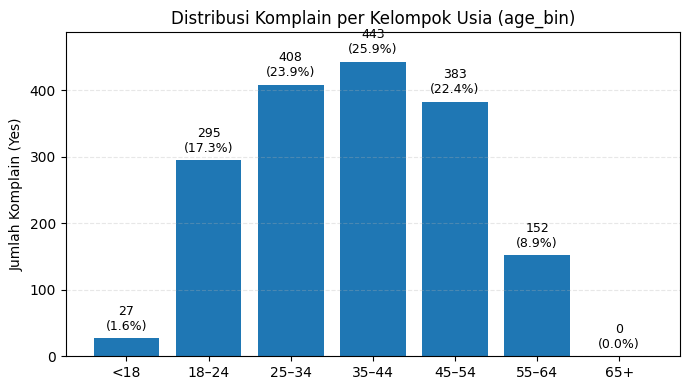

In [400]:
df = dfclean.copy()

if "age_bin" not in df.columns:
    tb = pd.to_datetime(df['tanggal_bon'], errors='coerce')
    tl = pd.to_datetime(df['tanggal_lahir'], errors='coerce')
    diff_year = tb.dt.year - tl.dt.year
    had_bday  = (tb.dt.month > tl.dt.month) | ((tb.dt.month == tl.dt.month) & (tb.dt.day >= tl.dt.day))
    umur = diff_year - (~had_bday).astype(int)
    umur = umur.where(tl.notna() & tb.notna() & (umur >= 0))
    BIN_EDGES = [-np.inf, 19, 29, 39, 49, 59, np.inf]
    BIN_LABELS = ["<20", "20-29", "30-39", "40-49", "50-59", "60+"]
    df['age_bin'] = pd.cut(pd.to_numeric(umur, errors='coerce'),
                           bins=BIN_EDGES, labels=BIN_LABELS,
                           right=True, include_lowest=True)
    df['age_bin'] = df['age_bin'].cat.set_categories(BIN_LABELS, ordered=True)

normmap = {c: re.sub(r'[^a-z]', '', str(c).lower()) for c in df.columns}
candidates = {'komplain','komplaintoko','complaint','iscomplain','complainflag'}
comp_col = next((col for col, key in normmap.items() if key in candidates), None)
if comp_col is None:
    raise KeyError("Kolom komplain tidak ditemukan. Coba tambahkan salah satu: "
                   "'Komplain', 'komplain_toko', 'complaint', 'is_complain', 'complain_flag'.")

s = df[comp_col].astype('string').str.strip().str.lower()
YES = {"yes","y","ya","1","true"}
NO  = {"no","n","tidak","0","false"}
mask_yes = s.isin(YES)
mask_no  = s.isin(NO)
flag = np.where(mask_yes, 1, np.where(mask_no, 0, np.nan))



In [ ]:
ORDER = ["<20","20-29","30-39","40-49","50-59","60+"]
counts_complain = (
    df.assign(_flag=flag)
      .loc[mask_yes | mask_no]
      .groupby('age_bin')['_flag']
      .sum(min_count=1)
      .astype('Int64')
      .sort_index()
)

if set(ORDER).issubset(set(counts_complain.index.astype(str))):
    counts_complain = counts_complain.reindex(ORDER).astype('Int64')

total_yes = int(counts_complain.fillna(0).sum())
bins_ada  = counts_complain[counts_complain.fillna(0) > 0].index.astype(str).tolist()

print("Distribusi komplain (Yes) per age_bin:")
print(counts_complain.fillna(0).astype(int).to_string())
print(f"\nTotal komplain (Yes): {total_yes}")
print("Muncul di age_bin:", ", ".join(bins_ada) if bins_ada else "(tidak ada)")

In [ ]:

labels = counts_complain.index.astype(str).tolist()
values = counts_complain.fillna(0).astype(int).values
total  = values.sum()
perc   = (values / total * 100) if total > 0 else np.zeros_like(values, dtype=float)

fig, ax = plt.subplots(figsize=(7,4))
x = np.arange(len(labels))
bars = ax.bar(x, values)

ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel('Jumlah Komplain (Yes)')
ax.set_title('Distribusi Komplain per Kelompok Usia (age_bin)')
ax.grid(axis='y', linestyle='--', alpha=0.3)

for i, (v, p) in enumerate(zip(values, perc)):
    ax.annotate(f'{v:,}\n({p:.1f}%)',
                xy=(i, v),
                xytext=(0, 4),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=9)

ax.margins(y=0.1)
fig.tight_layout()
plt.show()


### Analisis Dampak Diskon

**Dampak pemberian diskon terhadap komplain (apakah komplain menurun saat diskon diberikan?)**

In [401]:
import re, math

df = dfclean.copy()

norm = {col: re.sub(r'[^a-z]', '', str(col).lower()) for col in df.columns}
candidates = {'komplain','komplaintoko','complaint','iscomplain','complainflag'}
comp_col = next((col for col, key in norm.items() if key in candidates), None)
if comp_col is None:
    raise KeyError(f"Tidak menemukan kolom komplain. Kolom tersedia: {list(df.columns)}")

s = df[comp_col].astype('string').str.strip().str.lower()
YES = {'yes','y','ya','1','true'}
NO  = {'no','n','tidak','0','false'}
df['complain_flag'] = s.map(lambda x: 1 if x in YES else (0 if x in NO else np.nan))

disc = pd.to_numeric(df.get('diskon', 0), errors='coerce').fillna(0)
df['discount_given'] = (disc > 0).astype(int)

if 'kategori_diskon' not in df.columns:
    conds   = [disc.eq(0), (disc>0)&(disc<=5), (disc>5)&(disc<=15), disc>15]
    labels  = ['Tidak Ada','Rendah','Sedang','Tinggi']
    df['kategori_diskon'] = pd.Series(np.select(conds, labels, default=np.nan), dtype='string')
else:
    labels  = ['Tidak Ada','Rendah','Sedang','Tinggi']
    try:
        df['kategori_diskon'] = df['kategori_diskon'].astype('category').cat.set_categories(labels, ordered=True)
    except Exception:
        pass

mask_labeled = df['complain_flag'].isin([0,1])


=== Komplain rate: No Discount vs Discount ===


,complaints,total,rate
discount_given,,,
No Discount,417,2014,0.207051
Discount,1329,6547,0.202994



=== Komplain rate per kategori diskon ===


/tmp/ipython-input-3410818635.py:50: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('kategori_diskon', dropna=False)['complain_flag']


,complaints,total,rate
kategori_diskon,,,
Tidak Ada,417,2014,0.207051
Rendah,397,1956,0.202965
Sedang,811,4000,0.202750
Tinggi,121,591,0.204738



=== Two-proportion z-test: Discount vs No Discount ===
Discount: 1329/6547 (20.30%) | No Discount: 417/2014 (20.71%)
z = -0.395, p-value = 0.6927  -> tidak signifikan (α=0.05)

=== Korelasi Spearman (diskon% vs komplain) ===
Spearman rho = -0.001 (negatif -> makin besar diskon, cenderung lebih sedikit komplain)

=== Within-Product Summary ===
Produk dengan data diskon & non-diskon: 74
Median (rate_diskon - rate_nondiskon): -0.18 pp  (turun)
Share produk dengan komplain MENURUN saat diskon: 52.7%

=== Komplain rate per tahun: No Discount vs Discount ===


/tmp/ipython-input-3410818635.py:140: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['year_bin','discount_given'])['complain_flag']


,year_bin,discount_given,complaints,total,rate
0,2022,No Discount,129,576,0.223958
1,2022,Discount,422,1975,0.213671
2,2023,No Discount,115,581,0.197935
3,2023,Discount,356,1839,0.193583
4,2024,No Discount,112,565,0.198230
5,2024,Discount,366,1855,0.197305
6,2025,No Discount,61,292,0.208904
7,2025,Discount,185,878,0.210706


In [ ]:
summary_bin = (df.loc[mask_labeled]
                 .groupby('discount_given')['complain_flag']
                 .agg(complaints='sum', total='count'))
summary_bin['rate'] = summary_bin['complaints'] / summary_bin['total']
summary_bin.index = summary_bin.index.map({0:'No Discount', 1:'Discount'})

print("=== Komplain rate: No Discount vs Discount ===")
display(summary_bin)

summary_cat = (df.loc[mask_labeled]
                 .groupby('kategori_diskon', dropna=False)['complain_flag']
                 .agg(complaints='sum', total='count')
                 .reindex(labels))
summary_cat['rate'] = summary_cat['complaints'] / summary_cat['total']
print("\n=== Komplain rate per kategori diskon ===")
display(summary_cat)


In [ ]:
c1 = int(summary_bin.loc['Discount', 'complaints']) if 'Discount' in summary_bin.index else 0
n1 = int(summary_bin.loc['Discount', 'total'])       if 'Discount' in summary_bin.index else 0
c2 = int(summary_bin.loc['No Discount', 'complaints']) if 'No Discount' in summary_bin.index else 0
n2 = int(summary_bin.loc['No Discount', 'total'])      if 'No Discount' in summary_bin.index else 0

def ztest_2prop(c1, n1, c2, n2):
    if min(n1, n2) == 0:
        return np.nan, np.nan
    p1 = c1 / n1
    p2 = c2 / n2
    p  = (c1 + c2) / (n1 + n2)
    se = math.sqrt(p*(1-p)*(1/n1 + 1/n2))
    if se == 0:
        return np.nan, np.nan
    z  = (p1 - p2) / se

    Phi = lambda z: 0.5 * (1 + math.erf(z / math.sqrt(2)))
    pval = 2 * (1 - Phi(abs(z)))
    return z, pval

z, pval = ztest_2prop(c1, n1, c2, n2)
print("\n=== Two-proportion z-test: Discount vs No Discount ===")
print(f"Discount: {c1}/{n1} ({(c1/n1*100 if n1 else 0):.2f}%) | No Discount: {c2}/{n2} ({(c2/n2*100 if n2 else 0):.2f}%)")
print(f"z = {z:.3f}, p-value = {pval:.4f}  -> {'BEDA SIGNIFIKAN' if (not np.isnan(pval) and pval<0.05) else 'tidak signifikan (α=0.05)'}")


In [ ]:
mask_num = mask_labeled & disc.notna()
if mask_num.any():
    rho = disc[mask_num].corr(df.loc[mask_num, 'complain_flag'], method='spearman')
else:
    rho = np.nan
print("\n=== Korelasi Spearman (diskon% vs komplain) ===")
print(f"Spearman rho = {rho:.3f} (negatif -> makin besar diskon, cenderung lebih sedikit komplain)")

BAD = {"unknown","na","n/a","none","null","-",""}
def ok_text(s: pd.Series) -> pd.Series:
    s = s.astype('string').str.strip()
    return s.notna() & s.ne('') & ~s.str.casefold().isin(BAD)

prod_cols = ['id_produk','jenis_barang','merek_barang']
has_prod = all(col in df.columns for col in prod_cols)
if has_prod:
    valid_prod = ok_text(df['id_produk']) & ok_text(df['jenis_barang']) & ok_text(df['merek_barang'])
    dfx = df.loc[mask_labeled & valid_prod, prod_cols + ['discount_given','complain_flag']].copy()
    gp = (dfx.groupby(prod_cols + ['discount_given'])['complain_flag']
             .agg(complaints='sum', total='count')
             .reset_index())
    pv = gp.pivot_table(index=prod_cols, columns='discount_given', values=['complaints','total'], aggfunc='sum')
    for lvl in ['complaints','total']:
        for k in [0,1]:
            if (lvl, k) not in pv.columns:
                pv[(lvl, k)] = 0
    pv = pv.sort_index(axis=1)
    pv.columns = [f'{a}_{b}' for a,b in pv.columns]
    pv['rate_no']  = pv['complaints_0'] / pv['total_0'].replace(0,np.nan)
    pv['rate_yes'] = pv['complaints_1'] / pv['total_1'].replace(0,np.nan)
    pv['delta_yes_minus_no'] = pv['rate_yes'] - pv['rate_no']

    paired = pv.dropna(subset=['rate_no','rate_yes'])
    median_delta = paired['delta_yes_minus_no'].median() if len(paired) else np.nan
    share_reduction = (paired['delta_yes_minus_no'] < 0).mean() if len(paired) else np.nan

    print("\n=== Within-Product Summary ===")
    print(f"Produk dengan data diskon & non-diskon: {len(paired):,}")
    print(f"Median (rate_diskon - rate_nondiskon): {median_delta*100:.2f} pp  "
          f"({'turun' if median_delta<0 else 'naik' if median_delta>0 else 'tidak berubah'})")
    print(f"Share produk dengan komplain MENURUN saat diskon: {share_reduction*100:.1f}%")
else:
    print("\n(Within-product) Kolom id/jenis/merek produk tidak lengkap; lewati analisis ini.")

if 'year_bin' not in df.columns:
    tb = pd.to_datetime(df['tanggal_bon'], errors='coerce')
    y = tb.dt.year.astype('Int64').astype('string')
    allowed = ['2022','2023','2024','2025']
    df['year_bin'] = pd.Categorical(y.where(y.isin(allowed)), categories=allowed, ordered=True)

by_year = (df.loc[mask_labeled]
             .groupby(['year_bin','discount_given'])['complain_flag']
             .agg(complaints='sum', total='count')
             .assign(rate=lambda x: x['complaints']/x['total'])
             .reset_index())
by_year['discount_given'] = by_year['discount_given'].map({0:'No Discount',1:'Discount'})

print("\n=== Komplain rate per tahun: No Discount vs Discount ===")
display(by_year)

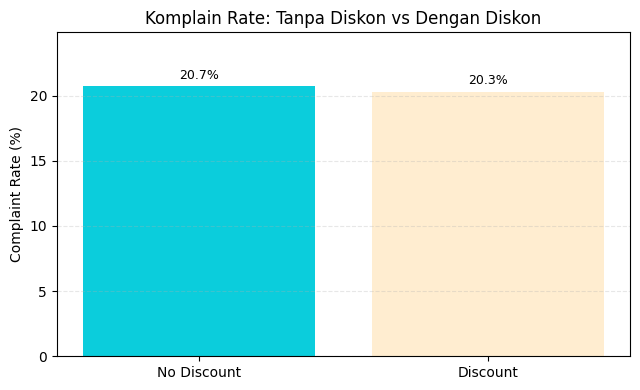

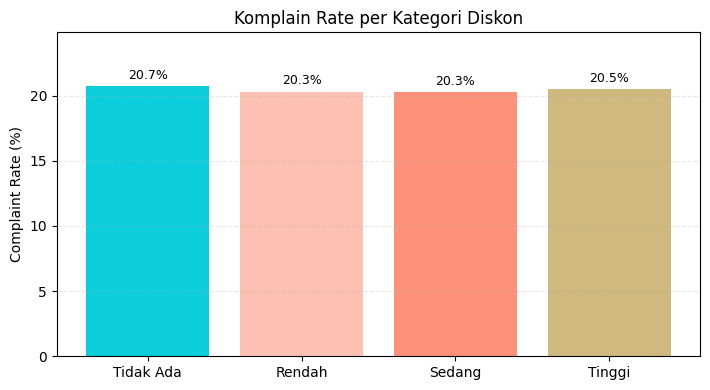

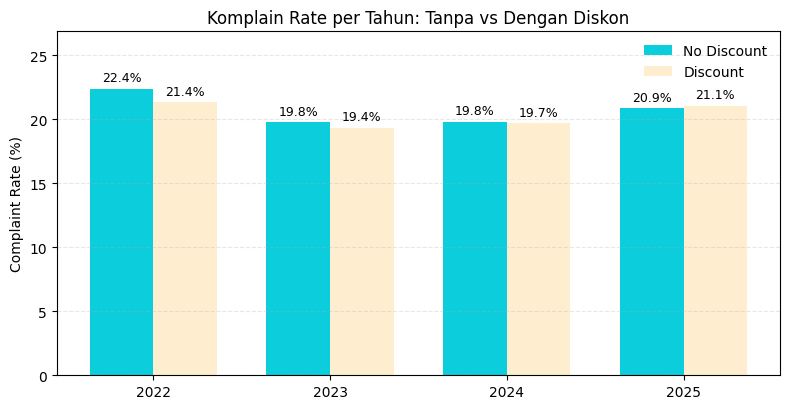

In [403]:
def normalize_hex(c):
    c = str(c).strip().lstrip('#').upper()
    c = ''.join(ch if ch in '0123456789ABCDEF' else '0' for ch in c)
    if len(c) == 3:
        c = ''.join(ch*2 for ch in c)
    elif len(c) == 5:
        c = '0' + c
    elif len(c) < 6:
        c = c.ljust(6, '0')
    return '#' + c[:6]

PALETTE = [normalize_hex(c) for c in ['BCDDC','FFEDDI','FDC1B4','FE9179','CFB97E']]

def ensure_summaries():
    global summary_bin, summary_cat, by_year
    have_bin = 'summary_bin' in globals()
    have_cat = 'summary_cat' in globals()
    have_year = 'by_year' in globals()

    if have_bin and have_cat and have_year:
        return

    df = dfclean.copy()

    norm = {col: re.sub(r'[^a-z]', '', str(col).lower()) for col in df.columns}
    candidates = {'komplain','komplaintoko','complaint','iscomplain','complainflag'}
    comp_col = next((col for col, key in norm.items() if key in candidates), None)
    if comp_col is None:
        raise KeyError("Kolom komplain tidak ditemukan di dfclean.")

    s = df[comp_col].astype('string').str.strip().str.lower()
    YES = {'yes','y','ya','1','true'}
    NO  = {'no','n','tidak','0','false'}
    df['complain_flag'] = s.map(lambda x: 1 if x in YES else (0 if x in NO else np.nan))

    disc = pd.to_numeric(df.get('diskon', 0), errors='coerce').fillna(0)
    df['discount_given'] = (disc > 0).astype(int)

    labels = ['Tidak Ada','Rendah','Sedang','Tinggi']
    if 'kategori_diskon' not in df.columns:
        conds = [disc.eq(0), (disc>0)&(disc<=5), (disc>5)&(disc<=15), disc>15]
        df['kategori_diskon'] = pd.Series(np.select(conds, labels, default=np.nan), dtype='string')
    else:
        try:
            df['kategori_diskon'] = df['kategori_diskon'].astype('category').cat.set_categories(labels, ordered=True)
        except Exception:
            pass

    mask_labeled = df['complain_flag'].isin([0,1])

    summary_bin = (df.loc[mask_labeled]
                     .groupby('discount_given')['complain_flag']
                     .agg(complaints='sum', total='count'))
    summary_bin['rate'] = summary_bin['complaints'] / summary_bin['total']
    summary_bin.index = summary_bin.index.map({0:'No Discount', 1:'Discount'})

    summary_cat = (df.loc[mask_labeled]
                     .groupby('kategori_diskon', dropna=False)['complain_flag']
                     .agg(complaints='sum', total='count')
                     .reindex(labels))
    summary_cat['rate'] = summary_cat['complaints'] / summary_cat['total']

    if 'year_bin' not in df.columns:
        tb = pd.to_datetime(df['tanggal_bon'], errors='coerce')
        y = tb.dt.year.astype('Int64').astype('string')
        allowed = ['2022','2023','2024','2025']
        df['year_bin'] = pd.Categorical(y.where(y.isin(allowed)), categories=allowed, ordered=True)

    by_year = (df.loc[mask_labeled]
                 .groupby(['year_bin','discount_given'])['complain_flag']
                 .agg(complaints='sum', total='count')
                 .assign(rate=lambda x: x['complaints']/x['total'])
                 .reset_index())
    by_year['discount_given'] = by_year['discount_given'].map({0:'No Discount',1:'Discount'})

ensure_summaries()

df1 = summary_bin.loc[['No Discount','Discount']].copy()
labels1 = df1.index.tolist()
vals1 = (df1['rate'] * 100).fillna(0).values

fig, ax = plt.subplots(figsize=(6.5, 4))
bars = ax.bar(labels1, vals1, color=[PALETTE[0], PALETTE[1]])
ax.set_ylabel('Complaint Rate (%)')
ax.set_title('Komplain Rate: Tanpa Diskon vs Dengan Diskon')
ax.set_ylim(0, max(5, vals1.max()*1.2))
for rect, v in zip(bars, vals1):
    ax.annotate(f'{v:.1f}%',
                xy=(rect.get_x() + rect.get_width()/2, v),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=9)
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

cats = ['Tidak Ada','Rendah','Sedang','Tinggi']
df2 = summary_cat.reindex(cats).copy()
labels2 = df2.index.astype(str).tolist()
vals2 = (df2['rate'] * 100).fillna(0).values

fig, ax = plt.subplots(figsize=(7.2, 4))
bars = ax.bar(labels2, vals2, color=[PALETTE[0], PALETTE[2], PALETTE[3], PALETTE[4]])
ax.set_ylabel('Complaint Rate (%)')
ax.set_title('Komplain Rate per Kategori Diskon')
ax.set_ylim(0, max(5, vals2.max()*1.2))
for rect, v in zip(bars, vals2):
    ax.annotate(f'{v:.1f}%',
                xy=(rect.get_x() + rect.get_width()/2, v),
                xytext=(0, 3),
                textcoords='offset points',
                ha='center', va='bottom', fontsize=9)
ax.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

df3 = by_year.copy()
years = [y for y in ['2022','2023','2024','2025'] if y in df3['year_bin'].astype(str).unique().tolist()]
if years:
    width = 0.36
    x = np.arange(len(years))
    rate_no  = df3[df3['discount_given']=='No Discount'].set_index('year_bin').reindex(years)['rate'].fillna(0).values * 100
    rate_yes = df3[df3['discount_given']=='Discount'].set_index('year_bin').reindex(years)['rate'].fillna(0).values * 100

    fig, ax = plt.subplots(figsize=(8, 4.2))
    b1 = ax.bar(x - width/2, rate_no,  width, label='No Discount', color=PALETTE[0])
    b2 = ax.bar(x + width/2, rate_yes, width, label='Discount',    color=PALETTE[1])

    ax.set_xticks(x)
    ax.set_xticklabels(years)
    ax.set_ylabel('Complaint Rate (%)')
    ax.set_title('Komplain Rate per Tahun: Tanpa vs Dengan Diskon')
    ax.set_ylim(0, max(5, rate_no.max(), rate_yes.max())*1.2)
    ax.legend(frameon=False)
    ax.grid(axis='y', linestyle='--', alpha=0.3)

    for i, v in enumerate(rate_no):
        ax.annotate(f'{v:.1f}%', xy=(x[i]-width/2, v), xytext=(0,3),
                    textcoords='offset points', ha='center', va='bottom', fontsize=9)
    for i, v in enumerate(rate_yes):
        ax.annotate(f'{v:.1f}%', xy=(x[i]+width/2, v), xytext=(0,3),
                    textcoords='offset points', ha='center', va='bottom', fontsize=9)

    plt.tight_layout()
    plt.show()


## **UJI STATISTIKA**

## 1. Apakah ada hubungan antara `jenis_barang` dan tingkat komplain? (ya/tidak)

* menggunakan chi-square

In [406]:
from scipy.stats import chi2_contingency

df = dfclean.copy()

JENIS_COL = "jenis_barang"
if JENIS_COL not in df.columns:
    raise KeyError("Kolom 'jenis_barang' tidak ada di dfclean.")

KOMPLAIN_CANDS = [
    "tingkat_komplain","komplain","complaint","complain",
    "is_complain","complain_flag","status_komplain",
    "ada_komplain","ada_keluhan","keluhan","complained"
]

def normalize_yesno(s: pd.Series) -> pd.Series:
    s = s.astype(str).str.strip().str.lower()
    ya = {"yes","ya","y","true","t","1","iya"}
    td = {"no","tidak","n","false","f","0"}
    out = pd.Series(index=s.index, dtype="object")
    out[:] = np.nan
    out[s.isin(ya)] = "Ya"
    out[s.isin(td)] = "Tidak"
    return out

def detect_yesno_col(df: pd.DataFrame):
    candidates = []
    for c in KOMPLAIN_CANDS:
        if c in df.columns:
            ser = normalize_yesno(df[c])
            ok = ser.notna().mean()
            if ser.dropna().nunique() <= 2 and ok > 0.5:
                name_bonus = 1.0 if any(k in c.lower() for k in ["compl","komplain","keluhan"]) else 0.0
                candidates.append((ok + name_bonus, c, ser))
    if not candidates:
        for c in df.columns:
            ser = normalize_yesno(df[c])
            ok = ser.notna().mean()
            if ser.dropna().nunique() <= 2 and ok > 0.5:
                name_bonus = 1.0 if any(k in c.lower() for k in ["compl","komplain","keluhan"]) else 0.0
                candidates.append((ok + name_bonus, c, ser))
    if not candidates:
        raise KeyError("Tidak menemukan kolom komplain Yes/No secara otomatis. Tambahkan namanya ke KOMPLAIN_CANDS.")
    candidates.sort(reverse=True)
    _, col, ser = candidates[0]
    print(f"Kolom komplain terdeteksi: '{col}' (dinormalisasi ke Ya/Tidak)")
    return col, ser

komplain_col, komplain_yn = detect_yesno_col(df)

BAD = {"unknown","na","n/a","none","null","-",""}
jenis = df[JENIS_COL].astype("string").str.strip()
mask_valid_jenis = jenis.notna() & jenis.ne("") & ~jenis.str.casefold().isin(BAD)
mask_valid_flag  = komplain_yn.isin(["Ya","Tidak"])
mask_final = mask_valid_jenis & mask_valid_flag

df_test = pd.DataFrame({
    "jenis": df.loc[mask_final, JENIS_COL].astype("string"),
    "complainYN": komplain_yn.loc[mask_final]
})


tab = pd.crosstab(df_test["jenis"], df_test["complainYN"])
for col in ["Tidak","Ya"]:
    if col not in tab.columns:
        tab[col] = 0
tab = tab[["Tidak","Ya"]]

chi2, pval, dof, expected = chi2_contingency(tab.values, correction=False)

n = tab.values.sum()
r, c = tab.shape
cramers_v = np.sqrt(chi2 / (n * (min(r-1, c-1)))) if n > 0 and min(r-1, c-1) > 0 else np.nan
exp_small = int((expected < 5).sum())

def interpret_v(v):
    if pd.isna(v): return "NA"
    if v < 0.1:   return "sangat kecil"
    if v < 0.3:   return "kecil"
    if v < 0.5:   return "sedang"
    return "besar"

alpha = 0.05
decision = "YA" if (not np.isnan(pval) and pval < alpha) else "TIDAK"

print("\n=== HASIL UJI χ² INDEPENDENSI (jenis_barang vs komplain) ===")
print(f"Chi-square = {chi2:.3f}, df = {dof}, p-value = {pval:.4f}")
print(f"Cramér's V = {cramers_v:.3f}  ({interpret_v(cramers_v)})")
print(f"Keputusan (α={alpha}): {decision} → "
      f"{'ADA hubungan' if decision=='YA' else 'TIDAK ada hubungan'} antara jenis_barang dan tingkat komplain.")
print(f"Asumsi χ²: sel expected < 5 = {exp_small} dari {expected.size} sel.")
if exp_small > 0:
    print("- Catatan: Ada sel expected < 5. Pertimbangkan penggabungan kategori kecil atau uji alternatif (mis. Fisher untuk tabel kecil).")

rate = (tab['Ya'] / (tab['Ya'] + tab['Tidak'])).sort_values(ascending=False)
print("\nTop 10 jenis berdasarkan complaint rate (konteks):")
display(rate.head(10).to_frame('complaint_rate'))


Kolom komplain terdeteksi: 'Komplain' (dinormalisasi ke Ya/Tidak)

=== HASIL UJI χ² INDEPENDENSI (jenis_barang vs komplain) ===
Chi-square = 6.301, df = 6, p-value = 0.3903
Cramér's V = 0.027  (sangat kecil)
Keputusan (α=0.05): TIDAK → TIDAK ada hubungan antara jenis_barang dan tingkat komplain.
Asumsi χ²: sel expected < 5 = 0 dari 14 sel.

Top 10 jenis berdasarkan complaint rate (konteks):


,complaint_rate
jenis,
Speaker,0.239754
Monitor,0.213833
Mouse,0.203008
Keyboard,0.200119
Printer,0.198347
PC Rakitan,0.196226
Laptop,0.195144


## 2. Apakah ada korelasi antara `diskon` dan `jumlah_terjual`?

In [408]:
from scipy.stats import pearsonr, spearmanr, kendalltau

df = dfclean.copy()

x = pd.to_numeric(df.get('diskon'), errors='coerce')
y = pd.to_numeric(df.get('jumlah_terjual'), errors='coerce')

mask = x.notna() & y.notna()
x, y = x[mask], y[mask]
n = len(x)
if n < 5:
    raise ValueError("Data valid terlalu sedikit untuk uji korelasi (n < 5).")


r, p_pear = pearsonr(x, y)

def fisher_ci(r, n, alpha=0.05):
    if n <= 3 or np.isnan(r): return (np.nan, np.nan)
    z = np.arctanh(r)
    se = 1/np.sqrt(n-3)
    zcrit = 1.959963984540054
    lo, hi = np.tanh(z - zcrit*se), np.tanh(z + zcrit*se)
    return lo, hi

r_lo, r_hi = fisher_ci(r, n)

rho, p_spear = spearmanr(x, y)
tau, p_kend  = kendalltau(x, y, nan_policy='omit')

b, a = np.polyfit(x.to_numpy(), y.to_numpy(), 1)
yhat = a + b*x
SSE = ((y - yhat)**2).sum()
SST = ((y - y.mean())**2).sum()
R2  = 1 - SSE/SST if SST > 0 else np.nan

print("=== Korelasi global diskon vs jumlah_terjual ===")
print(f"n = {n}")
print(f"Pearson r = {r:.3f} (p = {p_pear:.4f}, CI95% [{r_lo:.3f}, {r_hi:.3f}])")
print(f"Spearman ρ = {rho:.3f} (p = {p_spear:.4f})")
print(f"Kendall τ  = {tau:.3f} (p = {p_kend:.4f})")
print(f"Regresi y = a + b*x → b = {b:.4f} unit per 1% diskon, R² = {R2:.3f}")


print("\n>>> Keputusan (α=0.05, Pearson):",
      "YA, ada korelasi." if (not np.isnan(p_pear) and p_pear < 0.05) else "TIDAK, tidak signifikan.")

if all(c in df.columns for c in ['id_produk']):
    def corr_per_product(g):
        xv = pd.to_numeric(g['diskon'], errors='coerce')
        yv = pd.to_numeric(g['jumlah_terjual'], errors='coerce')
        m = xv.notna() & yv.notna()
        if m.sum() < 5:
            return np.nan
        return spearmanr(xv[m], yv[m]).correlation

    corr_by_prod = df.groupby('id_produk', dropna=True).apply(corr_per_product).dropna()
    if not corr_by_prod.empty:
        median_rho = corr_by_prod.median()
        share_neg  = (corr_by_prod < 0).mean()
        print("\n=== Ringkasan within-product (Spearman per id_produk) ===")
        print(f"Produk dengan n≥5: {len(corr_by_prod)}")
        print(f"Median ρ: {median_rho:.3f}")
        print(f"Proporsi produk dengan korelasi negatif: {share_neg*100:.1f}%")
    else:
        print("\nWithin-product: tidak cukup data per produk (n≥5) untuk menghitung korelasi.")
else:
    print("\nWithin-product dilewati: kolom 'id_produk' tidak tersedia.")


=== Korelasi global diskon vs jumlah_terjual ===
n = 8561
Pearson r = 0.518 (p = 0.0000, CI95% [0.502, 0.533])
Spearman ρ = 0.188 (p = 0.0000)
Kendall τ  = 0.141 (p = 0.0000)
Regresi y = a + b*x → b = 1.0250 unit per 1% diskon, R² = 0.268

>>> Keputusan (α=0.05, Pearson): YA, ada korelasi.

=== Ringkasan within-product (Spearman per id_produk) ===
Produk dengan n≥5: 74
Median ρ: 0.186
Proporsi produk dengan korelasi negatif: 5.4%


/tmp/ipython-input-3785955467.py:64: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  corr_by_prod = df.groupby('id_produk', dropna=True).apply(corr_per_product).dropna()


## 3. Apakah semakin tinggi usia, spendingnya semakin besar?

In [410]:
from scipy.stats import pearsonr, spearmanr

df = dfclean.copy()

price = pd.to_numeric(df.get('harga_satuan'), errors='coerce')
qty   = pd.to_numeric(df.get('jumlah_terjual'), errors='coerce')
disc  = pd.to_numeric(df.get('diskon', 0), errors='coerce').fillna(0)
if 'Total_penjualan' not in df.columns:
    df['Total_penjualan'] = price * qty * (1 - disc/100.0)

if 'umur' not in df.columns:
    tb = pd.to_datetime(df.get('tanggal_bon'), errors='coerce')
    tl = pd.to_datetime(df.get('tanggal_lahir'), errors='coerce')
    diff = tb.dt.year - tl.dt.year
    had_bday = (tb.dt.month > tl.dt.month) | ((tb.dt.month == tl.dt.month) & (tb.dt.day >= tl.dt.day))
    age = diff - (~had_bday).astype(int)
    df['umur'] = age.where(tl.notna() & tb.notna() & (age >= 0))

if 'age_bin' not in df.columns:
    bins   = [-np.inf, 17, 24, 34, 44, 54, 64, np.inf]
    labels = ['0–17','18–24','25–34','35–44','45–54','55–64','65+']
    df['age_bin'] = pd.cut(pd.to_numeric(df['umur'], errors='coerce'),
                           bins=bins, labels=labels, right=True, include_lowest=True)
    df['age_bin'] = df['age_bin'].cat.set_categories(labels, ordered=True)

spend = pd.to_numeric(df['Total_penjualan'], errors='coerce')
age   = pd.to_numeric(df['umur'], errors='coerce')
mask_tx = spend.notna() & age.notna() & (spend >= 0)

x = age[mask_tx]
y = spend[mask_tx]


pear_r, pear_p = pearsonr(x, y) if len(x) >= 5 else (np.nan, np.nan)
spear_r, spear_p = spearmanr(x, y) if len(x) >= 5 else (np.nan, np.nan)

y_log = np.log1p(y)
pear_r_log, pear_p_log = pearsonr(x, y_log) if len(x) >= 5 else (np.nan, np.nan)
spear_r_log, spear_p_log = spearmanr(x, y_log) if len(x) >= 5 else (np.nan, np.nan)

if len(x) >= 5:
    b, a = np.polyfit(x.to_numpy(), y.to_numpy(), 1)
    yhat = a + b*x
    SSE = ((y - yhat)**2).sum(); SST = ((y - y.mean())**2).sum()
    R2  = 1 - SSE/SST if SST > 0 else np.nan
else:
    b = a = R2 = np.nan

print("=== (A) Transaksi-level ===")
print(f"n = {len(x)}")
print(f"Spearman ρ(umur, spending)     = {spear_r:.3f} (p={spear_p:.4f})")
print(f"Pearson  r(umur, spending)      = {pear_r:.3f} (p={pear_p:.4f})")
print(f"Spearman ρ(umur, log1p(spend))  = {spear_r_log:.3f} (p={spear_p_log:.4f})")
print(f"Regresi y=a+b*x: b = {b:.4f} (per 1 tahun usia), R²={R2:.3f}")

if not np.isnan(spear_p_log):
    print(">>> Keputusan (α=0.05, Spearman log):",
          "YA, usia ↑ → spending ↑ (berkorelasi positif)" if (spear_p_log < 0.05 and spear_r_log > 0)
          else "TIDAK, tidak terbukti meningkat dengan usia")

by_bin = (df.loc[mask_tx]
            .groupby('age_bin')['Total_penjualan']
            .agg(n='count', mean='mean', median='median')
            .round(2))

cats = df['age_bin'].cat.categories if hasattr(df['age_bin'], 'cat') else by_bin.index
order_map = {lab: i for i, lab in enumerate(cats, start=1)}
idx = by_bin.index.map(order_map).astype(float)
rho_bins, p_bins = (spearmanr(idx, by_bin['mean']) if by_bin['mean'].notna().sum() >= 3 else (np.nan, np.nan))

print("\n=== (B) Age-bin (rata-rata per bin) ===")
print(by_bin)
print(f"\nUji tren antar-bin (Spearman idx_bin vs mean spend): ρ = {rho_bins:.3f}, p = {p_bins:.4f}")
if not np.isnan(p_bins):
    print(">>> Tren:", "YA, cenderung naik dengan usia" if (p_bins < 0.05 and rho_bins > 0) else "TIDAK, tidak ada tren naik signifikan")

if 'id_pelanggan' in df.columns:
    cust = (df.loc[mask_tx]
              .groupby('id_pelanggan')
              .agg(age_med=('umur','median'),
                   spend_sum=('Total_penjualan','sum')))
    cust = cust.dropna()
    if len(cust) >= 5:
        rho_c, p_c = spearmanr(cust['age_med'], cust['spend_sum'])
        print("\n=== (C) Customer-level ===")
        print(f"n pelanggan = {len(cust)} | Spearman ρ(age_med, total_spend) = {rho_c:.3f} (p={p_c:.4f})")
        print(">>> Keputusan:",
              "YA, pelanggan lebih tua cenderung belanja lebih besar"
              if (p_c < 0.05 and rho_c > 0) else "TIDAK, tidak terbukti")
else:
    print("\n(C) Customer-level dilewati (kolom 'id_pelanggan' tidak tersedia).")


=== (A) Transaksi-level ===
n = 8384
Spearman ρ(umur, spending)     = 0.030 (p=0.0053)
Pearson  r(umur, spending)      = 0.036 (p=0.0009)
Spearman ρ(umur, log1p(spend))  = 0.030 (p=0.0053)
Regresi y=a+b*x: b = 505256.2539 (per 1 tahun usia), R²=0.001
>>> Keputusan (α=0.05, Spearman log): YA, usia ↑ → spending ↑ (berkorelasi positif)

=== (B) Age-bin (rata-rata per bin) ===
            n          mean      median
age_bin                                
<18       134   46433600.75  24267500.0
18–24    1347   92982356.16  29750000.0
25–34    1986  103554969.79  32630000.0
35–44    2117   98854754.96  30780000.0
45–54    2058  102839252.31  29970000.0
55–64     742  113986999.66  35125000.0
65+         0          <NA>        <NA>

Uji tren antar-bin (Spearman idx_bin vs mean spend): ρ = nan, p = nan

=== (C) Customer-level ===
n pelanggan = 1969 | Spearman ρ(age_med, total_spend) = 0.024 (p=0.2872)
>>> Keputusan: TIDAK, tidak terbukti


/tmp/ipython-input-760637675.py:62: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby('age_bin')['Total_penjualan']


## 4. Apakah gender berpengaruh terhadap nominal spend?

In [412]:
GENDER_CANDS = ["gender","jenis_kelamin","jk","sex","kelamin"]
gender_col = next((c for c in GENDER_CANDS if c in df.columns), None)
if gender_col is None:
    raise KeyError("Kolom gender tidak ditemukan. Tambahkan salah satu: 'gender', 'jenis_kelamin', 'jk', 'sex', 'kelamin'.")

g = df[gender_col].astype('string').str.strip().str.lower()

male_set   = {"l","laki","laki-laki","pria","male","m"}
female_set = {"p","perempuan","wanita","female","f"}

g_std = pd.Series(index=g.index, dtype='string')
g_std[g.isin(male_set)] = "L"
g_std[g.isin(female_set)] = "P"

price = pd.to_numeric(df.get('harga_satuan'), errors='coerce')
qty   = pd.to_numeric(df.get('jumlah_terjual'), errors='coerce')
disc  = pd.to_numeric(df.get('diskon', 0), errors='coerce').fillna(0)

if 'Total_penjualan' in df.columns:
    spend = pd.to_numeric(df['Total_penjualan'], errors='coerce')
else:
    spend = price * qty * (1 - disc/100.0)

mask = g_std.isin(['L','P']) & spend.notna() & (spend >= 0)
dfv = pd.DataFrame({'gender': g_std[mask], 'spend': spend[mask]})

if dfv['gender'].nunique() < 2:
    raise ValueError("Data tidak memiliki dua kelompok gender yang valid untuk diuji.")

x = dfv.loc[dfv['gender']=='L', 'spend'].astype(float)
y = dfv.loc[dfv['gender']=='P', 'spend'].astype(float)

nL, nP = len(x), len(y)
meanL, meanP = x.mean(), y.mean()
medL,  medP  = x.median(), y.median()
sdL,   sdP   = x.std(ddof=1), y.std(ddof=1)

print("=== Ringkasan data ===")
print(f"L: n={nL}, mean={meanL:,.2f}, median={medL:,.2f}, sd={sdL:,.2f}")
print(f"P: n={nP}, mean={meanP:,.2f}, median={medP:,.2f}, sd={sdP:,.2f}")

t_stat, p_t = ttest_ind(x, y, equal_var=False, alternative='two-sided')


df_total = (nL + nP - 2)
pooled_sd = np.sqrt(((nL-1)*sdL**2 + (nP-1)*sdP**2) / df_total) if df_total > 0 else np.nan
cohen_d = (meanL - meanP) / pooled_sd if pooled_sd and pooled_sd > 0 else np.nan
J = 1 - 3/(4*(nL+nP)-9) if (nL+nP) > 3 else 1.0
hedges_g = cohen_d * J if pd.notna(cohen_d) else np.nan

print("\n=== Welch's t-test (mean spend L vs P) ===")
print(f"t = {t_stat:.3f}, p = {p_t:.4f}  -> "
      f"{'SIGNIFIKAN beda mean (α=0.05)' if p_t < 0.05 else 'tidak signifikan'}")
print(f"Effect size: Cohen's d = {cohen_d:.3f} (Hedges' g = {hedges_g:.3f})")

u_two, p_u = mannwhitneyu(x, y, alternative='two-sided')

u_greater = mannwhitneyu(x, y, alternative='greater').statistic
cliffs_delta = 2*u_greater/(nL*nP) - 1

print("\n=== Mann–Whitney U (spend L vs P) ===")
print(f"U = {u_two:.0f}, p = {p_u:.4f}  -> "
      f"{'SIGNIFIKAN beda lokasi/median (α=0.05)' if p_u < 0.05 else 'tidak signifikan'}")
print(f"Effect size (Cliff's δ) = {cliffs_delta:.3f} "
      f"{'(L > P)' if cliffs_delta>0 else ('(P > L)' if cliffs_delta<0 else '(setara)')}")

print("\n>>> Keputusan (ringkas):")
if (p_t < 0.05) or (p_u < 0.05):
    print("- YA, terdapat perbedaan nominal spend antara gender (setidaknya oleh salah satu uji).")
else:
    print("- TIDAK, tidak ada bukti perbedaan nominal spend antara gender (α=0.05).")


=== Ringkasan data ===
L: n=4073, mean=97,780,888.17, median=30,780,000.00, sd=161,920,274.79
P: n=4311, mean=103,077,012.29, median=31,200,000.00, sd=167,723,996.07

=== Welch's t-test (mean spend L vs P) ===
t = -1.471, p = 0.1413  -> tidak signifikan
Effect size: Cohen's d = -0.032 (Hedges' g = -0.032)

=== Mann–Whitney U (spend L vs P) ===
U = 8707350, p = 0.5157  -> tidak signifikan
Effect size (Cliff's δ) = -0.008 (P > L)

>>> Keputusan (ringkas):
- TIDAK, tidak ada bukti perbedaan nominal spend antara gender (α=0.05).


## 5. Apakah jenis_barang dengan jumlah_terjual paling banyak berarti paling profitable?

In [367]:
BAD = {"unknown","na","n/a","none","null","-",""}
jenis = dfclean['jenis_barang'].astype('string').str.strip()
jenis_valid = jenis.notna() & jenis.ne('') & ~jenis.str.casefold().isin(BAD)

qty   = pd.to_numeric(dfclean['jumlah_terjual'], errors='coerce')
price = pd.to_numeric(dfclean.get('harga_satuan', np.nan), errors='coerce')
cost  = pd.to_numeric(dfclean.get('modal', np.nan), errors='coerce')
disc  = pd.to_numeric(dfclean.get('diskon', 0), errors='coerce').fillna(0)

In [ ]:
if 'profit' not in dfclean.columns:
    dfclean['profit'] = (price - cost) * qty
if 'Total_penjualan' not in dfclean.columns:
    dfclean['Total_penjualan'] = price * qty * (1 - disc/100.0)

agg_jenis = (
    dfclean.loc[jenis_valid]
           .groupby('jenis_barang', as_index=False)
           .agg(
               total_qty=('jumlah_terjual','sum'),
               total_revenue=('Total_penjualan','sum'),
               total_profit=('profit','sum')
           ))

In [369]:
top_qty    = agg_jenis.loc[agg_jenis['total_qty'].idxmax()]
top_profit = agg_jenis.loc[agg_jenis['total_profit'].idxmax()]

same_top = (top_qty['jenis_barang'] == top_profit['jenis_barang'])

print("=== Jawaban Singkat ===")
if same_top:
    print(f"YA. Jenis dengan penjualan unit terbanyak **({top_qty['jenis_barang']})** juga punya total profit tertinggi.")
else:
    print("TIDAK. Jenis dengan penjualan unit terbanyak berbeda dari yang profitnya tertinggi.")
print(f"- Top by Qty   : {top_qty['jenis_barang']} | unit = {int(top_qty['total_qty']):,} | profit = {top_qty['total_profit']:,.0f}")
print(f"- Top by Profit: {top_profit['jenis_barang']} | unit = {int(top_profit['total_qty']):,} | profit = {top_profit['total_profit']:,.0f}")

corr_qty_profit = agg_jenis[['total_qty','total_profit']].corr(method='pearson').iloc[0,1]
rank_corr = agg_jenis[['total_qty','total_profit']].rank(method='average').corr(method='spearman').iloc[0,1]

print("\n=== Ringkasan Analitik ===")
print(f"- Korelasi (Pearson) Qty vs Profit antar-jenis : {corr_qty_profit:.3f}")
print(f"- Kecocokan ranking (Spearman)                 : {rank_corr:.3f}")
print(f"Perbanding Top 5 Qty vs Top 5 Profit")

top5_qty    = agg_jenis.sort_values('total_qty', ascending=False).head(5)
top5_profit = agg_jenis.sort_values('total_profit', ascending=False).head(5)

top5_qty, top5_profit

=== Jawaban Singkat ===
TIDAK. Jenis dengan penjualan unit terbanyak berbeda dari yang profitnya tertinggi.
- Top by Qty   : Printer | unit = 39,473 | profit = 22,159,273,565
- Top by Profit: PC Rakitan | unit = 23,456 | profit = 93,808,488,886

=== Ringkasan Analitik ===
- Korelasi (Pearson) Qty vs Profit antar-jenis : -0.079
- Kecocokan ranking (Spearman)                 : 0.393
Perbanding Top 5 Qty vs Top 5 Profit


(  jenis_barang  total_qty   total_revenue   total_profit
 5      Printer      39473   74281670000.0  22159273565.0
 2      Monitor      39443   56057617500.0  16426000972.0
 0     Keyboard      39021   27572690000.0   6459848048.0
 1       Laptop      25444  291040712500.0  62627349346.0
 4   PC Rakitan      23456  393692200000.0  93808488886.0,
   jenis_barang  total_qty   total_revenue   total_profit
 4   PC Rakitan      23456  393692200000.0  93808488886.0
 1       Laptop      25444  291040712500.0  62627349346.0
 5      Printer      39473   74281670000.0  22159273565.0
 2      Monitor      39443   56057617500.0  16426000972.0
 0     Keyboard      39021   27572690000.0   6459848048.0)

## **summary**

* persentase komplain toko berada diambang baik, dikarenakan setiap tahunnya >70% merupakan proporsi tidak adanya komplain.
* Toko ini menjual 54 brand, dan 5 brand dengan volume transaksi terbesar yaitu Samsung, HP, Brother, Xerox, dan Canon.
* Mayoritas gender perempuan (51%) kemudian diikuti oleh pria.
* Customer paling banyak di umur 35-44 tahun dan 45-64.


**Analisis Kinerja Produk & Keuangan**
*  jenis barang dan merek barang dengan profit tertinggi secara keseluruhan yaitu PC Rakitan MJ020 (margin 40%), Laptop Dell(36%) dan Laptop Lenovo (dengan margin 29.75%),

**Analisis Penjualan & Diskon**
* Top 3 produk dengan penjualan unit terbanyak yaitu Printer HP, Monitor ViewSonic, dan Monitor LG.
* Produk yang paling sering diberi diskon yaitu PC Rakitan MJ002, speaker dan Laptop Acer sementara yang paling jarang diberi diskon yaitu PC Rakitan MJ012, Laptop MSi, dan PC Rakitan MJ020.
* YoY trend (2022-2024): laptop, PC, Monitor


# **KESIMPULAN DAN SARAN**

## **SIMPULAN**

* market tidak terlalu berpengaruh dengan diskon, mengenai komplain tidak menurun saat diskon diberikan.

* Tidak ada korelasi jenis barang dengan tingkat komplain

* Diskon berkorelasi dengan jumlah terjual. Namun jenis barang dengan unit terjual terbanyak tidak sebanding dengan paling profitable.

* Usia tidak berkorelasi dengan spending yang semakin besar

## **SARAN**


* Strategi nya yaitu memberikan diskon tingkat sedang secara konsistent (monthly) dibandingkan memberikan diskon tinggi tapi sekali setahun.

* Meningkatkan kualitas produk agar komplain menurun, dibandingkan diberikan diskon.

* Dikarenakan market tidak price sensitive, penting untuk menjaga QC

* Untuk top 3 merek barang yang sering di komplain, toko wajib cross-check ke suplier agar tidak perlu membayar penuh di depan mencegah arus kas macet.

##